In [ ]:
# Solar-Energetic-Particle-Event-Prediction-Ensemble-TS-HOG-TB

In [ ]:
!pip install tsfresh
# !pip install sktime
!pip install sktime==0.33.0
!pip install pyts

In [ ]:
# !pip install sktime==0.33.0

In [1]:
import sktime
print(sktime.__version__)

0.33.0


In [2]:
from sktime.classification.interval_based import TimeSeriesForestClassifier

# Image

In [3]:
# With Centriod

In [4]:
width_MBR = 200
height_MBR = 200

In [5]:
!pip install requests

# SEP

In [6]:
import cv2
import numpy as np
import requests
from PIL import Image
import csv
from datetime import datetime
import io

width_MBR = 200
height_MBR = 200

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")
    # Helioviewer requires UTC ISO timestamps

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_SEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2): # fetches image for SEP event time
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"    # Full-disk image
    source_id = "3"     # specific data source

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)
        #converts to API, builds URL request and calls API to download image
    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }   # heliographic arcseconds into pixel coordinates

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Binarize the image
            _, thresh = cv2.threshold(cropped_image, 128, 255, cv2.THRESH_BINARY)

            # Find contours on the binarized image
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            x, y, w, h = cv2.boundingRect(contours[0]) if contours else (0, 0, 0, 0)
            mbr = cropped_image[y:y+h, x:x+w]  # Get the MBR region

            cropped_images_AR_SEP[index_counter] = mbr
            index_counter += 1
            print(f"MBR for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('data/SEP_date_100MeV_Dates_Flares_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['SEP100']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)

# Further code to continue the logic as required.
# ...


MBR for 1997-11-04 05:50:00 processed and stored as NumPy array with index 0.
MBR for 1997-11-06 11:45:00 processed and stored as NumPy array with index 1.
MBR for 1998-04-20 09:35:00 processed and stored as NumPy array with index 2.
MBR for 1998-05-06 07:55:00 processed and stored as NumPy array with index 3.
MBR for 1998-11-14 05:00:00 processed and stored as NumPy array with index 4.
MBR for 2000-06-10 16:40:00 processed and stored as NumPy array with index 5.
MBR for 2000-07-14 10:00:00 processed and stored as NumPy array with index 6.
MBR for 2000-07-22 11:15:00 processed and stored as NumPy array with index 7.
MBR for 2000-09-12 11:30:00 processed and stored as NumPy array with index 8.
MBR for 2000-10-16 06:40:00 processed and stored as NumPy array with index 9.
MBR for 2000-11-24 04:55:00 processed and stored as NumPy array with index 10.
MBR for 2000-11-24 14:50:00 processed and stored as NumPy array with index 11.
MBR for 2000-11-25 00:55:00 processed and stored as NumPy arra

In [7]:
cropped_images_AR_SEP[0]

array([[165, 168, 167, ..., 170, 181, 192],
       [161, 162, 165, ..., 175, 181, 189],
       [158, 157, 161, ..., 178, 181, 186],
       ...,
       [171, 168, 165, ..., 156, 161, 168],
       [168, 166, 163, ..., 158, 168, 178],
       [174, 171, 167, ..., 162, 168, 174]], dtype=uint8)

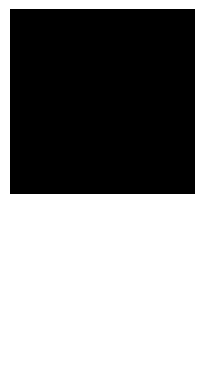

In [8]:
import matplotlib.pyplot as plt

# Assuming 'cropped_images_AR' contains the processed images
# Display the image corresponding to index 0
plt.imshow(cropped_images_AR_SEP[3], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


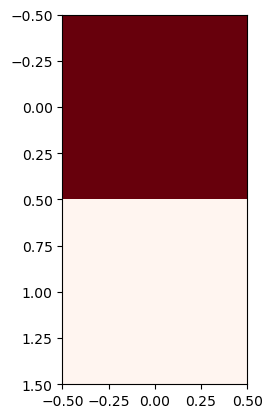

In [9]:
plt.imshow(cropped_images_AR_SEP[3], cmap='Reds_r')

In [10]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_SEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Threshold to obtain the brightest parts
            _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Create a blank mask image
            mask = np.zeros_like(cropped_image)

            # Draw contours on the mask
            cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

            # Apply the mask to the cropped image
            result = np.where(mask != 0, cropped_image, 0)

            # Store the processed image
            cropped_images_AR_SEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('data/SEP_date_100MeV_Dates_Flares_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['SEP100']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)



Cropped image for 1997-11-04 05:50:00 processed and stored as NumPy array with index 0.
Cropped image for 1997-11-06 11:45:00 processed and stored as NumPy array with index 1.
Cropped image for 1998-04-20 09:35:00 processed and stored as NumPy array with index 2.
Cropped image for 1998-05-06 07:55:00 processed and stored as NumPy array with index 3.
Cropped image for 1998-11-14 05:00:00 processed and stored as NumPy array with index 4.
Cropped image for 2000-06-10 16:40:00 processed and stored as NumPy array with index 5.
Cropped image for 2000-07-14 10:00:00 processed and stored as NumPy array with index 6.
Cropped image for 2000-07-22 11:15:00 processed and stored as NumPy array with index 7.
Cropped image for 2000-09-12 11:30:00 processed and stored as NumPy array with index 8.
Cropped image for 2000-10-16 06:40:00 processed and stored as NumPy array with index 9.
Cropped image for 2000-11-24 04:55:00 processed and stored as NumPy array with index 10.
Cropped image for 2000-11-24 14

In [11]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_SEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Threshold to obtain the brightest parts
            _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Create a blank mask image
            mask = np.zeros_like(cropped_image)

            # Draw contours on the mask
            cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

            # Apply the mask to the cropped image
            result = np.where(mask != 0, cropped_image, 0)

            # Store the processed image
            cropped_images_AR_SEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('data/SEP_date_100MeV_Dates_Flares_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['SEP100']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)



Cropped image for 1997-11-04 05:50:00 processed and stored as NumPy array with index 0.
Cropped image for 1997-11-06 11:45:00 processed and stored as NumPy array with index 1.
Cropped image for 1998-04-20 09:35:00 processed and stored as NumPy array with index 2.
Cropped image for 1998-05-06 07:55:00 processed and stored as NumPy array with index 3.
Cropped image for 1998-11-14 05:00:00 processed and stored as NumPy array with index 4.
Cropped image for 2000-06-10 16:40:00 processed and stored as NumPy array with index 5.
Cropped image for 2000-07-14 10:00:00 processed and stored as NumPy array with index 6.
Cropped image for 2000-07-22 11:15:00 processed and stored as NumPy array with index 7.
Cropped image for 2000-09-12 11:30:00 processed and stored as NumPy array with index 8.
Cropped image for 2000-10-16 06:40:00 processed and stored as NumPy array with index 9.
Cropped image for 2000-11-24 04:55:00 processed and stored as NumPy array with index 10.
Cropped image for 2000-11-24 14

In [12]:
cropped_images_AR_SEP[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

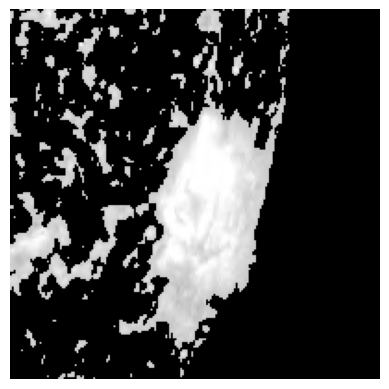

In [13]:
# Display the image corresponding to index 0
plt.imshow(cropped_images_AR_SEP[3], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

## SEP Mask

In [14]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_SEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,  #for SDO
                'event_coord2': coord2 / 2.63,  #arcsec/pixel
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Threshold to obtain the brightest parts
            _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)



            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Keep only the largest contour
            contour_areas = [cv2.contourArea(contour) for contour in contours]
            largest_contour_index = np.argmax(contour_areas)
            largest_contour = contours[largest_contour_index]

            # Create a blank mask image
            mask = np.zeros_like(cropped_image)

            # Draw largest contour on the mask
            cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

            # Apply the mask to the cropped image
            result = np.where(mask != 0, cropped_image, 0)

            # Store the processed image
            cropped_images_AR_SEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('data/SEP_date_100MeV_Dates_Flares_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['SEP100']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)



Cropped image for 1997-11-04 05:50:00 processed and stored as NumPy array with index 0.
Cropped image for 1997-11-06 11:45:00 processed and stored as NumPy array with index 1.
Cropped image for 1998-04-20 09:35:00 processed and stored as NumPy array with index 2.
Cropped image for 1998-05-06 07:55:00 processed and stored as NumPy array with index 3.
Cropped image for 1998-11-14 05:00:00 processed and stored as NumPy array with index 4.
Cropped image for 2000-06-10 16:40:00 processed and stored as NumPy array with index 5.
Cropped image for 2000-07-14 10:00:00 processed and stored as NumPy array with index 6.
Cropped image for 2000-07-22 11:15:00 processed and stored as NumPy array with index 7.
Cropped image for 2000-09-12 11:30:00 processed and stored as NumPy array with index 8.
Cropped image for 2000-10-16 06:40:00 processed and stored as NumPy array with index 9.
Cropped image for 2000-11-24 04:55:00 processed and stored as NumPy array with index 10.
Cropped image for 2000-11-24 14

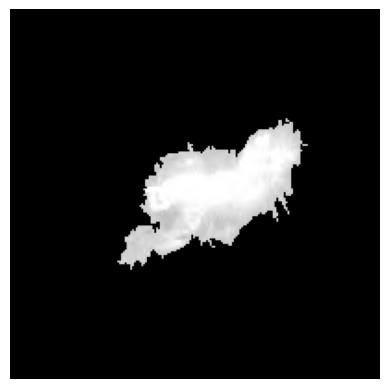

In [15]:
# Display the image corresponding to index 0
plt.imshow(cropped_images_AR_SEP[0], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


In [16]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_SEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }
            
            
            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Threshold to obtain the brightest parts
            _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Keep only the largest contour
            contour_areas = [cv2.contourArea(contour) for contour in contours]
            largest_contour_index = np.argmax(contour_areas)
            largest_contour = contours[largest_contour_index]

            # Create a blank mask image
            mask = np.zeros_like(cropped_image)

            # Draw largest contour on the mask
            cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

            # Apply the mask to the cropped image
            result = np.where(mask != 0, cropped_image, 0)

            # Store the processed image
            cropped_images_AR_SEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('data/SEP_date_100MeV_Dates_Flares_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['SEP100']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)

# Adjust the bright shapes to the center of each image
adjusted_images_AR_SEP = {}

for index, image in cropped_images_AR_SEP.items():
    # Calculate the center of mass (centroid) of the brightest region
    M = cv2.moments(image)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # Shift the image so that the centroid is at the center
    rows, cols = image.shape
    shiftX = cols // 2 - cX
    shiftY = rows // 2 - cY
    M = np.float32([[1, 0, shiftX], [0, 1, shiftY]])
    adjusted_image = cv2.warpAffine(image, M, (cols, rows))

    # Store the adjusted image
    adjusted_images_AR_SEP[index] = adjusted_image

    # # Optionally, visualize the adjusted image
    # plt.imshow(adjusted_image, cmap='gray')
    # plt.title(f"Adjusted Image {index}")
    # plt.axis('off')
    # plt.show()


Cropped image for 1997-11-04 05:50:00 processed and stored as NumPy array with index 0.
Cropped image for 1997-11-06 11:45:00 processed and stored as NumPy array with index 1.
Cropped image for 1998-04-20 09:35:00 processed and stored as NumPy array with index 2.
Cropped image for 1998-05-06 07:55:00 processed and stored as NumPy array with index 3.
Cropped image for 1998-11-14 05:00:00 processed and stored as NumPy array with index 4.
Cropped image for 2000-06-10 16:40:00 processed and stored as NumPy array with index 5.
Cropped image for 2000-07-14 10:00:00 processed and stored as NumPy array with index 6.
Cropped image for 2000-07-22 11:15:00 processed and stored as NumPy array with index 7.
Cropped image for 2000-09-12 11:30:00 processed and stored as NumPy array with index 8.
Cropped image for 2000-10-16 06:40:00 processed and stored as NumPy array with index 9.
Cropped image for 2000-11-24 04:55:00 processed and stored as NumPy array with index 10.
Cropped image for 2000-11-24 14

In [17]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_SEP = {}
index_counter = 0

USE_ADAPTIVE = False   # False to use old fixed threshold

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # numpy array

            # THRESHOLD STEP
            if USE_ADAPTIVE:
                thresh = cv2.adaptiveThreshold(
                    cropped_image.astype(np.uint8),
                    255,
                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                    cv2.THRESH_BINARY,
                    35,   # blockSize (odd number) – tune this
                    5     # C value – tune this
                )
            else:
                _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Keep only the largest contour
            if contours:
                contour_areas = [cv2.contourArea(contour) for contour in contours]
                largest_contour_index = np.argmax(contour_areas)
                largest_contour = contours[largest_contour_index]

                # Create a blank mask
                mask = np.zeros_like(cropped_image)

                # Draw largest contour on the mask
                cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

                # Apply the mask to the cropped image
                result = np.where(mask != 0, cropped_image, 0)
            else:
                result = cropped_image

            # Store the processed image
            cropped_images_AR_SEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('data/SEP_date_100MeV_Dates_Flares_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['SEP100']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)

    # # Optionally, visualize the adjusted image
    # plt.imshow(adjusted_image, cmap='gray')
    # plt.title(f"Adjusted Image {index}")
    # plt.axis('off')
    # plt.show()


Cropped image for 1997-11-04 05:50:00 processed and stored as NumPy array with index 0.
Cropped image for 1997-11-06 11:45:00 processed and stored as NumPy array with index 1.
Cropped image for 1998-04-20 09:35:00 processed and stored as NumPy array with index 2.
Cropped image for 1998-05-06 07:55:00 processed and stored as NumPy array with index 3.
Cropped image for 1998-11-14 05:00:00 processed and stored as NumPy array with index 4.
Cropped image for 2000-06-10 16:40:00 processed and stored as NumPy array with index 5.
Cropped image for 2000-07-14 10:00:00 processed and stored as NumPy array with index 6.
Cropped image for 2000-07-22 11:15:00 processed and stored as NumPy array with index 7.
Cropped image for 2000-09-12 11:30:00 processed and stored as NumPy array with index 8.
Cropped image for 2000-10-16 06:40:00 processed and stored as NumPy array with index 9.
Cropped image for 2000-11-24 04:55:00 processed and stored as NumPy array with index 10.
Cropped image for 2000-11-24 14

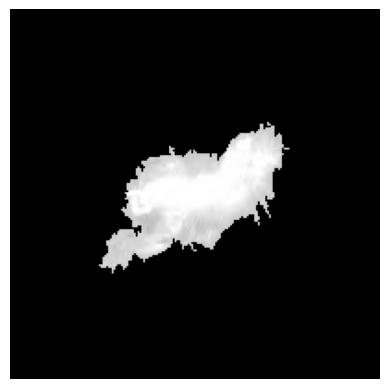

In [18]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_SEP[0], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


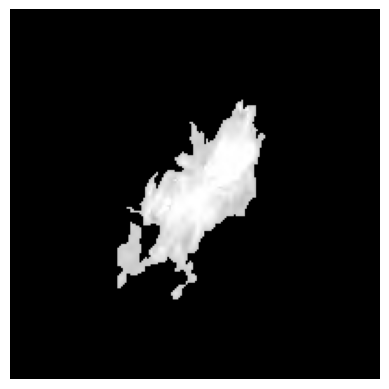

In [19]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_SEP[1], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


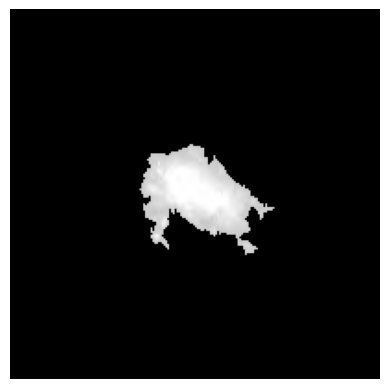

In [20]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_SEP[2], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


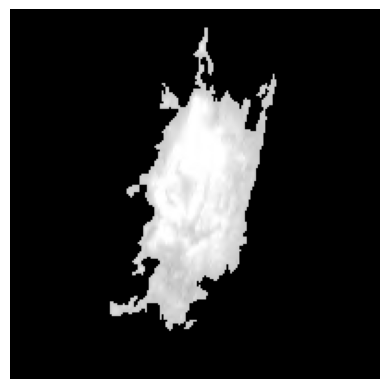

In [21]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_SEP[3], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


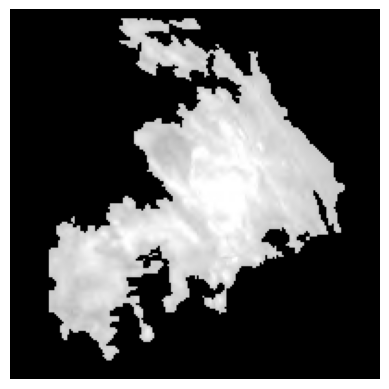

In [22]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_SEP[4], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


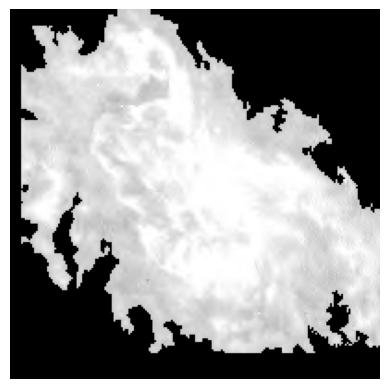

In [23]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_SEP[5], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


In [24]:
#SEP - Western face
#NSEP - Eastern

# NSEP

## NSEP Mask

In [25]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_NSEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Threshold to obtain the brightest parts
            _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Keep only the largest contour
            contour_areas = [cv2.contourArea(contour) for contour in contours]
            largest_contour_index = np.argmax(contour_areas)
            largest_contour = contours[largest_contour_index]

            # Create a blank mask image
            mask = np.zeros_like(cropped_image)

            # Draw largest contour on the mask
            cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

            # Apply the mask to the cropped image
            result = np.where(mask != 0, cropped_image, 0)

            # Store the processed image
            cropped_images_AR_NSEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('data/NSEP_date_P2_Dates_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['NSEP']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)



Cropped image for 1997-09-24 02:40:00 processed and stored as NumPy array with index 0.
Cropped image for 1997-11-03 10:15:00 processed and stored as NumPy array with index 1.
Cropped image for 1997-11-27 12:55:00 processed and stored as NumPy array with index 2.
Cropped image for 1997-11-29 22:25:00 processed and stored as NumPy array with index 3.
Cropped image for 1998-04-27 08:55:00 processed and stored as NumPy array with index 4.
Cropped image for 1998-05-10 13:10:00 processed and stored as NumPy array with index 5.
Cropped image for 1998-11-22 16:10:00 processed and stored as NumPy array with index 6.
Cropped image for 1998-11-23 10:55:00 processed and stored as NumPy array with index 7.
Cropped image for 1999-03-16 21:30:00 processed and stored as NumPy array with index 8.
Cropped image for 1999-04-04 05:15:00 processed and stored as NumPy array with index 9.
Cropped image for 1999-05-08 14:20:00 processed and stored as NumPy array with index 10.
Cropped image for 1999-06-17 16

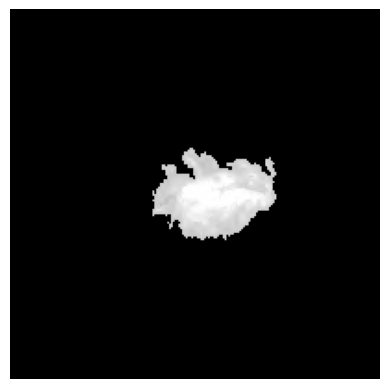

In [26]:
# Display the image corresponding to index 0
plt.imshow(cropped_images_AR_NSEP[0], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


In [27]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_NSEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Threshold to obtain the brightest parts
            _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Keep only the largest contour
            contour_areas = [cv2.contourArea(contour) for contour in contours]
            largest_contour_index = np.argmax(contour_areas)
            largest_contour = contours[largest_contour_index]

            # Create a blank mask image
            mask = np.zeros_like(cropped_image)

            # Draw largest contour on the mask
            cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

            # Apply the mask to the cropped image
            result = np.where(mask != 0, cropped_image, 0)

            # Store the processed image
            cropped_images_AR_NSEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('data/NSEP_date_P2_Dates_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['NSEP']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)

# Adjust the bright shapes to the center of each image
adjusted_images_AR_NSEP = {}

for index, image in cropped_images_AR_NSEP.items():
    # Calculate the center of mass (centroid) of the brightest region
    M = cv2.moments(image)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # Shift the image so that the centroid is at the center
    rows, cols = image.shape
    shiftX = cols // 2 - cX
    shiftY = rows // 2 - cY
    M = np.float32([[1, 0, shiftX], [0, 1, shiftY]])
    adjusted_image = cv2.warpAffine(image, M, (cols, rows))

    # Store the adjusted image
    adjusted_images_AR_NSEP[index] = adjusted_image

    # # Optionally, visualize the adjusted image
    # plt.imshow(adjusted_image, cmap='gray')
    # plt.title(f"Adjusted Image {index}")
    # plt.axis('off')
    # plt.show()


Cropped image for 1997-09-24 02:40:00 processed and stored as NumPy array with index 0.
Cropped image for 1997-11-03 10:15:00 processed and stored as NumPy array with index 1.
Cropped image for 1997-11-27 12:55:00 processed and stored as NumPy array with index 2.
Cropped image for 1997-11-29 22:25:00 processed and stored as NumPy array with index 3.
Cropped image for 1998-04-27 08:55:00 processed and stored as NumPy array with index 4.
Cropped image for 1998-05-10 13:10:00 processed and stored as NumPy array with index 5.
Cropped image for 1998-11-22 16:10:00 processed and stored as NumPy array with index 6.
Cropped image for 1998-11-23 10:55:00 processed and stored as NumPy array with index 7.
Cropped image for 1999-03-16 21:30:00 processed and stored as NumPy array with index 8.
Cropped image for 1999-04-04 05:15:00 processed and stored as NumPy array with index 9.
Cropped image for 1999-05-08 14:20:00 processed and stored as NumPy array with index 10.
Cropped image for 1999-06-17 16

In [28]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Store cropped images
cropped_images_AR_NSEP = {}
index_counter = 0

# ===== SWITCH: Use adaptive or global threshold =====
USE_ADAPTIVE = False   # <--- set False to use fixed threshold again

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)
    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # NumPy array

            # Threshold
            if USE_ADAPTIVE:
                thresh = cv2.adaptiveThreshold(
                    cropped_image.astype(np.uint8),
                    255,
                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                    cv2.THRESH_BINARY,
                    35,   # block size (odd number, tune this)
                    5     # constant C (tune this)
                )
            else:
                _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            if contours:
                # Keep only the largest contour
                contour_areas = [cv2.contourArea(contour) for contour in contours]
                largest_contour_index = np.argmax(contour_areas)
                largest_contour = contours[largest_contour_index]

                # Create a blank mask image
                mask = np.zeros_like(cropped_image)

                # Draw largest contour on the mask
                cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

                # Apply the mask to the cropped image
                result = np.where(mask != 0, cropped_image, 0)
            else:
                result = cropped_image  # fallback

            # Store the processed image
            cropped_images_AR_NSEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('data/NSEP_date_P2_Dates_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['NSEP']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)

# Adjust the bright shapes to the center of each image
adjusted_images_AR_NSEP = {}

for index, image in cropped_images_AR_NSEP.items():
    M = cv2.moments(image)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    rows, cols = image.shape
    shiftX = cols // 2 - cX
    shiftY = rows // 2 - cY
    M = np.float32([[1, 0, shiftX], [0, 1, shiftY]])
    adjusted_image = cv2.warpAffine(image, M, (cols, rows))

    adjusted_images_AR_NSEP[index] = adjusted_image

    # # Debug visualization
    # plt.imshow(adjusted_image, cmap='gray')
    # plt.title(f"Adjusted NSEP Image {index}")
    # plt.axis('off')
    # plt.show()

Cropped image for 1997-09-24 02:40:00 processed and stored as NumPy array with index 0.
Cropped image for 1997-11-03 10:15:00 processed and stored as NumPy array with index 1.
Cropped image for 1997-11-27 12:55:00 processed and stored as NumPy array with index 2.
Cropped image for 1997-11-29 22:25:00 processed and stored as NumPy array with index 3.
Cropped image for 1998-04-27 08:55:00 processed and stored as NumPy array with index 4.
Cropped image for 1998-05-10 13:10:00 processed and stored as NumPy array with index 5.
Cropped image for 1998-11-22 16:10:00 processed and stored as NumPy array with index 6.
Cropped image for 1998-11-23 10:55:00 processed and stored as NumPy array with index 7.
Cropped image for 1999-03-16 21:30:00 processed and stored as NumPy array with index 8.
Cropped image for 1999-04-04 05:15:00 processed and stored as NumPy array with index 9.
Cropped image for 1999-05-08 14:20:00 processed and stored as NumPy array with index 10.
Cropped image for 1999-06-17 16

ConnectTimeout: HTTPSConnectionPool(host='api.helioviewer.org', port=443): Max retries exceeded with url: /v2/getJP2Image/?date=2000-03-30T15:55:00Z&sourceId=3 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000002118BD7F0D0>, 'Connection to api.helioviewer.org timed out. (connect timeout=None)'))

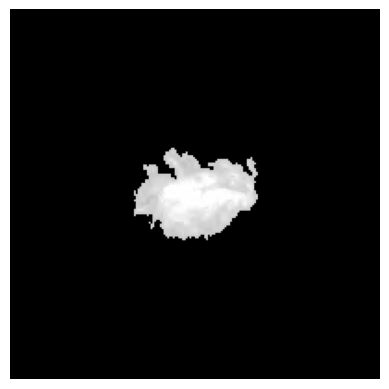

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_NSEP[0], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


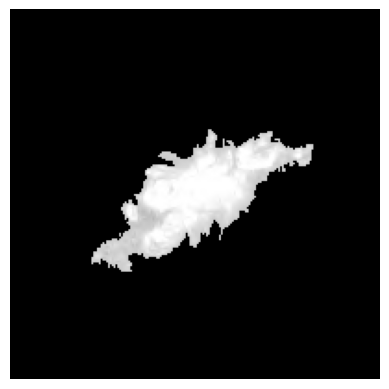

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_NSEP[1], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


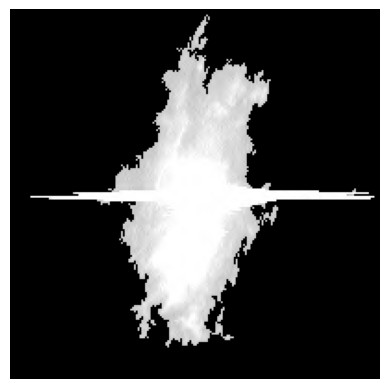

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_NSEP[2], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


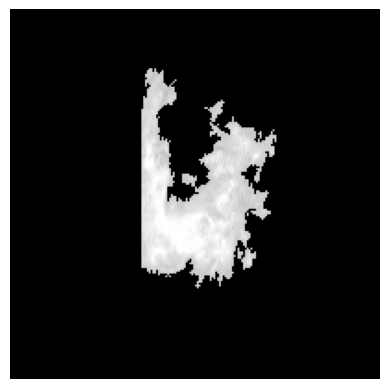

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_NSEP[3], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


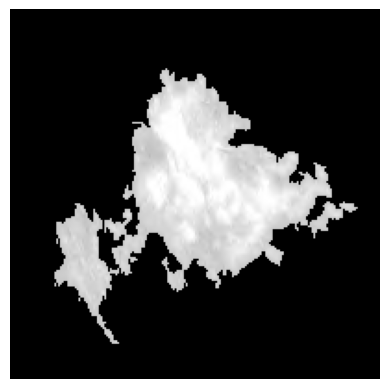

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_NSEP[4], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


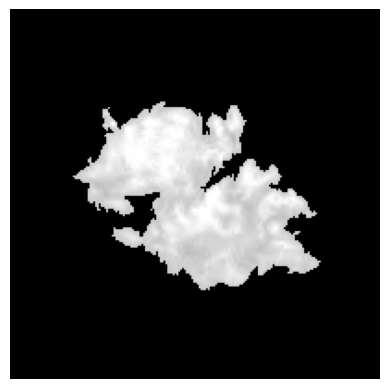

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_NSEP[5], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


# HOG Optimization

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import hog
from skimage.color import rgb2gray

# Define a function to extract HOG features from images
def extract_hog_features(image):
    # Convert image to grayscale if it's not already
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    # Extract HOG features
    # hog_features = hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4), multichannel=False)
    hog_features = hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))
    return hog_features

# Initialize empty lists for descriptors and labels
X = []
y = []

# Process images for NSEP
for cropped_image in adjusted_images_AR_NSEP.values():
    # Extract HOG features from each image
    hog_features = extract_hog_features(cropped_image)
    X.append(hog_features)
    y.append(0)  # NSEP label

# Process images for SEP
for cropped_image in adjusted_images_AR_SEP.values():
    # Extract HOG features from each image
    hog_features = extract_hog_features(cropped_image)
    X.append(hog_features)
    y.append(1)  # SEP label

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Initialize Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=80, random_state=42)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize empty list to store accuracy scores
accuracy_scores_RF_HOG = []

# Perform 5-fold stratified cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the classifier to the training data
    random_forest.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = random_forest.predict(X_test)

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_RF_HOG.append(accuracy)

# Calculate mean accuracy
mean_accuracy = np.mean(accuracy_scores_RF_HOG)
print(f"Mean accuracy of Random Forest classifier with HOG features using 5-fold stratified cross-validation: {mean_accuracy * 100:.2f}%")

# 58.89% for fixed threshold

In [37]:
hog_param_grid = {
    "pixels_per_cell": [(8, 8), (10, 10), (12, 12), (16, 16)],
    "cells_per_block": [(2, 2), (3, 3)],
    "orientations": [6, 9, 12],
    "block_norm": ["L2-Hys", "L2"],
    "transform_sqrt": [True, False],
}

In [38]:
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image, hog_params):
    if len(image.shape) == 3:
        image = rgb2gray(image)

    features = hog(
        image,
        pixels_per_cell=hog_params["pixels_per_cell"],
        cells_per_block=hog_params["cells_per_block"],
        orientations=hog_params["orientations"],
        block_norm=hog_params["block_norm"],
        transform_sqrt=hog_params["transform_sqrt"],
        feature_vector=True,
    )
    return features


In [43]:
import numpy as np
from itertools import product
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image, hog_params):
    if len(image.shape) == 3:
        image = rgb2gray(image)

    features = hog(
        image,
        pixels_per_cell=hog_params["pixels_per_cell"],
        cells_per_block=hog_params["cells_per_block"],
        orientations=hog_params["orientations"],
        block_norm=hog_params["block_norm"],
        transform_sqrt=hog_params["transform_sqrt"],
        feature_vector=True
    )
    return features

hog_param_grid = {
    "pixels_per_cell": [(8, 8), (10, 10), (12, 12), (16, 16)],
    "cells_per_block": [(2, 2), (3, 3)],
    "orientations": [6, 9, 12],
    "block_norm": ["L2-Hys", "L2"],
    "transform_sqrt": [True, False]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for ppc, cpb, ori, bn, ts in product(
    hog_param_grid["pixels_per_cell"],
    hog_param_grid["cells_per_block"],
    hog_param_grid["orientations"],
    hog_param_grid["block_norm"],
    hog_param_grid["transform_sqrt"]
):

    hog_params = {
        "pixels_per_cell": ppc,
        "cells_per_block": cpb,
        "orientations": ori,
        "block_norm": bn,
        "transform_sqrt": ts
    }

    X, y = [], []

    for img in adjusted_images_AR_NSEP.values():
        X.append(extract_hog_features(img, hog_params))
        y.append(0)

    for img in adjusted_images_AR_SEP.values():
        X.append(extract_hog_features(img, hog_params))
        y.append(1)

    X = np.array(X)
    y = np.array(y)

    accuracy_scores = []
    tss_scores = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        random_forest = RandomForestClassifier(
            n_estimators=80,
            random_state=42,
            class_weight="balanced"
        )

        random_forest.fit(X_train, y_train)
        y_pred = random_forest.predict(X_test)

        # Accuracy
        accuracy_scores.append(accuracy_score(y_test, y_pred))

        # TSS
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        tss_scores.append(tss)

    results.append({
        "hog_params": hog_params,
        "mean_accuracy": np.mean(accuracy_scores),
        "mean_tss": np.mean(tss_scores)
    })

    print(
        f"HOG {hog_params} | "
        f"Acc: {np.mean(accuracy_scores):.3f} | "
        f"TSS: {np.mean(tss_scores):.3f}"
    )

best_by_accuracy = max(results, key=lambda x: x["mean_accuracy"])
best_by_tss = max(results, key=lambda x: x["mean_tss"])

print("\nBest HOG parameters by Accuracy:")
print(best_by_accuracy)

print("\nBest HOG parameters by TSS:")
print(best_by_tss)

HOG {'pixels_per_cell': (8, 8), 'cells_per_block': (2, 2), 'orientations': 6, 'block_norm': 'L2-Hys', 'transform_sqrt': True} | Acc: 0.636 | TSS: 0.264
HOG {'pixels_per_cell': (8, 8), 'cells_per_block': (2, 2), 'orientations': 6, 'block_norm': 'L2-Hys', 'transform_sqrt': False} | Acc: 0.650 | TSS: 0.296
HOG {'pixels_per_cell': (8, 8), 'cells_per_block': (2, 2), 'orientations': 6, 'block_norm': 'L2', 'transform_sqrt': True} | Acc: 0.595 | TSS: 0.186
HOG {'pixels_per_cell': (8, 8), 'cells_per_block': (2, 2), 'orientations': 6, 'block_norm': 'L2', 'transform_sqrt': False} | Acc: 0.663 | TSS: 0.318
HOG {'pixels_per_cell': (8, 8), 'cells_per_block': (2, 2), 'orientations': 9, 'block_norm': 'L2-Hys', 'transform_sqrt': True} | Acc: 0.689 | TSS: 0.371
HOG {'pixels_per_cell': (8, 8), 'cells_per_block': (2, 2), 'orientations': 9, 'block_norm': 'L2-Hys', 'transform_sqrt': False} | Acc: 0.650 | TSS: 0.289
HOG {'pixels_per_cell': (8, 8), 'cells_per_block': (2, 2), 'orientations': 9, 'block_norm': '

In [45]:
import numpy as np
from itertools import product
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image, hog_params):
    if len(image.shape) == 3:
        image = rgb2gray(image)

    features = hog(
        image,
        pixels_per_cell=hog_params["pixels_per_cell"],
        cells_per_block=hog_params["cells_per_block"],
        orientations=hog_params["orientations"],
        block_norm=hog_params["block_norm"],
        transform_sqrt=hog_params["transform_sqrt"],
        feature_vector=True
    )
    return features

hog_param_grid = {
    "pixels_per_cell": [(4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (12, 12), (14, 14)],
    "cells_per_block": [(2, 2), (3, 3), (4, 4), (5, 5), (6, 6)],
    "orientations": [6, 7, 8, 9, 10, 11, 12],
    "block_norm": ["L2-Hys", "L2"],
    "transform_sqrt": [True, False]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for ppc, cpb, ori, bn, ts in product(
    hog_param_grid["pixels_per_cell"],
    hog_param_grid["cells_per_block"],
    hog_param_grid["orientations"],
    hog_param_grid["block_norm"],
    hog_param_grid["transform_sqrt"]
):

    hog_params = {
        "pixels_per_cell": ppc,
        "cells_per_block": cpb,
        "orientations": ori,
        "block_norm": bn,
        "transform_sqrt": ts
    }

    X, y = [], []

    for img in adjusted_images_AR_NSEP.values():
        X.append(extract_hog_features(img, hog_params))
        y.append(0)

    for img in adjusted_images_AR_SEP.values():
        X.append(extract_hog_features(img, hog_params))
        y.append(1)

    X = np.array(X)
    y = np.array(y)

    accuracy_scores = []
    tss_scores = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        random_forest = RandomForestClassifier(
            n_estimators=80,
            random_state=42,
            class_weight="balanced"
        )

        random_forest.fit(X_train, y_train)
        y_pred = random_forest.predict(X_test)

        # Accuracy
        accuracy_scores.append(accuracy_score(y_test, y_pred))

        # TSS
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        tss_scores.append(tss)

    results.append({
        "hog_params": hog_params,
        "mean_accuracy": np.mean(accuracy_scores),
        "mean_tss": np.mean(tss_scores)
    })

    print(
        f"HOG {hog_params} | "
        f"Acc: {np.mean(accuracy_scores):.3f} | "
        f"TSS: {np.mean(tss_scores):.3f}"
    )

best_by_accuracy = max(results, key=lambda x: x["mean_accuracy"])
best_by_tss = max(results, key=lambda x: x["mean_tss"])

print("\nBest HOG parameters by Accuracy:")
print(best_by_accuracy)

print("\nBest HOG parameters by TSS:")
print(best_by_tss)

HOG {'pixels_per_cell': (4, 4), 'cells_per_block': (2, 2), 'orientations': 6, 'block_norm': 'L2-Hys', 'transform_sqrt': True} | Acc: 0.596 | TSS: 0.186
HOG {'pixels_per_cell': (4, 4), 'cells_per_block': (2, 2), 'orientations': 6, 'block_norm': 'L2-Hys', 'transform_sqrt': False} | Acc: 0.608 | TSS: 0.214
HOG {'pixels_per_cell': (4, 4), 'cells_per_block': (2, 2), 'orientations': 6, 'block_norm': 'L2', 'transform_sqrt': True} | Acc: 0.584 | TSS: 0.154
HOG {'pixels_per_cell': (4, 4), 'cells_per_block': (2, 2), 'orientations': 6, 'block_norm': 'L2', 'transform_sqrt': False} | Acc: 0.637 | TSS: 0.268
HOG {'pixels_per_cell': (4, 4), 'cells_per_block': (2, 2), 'orientations': 7, 'block_norm': 'L2-Hys', 'transform_sqrt': True} | Acc: 0.716 | TSS: 0.425
HOG {'pixels_per_cell': (4, 4), 'cells_per_block': (2, 2), 'orientations': 7, 'block_norm': 'L2-Hys', 'transform_sqrt': False} | Acc: 0.690 | TSS: 0.375
HOG {'pixels_per_cell': (4, 4), 'cells_per_block': (2, 2), 'orientations': 7, 'block_norm': '

In [32]:
import numpy as np
from itertools import product
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image, hog_params):
    if len(image.shape) == 3:
        image = rgb2gray(image)

    features = hog(
        image,
        pixels_per_cell=hog_params["pixels_per_cell"],
        cells_per_block=hog_params["cells_per_block"],
        orientations=hog_params["orientations"],
        block_norm=hog_params["block_norm"],
        transform_sqrt=hog_params["transform_sqrt"],
        feature_vector=True
    )
    return features

hog_param_grid = {
    "pixels_per_cell": [(4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (12, 12), (14, 14), (15, 15), (16, 16)],
    "cells_per_block": [(3, 3)],
    "orientations": [8],
    "block_norm": ["L2-Hys", "L2"],
    "transform_sqrt": [True, False]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for ppc, cpb, ori, bn, ts in product(
    hog_param_grid["pixels_per_cell"],
    hog_param_grid["cells_per_block"],
    hog_param_grid["orientations"],
    hog_param_grid["block_norm"],
    hog_param_grid["transform_sqrt"]
):

    hog_params = {
        "pixels_per_cell": ppc,
        "cells_per_block": cpb,
        "orientations": ori,
        "block_norm": bn,
        "transform_sqrt": ts
    }

    X, y = [], []

    for img in adjusted_images_AR_NSEP.values():
        X.append(extract_hog_features(img, hog_params))
        y.append(0)

    for img in adjusted_images_AR_SEP.values():
        X.append(extract_hog_features(img, hog_params))
        y.append(1)

    X = np.array(X)
    y = np.array(y)

    accuracy_scores = []
    tss_scores = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        random_forest = RandomForestClassifier(
            n_estimators=80,
            random_state=42,
            class_weight="balanced"
        )

        random_forest.fit(X_train, y_train)
        y_pred = random_forest.predict(X_test)

        # Accuracy
        accuracy_scores.append(accuracy_score(y_test, y_pred))

        # TSS
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        tss_scores.append(tss)

    results.append({
        "hog_params": hog_params,
        "mean_accuracy": np.mean(accuracy_scores),
        "mean_tss": np.mean(tss_scores)
    })

    print(
        f"HOG {hog_params} | "
        f"Acc: {np.mean(accuracy_scores):.3f} | "
        f"TSS: {np.mean(tss_scores):.3f}"
    )

best_by_accuracy = max(results, key=lambda x: x["mean_accuracy"])
best_by_tss = max(results, key=lambda x: x["mean_tss"])

print("\nBest HOG parameters by Accuracy:")
print(best_by_accuracy)

print("\nBest HOG parameters by TSS:")
print(best_by_tss)

HOG {'pixels_per_cell': (4, 4), 'cells_per_block': (3, 3), 'orientations': 8, 'block_norm': 'L2-Hys', 'transform_sqrt': True} | Acc: 0.623 | TSS: 0.232
HOG {'pixels_per_cell': (4, 4), 'cells_per_block': (3, 3), 'orientations': 8, 'block_norm': 'L2-Hys', 'transform_sqrt': False} | Acc: 0.624 | TSS: 0.239
HOG {'pixels_per_cell': (4, 4), 'cells_per_block': (3, 3), 'orientations': 8, 'block_norm': 'L2', 'transform_sqrt': True} | Acc: 0.542 | TSS: 0.079
HOG {'pixels_per_cell': (4, 4), 'cells_per_block': (3, 3), 'orientations': 8, 'block_norm': 'L2', 'transform_sqrt': False} | Acc: 0.676 | TSS: 0.343
HOG {'pixels_per_cell': (5, 5), 'cells_per_block': (3, 3), 'orientations': 8, 'block_norm': 'L2-Hys', 'transform_sqrt': True} | Acc: 0.648 | TSS: 0.286
HOG {'pixels_per_cell': (5, 5), 'cells_per_block': (3, 3), 'orientations': 8, 'block_norm': 'L2-Hys', 'transform_sqrt': False} | Acc: 0.623 | TSS: 0.239
HOG {'pixels_per_cell': (5, 5), 'cells_per_block': (3, 3), 'orientations': 8, 'block_norm': '

In [30]:
import numpy as np
from itertools import product
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image, hog_params):
    if len(image.shape) == 3:
        image = rgb2gray(image)

    features = hog(
        image,
        pixels_per_cell=hog_params["pixels_per_cell"],
        cells_per_block=hog_params["cells_per_block"],
        orientations=hog_params["orientations"],
        block_norm=hog_params["block_norm"],
        transform_sqrt=hog_params["transform_sqrt"],
        feature_vector=True
    )
    return features

hog_param_grid = {
    "pixels_per_cell": [(14, 14)],
    "cells_per_block": [(2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)],
    "orientations": [8],
    "block_norm": ["L2-Hys", "L2"],
    "transform_sqrt": [True, False]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for ppc, cpb, ori, bn, ts in product(
    hog_param_grid["pixels_per_cell"],
    hog_param_grid["cells_per_block"],
    hog_param_grid["orientations"],
    hog_param_grid["block_norm"],
    hog_param_grid["transform_sqrt"]
):

    hog_params = {
        "pixels_per_cell": ppc,
        "cells_per_block": cpb,
        "orientations": ori,
        "block_norm": bn,
        "transform_sqrt": ts
    }

    X, y = [], []

    for img in adjusted_images_AR_NSEP.values():
        X.append(extract_hog_features(img, hog_params))
        y.append(0)

    for img in adjusted_images_AR_SEP.values():
        X.append(extract_hog_features(img, hog_params))
        y.append(1)

    X = np.array(X)
    y = np.array(y)

    accuracy_scores = []
    tss_scores = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        random_forest = RandomForestClassifier(
            n_estimators=80,
            random_state=42,
            class_weight="balanced"
        )

        random_forest.fit(X_train, y_train)
        y_pred = random_forest.predict(X_test)

        # Accuracy
        accuracy_scores.append(accuracy_score(y_test, y_pred))

        # TSS
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        tss_scores.append(tss)

    results.append({
        "hog_params": hog_params,
        "mean_accuracy": np.mean(accuracy_scores),
        "mean_tss": np.mean(tss_scores)
    })

    print(
        f"HOG {hog_params} | "
        f"Acc: {np.mean(accuracy_scores):.3f} | "
        f"TSS: {np.mean(tss_scores):.3f}"
    )

best_by_accuracy = max(results, key=lambda x: x["mean_accuracy"])
best_by_tss = max(results, key=lambda x: x["mean_tss"])

print("\nBest HOG parameters by Accuracy:")
print(best_by_accuracy)

print("\nBest HOG parameters by TSS:")
print(best_by_tss)

HOG {'pixels_per_cell': (14, 14), 'cells_per_block': (2, 2), 'orientations': 8, 'block_norm': 'L2-Hys', 'transform_sqrt': True} | Acc: 0.716 | TSS: 0.432
HOG {'pixels_per_cell': (14, 14), 'cells_per_block': (2, 2), 'orientations': 8, 'block_norm': 'L2-Hys', 'transform_sqrt': False} | Acc: 0.730 | TSS: 0.461
HOG {'pixels_per_cell': (14, 14), 'cells_per_block': (2, 2), 'orientations': 8, 'block_norm': 'L2', 'transform_sqrt': True} | Acc: 0.744 | TSS: 0.482
HOG {'pixels_per_cell': (14, 14), 'cells_per_block': (2, 2), 'orientations': 8, 'block_norm': 'L2', 'transform_sqrt': False} | Acc: 0.758 | TSS: 0.518
HOG {'pixels_per_cell': (14, 14), 'cells_per_block': (3, 3), 'orientations': 8, 'block_norm': 'L2-Hys', 'transform_sqrt': True} | Acc: 0.690 | TSS: 0.382
HOG {'pixels_per_cell': (14, 14), 'cells_per_block': (3, 3), 'orientations': 8, 'block_norm': 'L2-Hys', 'transform_sqrt': False} | Acc: 0.771 | TSS: 0.550
HOG {'pixels_per_cell': (14, 14), 'cells_per_block': (3, 3), 'orientations': 8, '

In [31]:
import numpy as np
from itertools import product
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image, hog_params):
    if len(image.shape) == 3:
        image = rgb2gray(image)

    features = hog(
        image,
        pixels_per_cell=hog_params["pixels_per_cell"],
        cells_per_block=hog_params["cells_per_block"],
        orientations=hog_params["orientations"],
        block_norm=hog_params["block_norm"],
        transform_sqrt=hog_params["transform_sqrt"],
        feature_vector=True
    )
    return features

hog_param_grid = {
    "pixels_per_cell": [(14, 14)],
    "cells_per_block": [(3, 3)],
    "orientations": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    "block_norm": ["L2-Hys", "L2"],
    "transform_sqrt": [True, False]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for ppc, cpb, ori, bn, ts in product(
    hog_param_grid["pixels_per_cell"],
    hog_param_grid["cells_per_block"],
    hog_param_grid["orientations"],
    hog_param_grid["block_norm"],
    hog_param_grid["transform_sqrt"]
):

    hog_params = {
        "pixels_per_cell": ppc,
        "cells_per_block": cpb,
        "orientations": ori,
        "block_norm": bn,
        "transform_sqrt": ts
    }

    X, y = [], []

    for img in adjusted_images_AR_NSEP.values():
        X.append(extract_hog_features(img, hog_params))
        y.append(0)

    for img in adjusted_images_AR_SEP.values():
        X.append(extract_hog_features(img, hog_params))
        y.append(1)

    X = np.array(X)
    y = np.array(y)

    accuracy_scores = []
    tss_scores = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        random_forest = RandomForestClassifier(
            n_estimators=80,
            random_state=42,
            class_weight="balanced"
        )

        random_forest.fit(X_train, y_train)
        y_pred = random_forest.predict(X_test)

        # Accuracy
        accuracy_scores.append(accuracy_score(y_test, y_pred))

        # TSS
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        tss_scores.append(tss)

    results.append({
        "hog_params": hog_params,
        "mean_accuracy": np.mean(accuracy_scores),
        "mean_tss": np.mean(tss_scores)
    })

    print(
        f"HOG {hog_params} | "
        f"Acc: {np.mean(accuracy_scores):.3f} | "
        f"TSS: {np.mean(tss_scores):.3f}"
    )

best_by_accuracy = max(results, key=lambda x: x["mean_accuracy"])
best_by_tss = max(results, key=lambda x: x["mean_tss"])

print("\nBest HOG parameters by Accuracy:")
print(best_by_accuracy)

print("\nBest HOG parameters by TSS:")
print(best_by_tss)

HOG {'pixels_per_cell': (14, 14), 'cells_per_block': (3, 3), 'orientations': 2, 'block_norm': 'L2-Hys', 'transform_sqrt': True} | Acc: 0.595 | TSS: 0.182
HOG {'pixels_per_cell': (14, 14), 'cells_per_block': (3, 3), 'orientations': 2, 'block_norm': 'L2-Hys', 'transform_sqrt': False} | Acc: 0.610 | TSS: 0.214
HOG {'pixels_per_cell': (14, 14), 'cells_per_block': (3, 3), 'orientations': 2, 'block_norm': 'L2', 'transform_sqrt': True} | Acc: 0.621 | TSS: 0.239
HOG {'pixels_per_cell': (14, 14), 'cells_per_block': (3, 3), 'orientations': 2, 'block_norm': 'L2', 'transform_sqrt': False} | Acc: 0.582 | TSS: 0.157
HOG {'pixels_per_cell': (14, 14), 'cells_per_block': (3, 3), 'orientations': 3, 'block_norm': 'L2-Hys', 'transform_sqrt': True} | Acc: 0.636 | TSS: 0.275
HOG {'pixels_per_cell': (14, 14), 'cells_per_block': (3, 3), 'orientations': 3, 'block_norm': 'L2-Hys', 'transform_sqrt': False} | Acc: 0.730 | TSS: 0.461
HOG {'pixels_per_cell': (14, 14), 'cells_per_block': (3, 3), 'orientations': 3, '

# Models

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import hog
from skimage.color import rgb2gray

# Define a function to extract HOG features from images
def extract_hog_features(image):
    # Convert image to grayscale if it's not already
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    # Extract HOG features
    # hog_features = hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4), multichannel=False)
    hog_features = hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))
    return hog_features

# Initialize empty lists for descriptors and labels
X = []
y = []

# Process images for NSEP
for cropped_image in adjusted_images_AR_NSEP.values():
    # Extract HOG features from each image
    hog_features = extract_hog_features(cropped_image)
    X.append(hog_features)
    y.append(0)  # NSEP label

# Process images for SEP
for cropped_image in adjusted_images_AR_SEP.values():
    # Extract HOG features from each image
    hog_features = extract_hog_features(cropped_image)
    X.append(hog_features)
    y.append(1)  # SEP label

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Initialize Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=80, random_state=42)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize empty list to store accuracy scores
accuracy_scores_RF_HOG = []

# Perform 5-fold stratified cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the classifier to the training data
    random_forest.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = random_forest.predict(X_test)

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_RF_HOG.append(accuracy)

# Calculate mean accuracy
mean_accuracy = np.mean(accuracy_scores_RF_HOG)
print(f"Mean accuracy of Random Forest classifier with HOG features using 5-fold stratified cross-validation: {mean_accuracy * 100:.2f}%")

# 58.89% for fixed threshold

Mean accuracy of Random Forest classifier with HOG features using 5-fold stratified cross-validation: 58.89%


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import hog
from skimage.color import rgb2gray

# Define a function to extract HOG features from images
def extract_hog_features(image):
    # Convert image to grayscale if it's not already
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    # Extract HOG features
    hog_features = hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))
    return hog_features

# Initialize empty lists for descriptors and labels
X = []
y = []

# Process images for NSEP
for cropped_image in adjusted_images_AR_NSEP.values():
    # Extract HOG features from each image
    hog_features = extract_hog_features(cropped_image)
    X.append(hog_features)
    y.append(0)  # NSEP label

# Process images for SEP
for cropped_image in adjusted_images_AR_SEP.values():
    # Extract HOG features from each image
    hog_features = extract_hog_features(cropped_image)
    X.append(hog_features)
    y.append(1)  # SEP label

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Initialize Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=80, random_state=42)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize empty lists to store metrics
accuracy_scores_RF_HOG = []
f1_scores_RF_HOG = []
precision_scores_RF_HOG = []
recall_scores_RF_HOG = []
tss_scores_RF_HOG = []
hss_scores_RF_HOG = []

# Perform 5-fold stratified cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the classifier to the training data
    random_forest.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = random_forest.predict(X_test)

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_RF_HOG.append(accuracy)

    # Calculate F1 score and append to the list
    f1 = f1_score(y_test, y_pred, average="weighted")
    f1_scores_RF_HOG.append(f1)

    # Calculate precision and recall and append to the lists
    precision = precision_score(y_test, y_pred, average='macro')
    precision_scores_RF_HOG.append(precision)
    recall = recall_score(y_test, y_pred, average='macro')
    recall_scores_RF_HOG.append(recall)

    # Confusion matrix for TSS and HSS
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # TSS calculation
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    tss_scores_RF_HOG.append(tss)

    # HSS calculation
    hss = (2 * ((tp * tn) - (fn * fp))) / (((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp)))
    hss_scores_RF_HOG.append(hss)

# Calculate mean accuracy, F1 score, TSS, and HSS
mean_accuracy = np.mean(accuracy_scores_RF_HOG)
mean_f1 = np.mean(f1_scores_RF_HOG)
mean_tss = np.mean(tss_scores_RF_HOG)
mean_hss = np.mean(hss_scores_RF_HOG)

# Output the metrics
print(f"Mean accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean F1 score: {mean_f1:.2f}")
print(f"Mean TSS: {mean_tss:.2f}")
print(f"Mean HSS: {mean_hss:.2f}")
print(f"All Accuracy: {accuracy_scores_RF_HOG}")

# Fixed Threshold
# Mean accuracy: 58.89%
# Mean F1 score: 0.58
# Mean TSS: 0.13
# Mean HSS: 0.14

Mean accuracy: 58.89%
Mean F1 score: 0.58
Mean TSS: 0.13
Mean HSS: 0.14
All Accuracy: [0.7, 0.4, 0.8, 0.6, 0.4444444444444444]


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image):
    if len(image.shape) == 3:  # Convert to grayscale
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))

X = []
y = []

for cropped_image in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(cropped_image))
    y.append(0)

for cropped_image in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(cropped_image))
    y.append(1)

y = np.array(y)

try:
    X = np.vstack(X)
except ValueError:
    X = np.array([x.flatten() for x in X], dtype=object)

svm = SVC()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores_SVM_HOG = []
f1_scores_SVM_HOG = []
precision_scores_SVM_HOG = []
recall_scores_SVM_HOG = []
tss_scores_SVM_HOG = []
hss_scores_SVM_HOG = []

for train_index, test_index in skf.split(range(len(X)), y):
    X_train = [X[i] for i in train_index]
    X_test = [X[i] for i in test_index]
    y_train, y_test = y[train_index], y[test_index]

    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    prec = precision_score(y_test, y_pred, average="macro")
    rec = recall_score(y_test, y_pred, average="macro")

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = (2 * ((tp * tn) - (fn * fp))) / (((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp)))

    accuracy_scores_SVM_HOG.append(acc)
    f1_scores_SVM_HOG.append(f1)
    precision_scores_SVM_HOG.append(prec)
    recall_scores_SVM_HOG.append(rec)
    tss_scores_SVM_HOG.append(tss)
    hss_scores_SVM_HOG.append(hss)

mean_accuracy = np.mean(accuracy_scores_SVM_HOG)
mean_f1 = np.mean(f1_scores_SVM_HOG)
mean_tss = np.mean(tss_scores_SVM_HOG)
mean_hss = np.mean(hss_scores_SVM_HOG)

print("SVM + HOG Results")
print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean F1 Score: {mean_f1:.2f}")
print(f"Mean TSS: {mean_tss:.2f}")
print(f"Mean HSS: {mean_hss:.2f}")
print(f"All Accuracy: {accuracy_scores_SVM_HOG}")


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM + HOG Results
Mean Accuracy: 57.11%
Mean F1 Score: 0.42
Mean TSS: 0.00
Mean HSS: 0.00
All Accuracy: [0.5, 0.6, 0.6, 0.6, 0.5555555555555556]


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
!pip install catboost

   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   - -------------------------------------- 2.9/102.5 MB 15.2 MB/s eta 0:00:07
   --- ------------------------------------ 7.9/102.5 MB 20.3 MB/s eta 0:00:05
   ---- ----------------------------------- 11.8/102.5 MB 19.4 MB/s eta 0:00:05
   ------ --------------------------------- 16.8/102.5 MB 20.3 MB/s eta 0:00:05
   -------- ------------------------------- 21.8/102.5 MB 21.2 MB/s eta 0:00:04
   ---------- ----------------------------- 27.0/102.5 MB 21.9 MB/s eta 0:00:04
   ------------ --------------------------- 32.2/102.5 MB 22.3 MB/s eta 0:00:04
   -------------- ------------------------- 37.5/102.5 MB 22.7 MB/s eta 0:00:03
   ---------------- ----------------------- 41.7/102.5 MB 22.3 MB/s eta 0:00:03
   ----------------- ---------------------- 45.6/102.5 MB 22.0 MB/s eta 0:00:03
   ------------------- -------------------- 49.8/102.5 MB 21.7 MB/s eta 0:00:03
   --------------------- ------------------ 54.3/10

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from skimage.feature import hog
from skimage.color import rgb2gray
from xgboost import XGBClassifier

# === HOG Feature Extraction ===
def extract_hog_features(image):
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))

# Build X and y
X, y = [], []

for img in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(img))
    y.append(0)
for img in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(img))
    y.append(1)

X, y = np.array(X), np.array(y)

# === Model ===
clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# === Cross-validation ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accs, f1s, tsss, hsss = [], [], [], []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred, average="weighted"))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = (2 * ((tp * tn) - (fn * fp))) / (((tp + fn)*(fn + tn)) + ((fp + tn)*(tp + fp)))
    tsss.append(tss)
    hsss.append(hss)

print("XGBoost + HOG Results")
print("Mean Accuracy:", (np.mean(accs) * 100))
print("Mean F1 Score:", np.mean(f1s))
print("Mean TSS:", np.mean(tsss))
print("Mean HSS:", np.mean(hsss))
print("All Accuracy:", (accs))

c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [11:59:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [11:59:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [11:59:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [11:59:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

XGBoost + HOG Results
Mean Accuracy: 47.333333333333336
Mean F1 Score: 0.47003663003663004
Mean TSS: -0.056666666666666685
Mean HSS: -0.04756015988253527
All Accuracy: [0.6, 0.4, 0.2, 0.5, 0.6666666666666666]


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.neural_network import MLPClassifier

def extract_hog_features(image):
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))

X, y = [], []
for img in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(img))
    y.append(0)
for img in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(img))
    y.append(1)

X, y = np.array(X), np.array(y)

clf = MLPClassifier(random_state=42, max_iter=500)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accs, f1s, tsss, hsss = [], [], [], []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred, average="weighted"))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = (2 * ((tp * tn) - (fn * fp))) / (((tp + fn)*(fn + tn)) + ((fp + tn)*(tp + fp)))
    tsss.append(tss)
    hsss.append(hss)

print("MLP + HOG Results")
print("Mean Accuracy:", np.mean(accs))
print("Mean F1 Score:", np.mean(f1s))
print("Mean TSS:", np.mean(tsss))
print("Mean HSS:", np.mean(hsss))
print("All Accuracy:", (accs))

MLP + HOG Results
Mean Accuracy: 0.5511111111111111
Mean F1 Score: 0.5083923483923484
Mean TSS: 0.09333333333333335
Mean HSS: 0.09547614856539341
All Accuracy: [0.5, 0.4, 0.7, 0.6, 0.5555555555555556]


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from skimage.feature import hog
from skimage.color import rgb2gray
from catboost import CatBoostClassifier

def extract_hog_features(image):
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))

X, y = [], []
for img in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(img))
    y.append(0)
for img in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(img))
    y.append(1)

X, y = np.array(X), np.array(y)

clf = CatBoostClassifier(verbose=0, random_seed=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accs, f1s, tsss, hsss = [], [], [], []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred, average="weighted"))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = (2 * ((tp * tn) - (fn * fp))) / (((tp + fn)*(fn + tn)) + ((fp + tn)*(tp + fp)))
    tsss.append(tss)
    hsss.append(hss)

print("CatBoost + HOG Results")
print("Mean Accuracy:", np.mean(accs))
print("Mean F1 Score:", np.mean(f1s))
print("Mean TSS:", np.mean(tsss))
print("Mean HSS:", np.mean(hsss))


=== CatBoost + HOG Results ===
Mean Accuracy: 0.531111111111111
Mean F1 Score: 0.47639234839234845
Mean TSS: -0.006666666666666665
Mean HSS: 0.003901056990301843


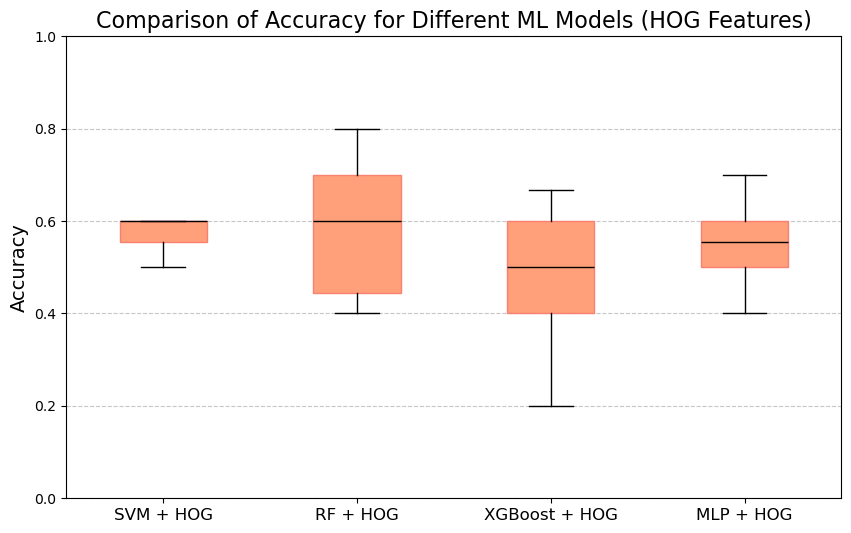

In [ ]:
import matplotlib.pyplot as plt

accuracy_data = {
    "SVM + HOG": [0.5, 0.6, 0.6, 0.6, 0.5555555555555556],
    "RF + HOG": [0.7, 0.4, 0.8, 0.6, 0.4444444444444444],
    "XGBoost + HOG": [0.6, 0.4, 0.2, 0.5, 0.6666666666666666],
    "MLP + HOG": [0.5, 0.4, 0.7, 0.6, 0.5555555555555556]
}

plt.figure(figsize=(10, 6))
plt.boxplot(accuracy_data.values(), patch_artist=True, 
            boxprops=dict(facecolor='lightsalmon', color='salmon'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'))

plt.xticks(range(1, len(accuracy_data) + 1), accuracy_data.keys(), fontsize=12)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Comparison of Accuracy for Different ML Models (HOG Features)", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1)

plt.show()

#463

# Optimized Models

## SVM

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image):
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    hog_features = hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))
    return hog_features

X = []
y = []

for img in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(img))
    y.append(0)

for img in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(img))
    y.append(1)

X = np.array(X)
y = np.array(y)

param_grid = {
    'C': [0.1, 1, 10, 100],              # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'], # Kernel type
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'degree': [2, 3, 4],                 # Only relevant for 'poly' kernel
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=skf,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X, y)

print("\nBest Parameters for SVM + HOG:")
print(grid_search.best_params_)
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_ * 100:.2f}%")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best Parameters for SVM + HOG:
{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validated Accuracy: 61.11%


In [85]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image):
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    hog_features = hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))
    return hog_features

X = []
y = []

# NSEP
for img in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(img))
    y.append(0)

# SEP
for img in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(img))
    y.append(1)

X = np.array(X)
y = np.array(y)

param_grid = {
    'C': [0.1, 1, 5, 10, 25, 50, 75, 100],              # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'], # Kernel type
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'degree': [2, 3, 4, 5, 6],                 # Only relevant for 'poly' kernel
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=skf,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X, y)

print("\nBest Parameters for SVM + HOG:")
print(grid_search.best_params_)
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_ * 100:.2f}%")


Fitting 5 folds for each of 720 candidates, totalling 3600 fits

Best Parameters for SVM + HOG:
{'C': 50, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validated Accuracy: 66.10%


In [ ]:
import optuna
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.preprocessing import StandardScaler

def extract_hog_features(image):
    if len(image.shape) == 3:
        gray = rgb2gray(image)
    else:
        gray = image
    return hog(gray, pixels_per_cell=(10, 10), cells_per_block=(4, 4))

X, y = [], []
for img in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(img))
    y.append(0)
for img in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(img))
    y.append(1)

X = np.array(X)
y = np.array(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def objective(trial):

    kernel = trial.suggest_categorical("kernel", ["linear", "rbf", "poly"])
    params = {
        "C": trial.suggest_loguniform("C", 1e-3, 1e3),
        "kernel": kernel,
    }

    if kernel in ["rbf", "poly"]:
        params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)

    if kernel == "poly":
        params["degree"] = trial.suggest_int("degree", 2, 8)

    clf = SVC(**params)

    scores = []
    for train_idx, test_idx in skf.split(X, y):
        clf.fit(X[train_idx], y[train_idx])
        preds = clf.predict(X[test_idx])
        scores.append(accuracy_score(y[test_idx], preds))

    return np.mean(scores)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=150, show_progress_bar=True)

print("\nBest Hyperparameters Found:")
print(study.best_trial.params)
print(f"Best Accuracy: {study.best_value * 100:.2f}%")

# Best Hyperparameters Found:
# {'kernel': 'poly', 'C': 0.14599694996747814, 'gamma': 0.00015280899909045397, 'degree': 2}
# Best Accuracy: 62.38%


[I 2025-11-26 17:40:00,996] A new study created in memory with name: no-name-62250cfc-841b-4183-918e-f9a0263a27bc
  0%|          | 0/150 [00:00<?, ?it/s]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
Best trial: 0. Best value: 0.567619:   1%|          | 1/150 [00:01<04:38,  1.87s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecat

[I 2025-11-26 17:40:02,861] Trial 0 finished with value: 0.5676190476190476 and parameters: {'kernel': 'linear', 'C': 0.002574724145261081}. Best is trial 0 with value: 0.5676190476190476.


Best trial: 0. Best value: 0.567619:   1%|▏         | 2/150 [00:03<04:42,  1.91s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),


[I 2025-11-26 17:40:04,795] Trial 1 finished with value: 0.4866666666666667 and parameters: {'kernel': 'poly', 'C': 0.021018311255438907, 'gamma': 0.12483258351753607, 'degree': 7}. Best is trial 0 with value: 0.5676190476190476.


Best trial: 0. Best value: 0.567619:   2%|▏         | 3/150 [00:05<04:18,  1.76s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:06,377] Trial 2 finished with value: 0.5676190476190476 and parameters: {'kernel': 'linear', 'C': 189.48255916912208}. Best is trial 0 with value: 0.5676190476190476.


Best trial: 3. Best value: 0.609524:   3%|▎         | 4/150 [00:07<04:21,  1.79s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:08,222] Trial 3 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 0.3790220199455192, 'gamma': 0.014436135906663724, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:   3%|▎         | 5/150 [00:09<04:27,  1.84s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),


[I 2025-11-26 17:40:10,155] Trial 4 finished with value: 0.47333333333333333 and parameters: {'kernel': 'rbf', 'C': 0.18969187847377866, 'gamma': 1.6323563091958282}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:   4%|▍         | 6/150 [00:10<04:15,  1.77s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:11,795] Trial 5 finished with value: 0.5676190476190476 and parameters: {'kernel': 'linear', 'C': 0.004919434415180786}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:   5%|▍         | 7/150 [00:12<04:13,  1.77s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:13,562] Trial 6 finished with value: 0.47333333333333333 and parameters: {'kernel': 'rbf', 'C': 353.89810665558247, 'gamma': 0.005578613384946471}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:   5%|▌         | 8/150 [00:14<04:08,  1.75s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:15,273] Trial 7 finished with value: 0.4866666666666667 and parameters: {'kernel': 'poly', 'C': 196.81109751851534, 'gamma': 0.0010253486163975124, 'degree': 7}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:   6%|▌         | 9/150 [00:15<03:58,  1.69s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:16,843] Trial 8 finished with value: 0.4866666666666667 and parameters: {'kernel': 'poly', 'C': 0.0010763148488366029, 'gamma': 0.15282559244321925, 'degree': 8}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:   7%|▋         | 10/150 [00:17<03:48,  1.63s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:18,329] Trial 9 finished with value: 0.4866666666666667 and parameters: {'kernel': 'poly', 'C': 0.0340847028240728, 'gamma': 0.5680982200396079, 'degree': 6}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:   7%|▋         | 11/150 [00:18<03:42,  1.60s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:19,862] Trial 10 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 6.393449911750054, 'gamma': 0.00012099281615839865, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:   8%|▊         | 12/150 [00:20<03:38,  1.58s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:21,398] Trial 11 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 2.267781751680733, 'gamma': 0.0001560680440429751, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:   9%|▊         | 13/150 [00:22<03:39,  1.61s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:23,054] Trial 12 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 4.241501095083527, 'gamma': 0.006710788770596463, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:   9%|▉         | 14/150 [00:23<03:49,  1.69s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:24,927] Trial 13 finished with value: 0.4866666666666667 and parameters: {'kernel': 'poly', 'C': 11.20733676807472, 'gamma': 0.00011123731559113518, 'degree': 4}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  10%|█         | 15/150 [00:25<03:48,  1.69s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:26,641] Trial 14 finished with value: 0.4866666666666667 and parameters: {'kernel': 'poly', 'C': 0.3197906480645344, 'gamma': 6.547802544260137, 'degree': 4}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  11%|█         | 16/150 [00:27<03:51,  1.72s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:28,434] Trial 15 finished with value: 0.45904761904761904 and parameters: {'kernel': 'rbf', 'C': 19.6174126204432, 'gamma': 0.0014515973129122198}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  11%|█▏        | 17/150 [00:29<03:59,  1.80s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:30,407] Trial 16 finished with value: 0.5676190476190476 and parameters: {'kernel': 'poly', 'C': 0.5003639592017394, 'gamma': 0.019010313340848715, 'degree': 3}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  12%|█▏        | 18/150 [00:31<03:56,  1.79s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:32,175] Trial 17 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 30.641338841168945, 'gamma': 0.0007495536760206771, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  13%|█▎        | 19/150 [00:32<03:49,  1.75s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),


[I 2025-11-26 17:40:33,847] Trial 18 finished with value: 0.47333333333333333 and parameters: {'kernel': 'rbf', 'C': 0.07956935966575572, 'gamma': 0.060286550003322906}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  13%|█▎        | 20/150 [00:34<03:41,  1.70s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:35,421] Trial 19 finished with value: 0.5676190476190476 and parameters: {'kernel': 'linear', 'C': 1.7262067438015234}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  14%|█▍        | 21/150 [00:36<03:41,  1.71s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:37,165] Trial 20 finished with value: 0.4866666666666667 and parameters: {'kernel': 'poly', 'C': 43.804002590085304, 'gamma': 0.0004030953677167255, 'degree': 4}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  15%|█▍        | 22/150 [00:38<03:58,  1.87s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:39,385] Trial 21 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 1.4602553205710682, 'gamma': 0.00010484710918128472, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  15%|█▌        | 23/150 [00:40<03:49,  1.81s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:41,058] Trial 22 finished with value: 0.5676190476190476 and parameters: {'kernel': 'poly', 'C': 4.037259723851638, 'gamma': 0.0003102238820387769, 'degree': 3}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  16%|█▌        | 24/150 [00:42<03:55,  1.87s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:43,086] Trial 23 finished with value: 0.5676190476190476 and parameters: {'kernel': 'poly', 'C': 5.426521903954953, 'gamma': 0.003959635638833055, 'degree': 3}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  17%|█▋        | 25/150 [00:44<04:02,  1.94s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:45,180] Trial 24 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 1.0388859622121802, 'gamma': 0.0003041139140587706, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  17%|█▋        | 26/150 [00:45<03:54,  1.89s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:46,967] Trial 25 finished with value: 0.5676190476190476 and parameters: {'kernel': 'poly', 'C': 73.08385235046426, 'gamma': 0.0022202254255087417, 'degree': 3}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  18%|█▊        | 27/150 [00:47<03:47,  1.85s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:48,718] Trial 26 finished with value: 0.5 and parameters: {'kernel': 'poly', 'C': 0.06367860429186804, 'gamma': 0.011198481766181849, 'degree': 5}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  19%|█▊        | 28/150 [00:49<03:37,  1.78s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),


[I 2025-11-26 17:40:50,350] Trial 27 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 0.590295616580008, 'gamma': 0.00010405604753536812, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  19%|█▉        | 29/150 [00:51<03:32,  1.76s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:52,050] Trial 28 finished with value: 0.5676190476190476 and parameters: {'kernel': 'linear', 'C': 0.14619283790854085}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  20%|██        | 30/150 [00:52<03:30,  1.75s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),


[I 2025-11-26 17:40:53,790] Trial 29 finished with value: 0.45904761904761904 and parameters: {'kernel': 'rbf', 'C': 11.150422479458573, 'gamma': 0.033028077662382055}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  21%|██        | 31/150 [00:54<03:41,  1.87s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:55,911] Trial 30 finished with value: 0.5676190476190476 and parameters: {'kernel': 'linear', 'C': 2.4413486272916876}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  21%|██▏       | 32/150 [00:56<03:34,  1.82s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:57,636] Trial 31 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 6.292085803021221, 'gamma': 0.0036024565450933966, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  22%|██▏       | 33/150 [00:58<03:52,  1.98s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:40:59,988] Trial 32 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 3.1077344220318794, 'gamma': 0.008537438575348706, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  23%|██▎       | 34/150 [01:01<04:01,  2.08s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:02,303] Trial 33 finished with value: 0.5676190476190476 and parameters: {'kernel': 'poly', 'C': 0.01053922948224332, 'gamma': 0.0004482667115692984, 'degree': 3}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  23%|██▎       | 35/150 [01:03<04:18,  2.25s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:04,952] Trial 34 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 0.6969682491868338, 'gamma': 0.036759941979834676, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  24%|██▍       | 36/150 [01:05<04:01,  2.12s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),


[I 2025-11-26 17:41:06,773] Trial 35 finished with value: 0.5676190476190476 and parameters: {'kernel': 'poly', 'C': 11.437062461858813, 'gamma': 0.00021611279957534595, 'degree': 3}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  25%|██▍       | 37/150 [01:07<03:43,  1.98s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:08,416] Trial 36 finished with value: 0.5676190476190476 and parameters: {'kernel': 'linear', 'C': 806.9880078453461}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  25%|██▌       | 38/150 [01:09<03:35,  1.92s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:10,207] Trial 37 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 0.20602773161149912, 'gamma': 0.12102385743971977, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  26%|██▌       | 39/150 [01:11<03:28,  1.88s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:12,004] Trial 38 finished with value: 0.47333333333333333 and parameters: {'kernel': 'rbf', 'C': 67.38754336698192, 'gamma': 0.33802881546108426}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  27%|██▋       | 40/150 [01:12<03:23,  1.85s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:13,792] Trial 39 finished with value: 0.4866666666666667 and parameters: {'kernel': 'poly', 'C': 2.044330780535383, 'gamma': 0.002104494460360578, 'degree': 4}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  27%|██▋       | 41/150 [01:14<03:22,  1.86s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:15,646] Trial 40 finished with value: 0.5676190476190476 and parameters: {'kernel': 'poly', 'C': 0.3455519883344712, 'gamma': 0.015822966724680237, 'degree': 3}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  28%|██▊       | 42/150 [01:16<03:29,  1.94s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:17,779] Trial 41 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 28.31717639819668, 'gamma': 0.0007999513941606826, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  29%|██▊       | 43/150 [01:18<03:34,  2.00s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:19,919] Trial 42 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 144.20866804552517, 'gamma': 0.00020338147875007798, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  29%|██▉       | 44/150 [01:20<03:18,  1.88s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:21,509] Trial 43 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 7.588877028192745, 'gamma': 0.0007665535226444728, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  30%|███       | 45/150 [01:22<03:11,  1.82s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:23,210] Trial 44 finished with value: 0.5676190476190476 and parameters: {'kernel': 'poly', 'C': 22.533768301704683, 'gamma': 0.006045944443813952, 'degree': 3}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  31%|███       | 46/150 [01:23<03:00,  1.74s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:24,749] Trial 45 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 0.9192113928266427, 'gamma': 0.0006506843487453195, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  31%|███▏      | 47/150 [01:25<03:02,  1.77s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:26,592] Trial 46 finished with value: 0.47333333333333333 and parameters: {'kernel': 'rbf', 'C': 19.57021217748432, 'gamma': 0.0001770346180281107}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  32%|███▏      | 48/150 [01:28<03:22,  1.98s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),


[I 2025-11-26 17:41:29,067] Trial 47 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 104.97058870184127, 'gamma': 0.0016670770798091128, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  33%|███▎      | 49/150 [01:29<03:14,  1.93s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:30,871] Trial 48 finished with value: 0.5676190476190476 and parameters: {'kernel': 'linear', 'C': 412.0730347643324}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  33%|███▎      | 50/150 [01:31<02:58,  1.79s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:32,337] Trial 49 finished with value: 0.5 and parameters: {'kernel': 'poly', 'C': 42.2708823439655, 'gamma': 0.001002643738361363, 'degree': 5}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  34%|███▍      | 51/150 [01:33<02:55,  1.77s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:34,063] Trial 50 finished with value: 0.4866666666666667 and parameters: {'kernel': 'poly', 'C': 10.330156835050888, 'gamma': 0.06955988942624454, 'degree': 8}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  35%|███▍      | 52/150 [01:34<02:47,  1.71s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:35,637] Trial 51 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 1.3692719655200678, 'gamma': 0.0001236197405030647, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  35%|███▌      | 53/150 [01:36<02:46,  1.72s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:37,375] Trial 52 finished with value: 0.4866666666666667 and parameters: {'kernel': 'poly', 'C': 4.806485083493027, 'gamma': 0.00011170101600404143, 'degree': 7}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  36%|███▌      | 54/150 [01:38<02:43,  1.70s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:39,035] Trial 53 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 1.5405339724226796, 'gamma': 0.00041346020190416867, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  37%|███▋      | 55/150 [01:39<02:36,  1.65s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:40,574] Trial 54 finished with value: 0.5676190476190476 and parameters: {'kernel': 'poly', 'C': 0.4167293337424748, 'gamma': 0.00018619746115527099, 'degree': 3}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  37%|███▋      | 56/150 [01:41<02:36,  1.67s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:42,260] Trial 55 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 2.7933973113146973, 'gamma': 0.000255830118939114, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  38%|███▊      | 57/150 [01:43<02:36,  1.69s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:43,997] Trial 56 finished with value: 0.5676190476190476 and parameters: {'kernel': 'poly', 'C': 0.09555148224150242, 'gamma': 0.00045804729502879876, 'degree': 3}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  39%|███▊      | 58/150 [01:45<02:47,  1.82s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:46,127] Trial 57 finished with value: 0.47333333333333333 and parameters: {'kernel': 'rbf', 'C': 0.04288250496708817, 'gamma': 9.587923453929324}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  39%|███▉      | 59/150 [01:46<02:45,  1.82s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:47,962] Trial 58 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 0.15945717018110428, 'gamma': 0.003528231127984101, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  40%|████      | 60/150 [01:49<02:57,  1.97s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),


[I 2025-11-26 17:41:50,269] Trial 59 finished with value: 0.4866666666666667 and parameters: {'kernel': 'poly', 'C': 0.864824622599917, 'gamma': 0.022437848771535516, 'degree': 6}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  41%|████      | 61/150 [01:51<03:02,  2.05s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:52,500] Trial 60 finished with value: 0.5676190476190476 and parameters: {'kernel': 'linear', 'C': 4.036695447372346}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  41%|████▏     | 62/150 [01:53<02:56,  2.01s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:54,422] Trial 61 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 1.301310600301514, 'gamma': 0.0002826895244684756, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  42%|████▏     | 63/150 [01:55<02:52,  1.99s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:56,356] Trial 62 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 0.2675274230199681, 'gamma': 0.00014204710449243512, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  43%|████▎     | 64/150 [01:57<02:42,  1.89s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:58,028] Trial 63 finished with value: 0.5676190476190476 and parameters: {'kernel': 'poly', 'C': 0.6048380874448795, 'gamma': 0.0003131457500017966, 'degree': 3}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  43%|████▎     | 65/150 [01:58<02:36,  1.84s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:41:59,757] Trial 64 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 15.787888387377542, 'gamma': 1.8153671474553799, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  44%|████▍     | 66/150 [02:00<02:32,  1.82s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:01,517] Trial 65 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 7.699796648493002, 'gamma': 0.001248531707573895, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  45%|████▍     | 67/150 [02:02<02:26,  1.76s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:03,149] Trial 66 finished with value: 0.5676190476190476 and parameters: {'kernel': 'poly', 'C': 3.1183293494160935, 'gamma': 0.0005397602332225708, 'degree': 3}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  45%|████▌     | 68/150 [02:03<02:23,  1.75s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:04,867] Trial 67 finished with value: 0.4866666666666667 and parameters: {'kernel': 'poly', 'C': 2.0150116747750872, 'gamma': 0.00010286495799035006, 'degree': 4}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  46%|████▌     | 69/150 [02:05<02:24,  1.79s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:06,746] Trial 68 finished with value: 0.47333333333333333 and parameters: {'kernel': 'rbf', 'C': 0.509036612438919, 'gamma': 0.00031916558279170134}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  47%|████▋     | 70/150 [02:07<02:22,  1.78s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),


[I 2025-11-26 17:42:08,497] Trial 69 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 1.0411251160100978, 'gamma': 0.009730989720101679, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  47%|████▋     | 71/150 [02:09<02:23,  1.81s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:10,388] Trial 70 finished with value: 0.5676190476190476 and parameters: {'kernel': 'linear', 'C': 4.095788527493605}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  48%|████▊     | 72/150 [02:11<02:17,  1.76s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:12,042] Trial 71 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 0.6893380290831143, 'gamma': 0.0001611346256540789, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  49%|████▊     | 73/150 [02:12<02:12,  1.72s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:13,662] Trial 72 finished with value: 0.5838095238095238 and parameters: {'kernel': 'poly', 'C': 0.23149971068303735, 'gamma': 0.00010306231371815578, 'degree': 2}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 3. Best value: 0.609524:  49%|████▉     | 74/150 [02:14<02:20,  1.85s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:15,813] Trial 73 finished with value: 0.5676190476190476 and parameters: {'kernel': 'poly', 'C': 0.34850520774303834, 'gamma': 0.00024061778914326358, 'degree': 3}. Best is trial 3 with value: 0.6095238095238096.


Best trial: 74. Best value: 0.610476:  50%|█████     | 75/150 [02:16<02:14,  1.79s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:17,472] Trial 74 finished with value: 0.6104761904761904 and parameters: {'kernel': 'poly', 'C': 0.1190091549122733, 'gamma': 0.00016146149788681216, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  51%|█████     | 76/150 [02:18<02:22,  1.93s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:19,718] Trial 75 finished with value: 0.6104761904761904 and parameters: {'kernel': 'poly', 'C': 0.11675604548307407, 'gamma': 0.00016753571356365927, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  51%|█████▏    | 77/150 [02:21<02:30,  2.06s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:22,076] Trial 76 finished with value: 0.582857142857143 and parameters: {'kernel': 'poly', 'C': 0.03431405153765249, 'gamma': 0.00016798380561799803, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  52%|█████▏    | 78/150 [02:22<02:21,  1.97s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:23,852] Trial 77 finished with value: 0.5676190476190476 and parameters: {'kernel': 'poly', 'C': 0.022448671033427698, 'gamma': 0.002603661712696815, 'degree': 3}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  53%|█████▎    | 79/150 [02:24<02:15,  1.91s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:25,607] Trial 78 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 0.1233946411754098, 'gamma': 0.0005511415996024811, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  53%|█████▎    | 80/150 [02:26<02:07,  1.82s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:27,230] Trial 79 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 0.06535080699403852, 'gamma': 0.005209946437952181, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  54%|█████▍    | 81/150 [02:27<02:00,  1.74s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:28,779] Trial 80 finished with value: 0.5676190476190476 and parameters: {'kernel': 'poly', 'C': 0.007574430397027882, 'gamma': 0.06262804310030812, 'degree': 3}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  55%|█████▍    | 82/150 [02:29<02:05,  1.85s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:30,874] Trial 81 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 0.12605521544825019, 'gamma': 0.0003827203677070584, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  55%|█████▌    | 83/150 [02:31<02:03,  1.85s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:32,723] Trial 82 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 33.26868265590611, 'gamma': 0.00022551927764121005, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  56%|█████▌    | 84/150 [02:33<01:58,  1.79s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:34,389] Trial 83 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 6.324575116874222, 'gamma': 0.01378252072567351, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  57%|█████▋    | 85/150 [02:35<02:09,  1.99s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:36,835] Trial 84 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 14.062665244059952, 'gamma': 0.00014941550023087378, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  57%|█████▋    | 86/150 [02:37<02:07,  2.00s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:38,839] Trial 85 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 1.9983772894669012, 'gamma': 0.0009129425382434205, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  58%|█████▊    | 87/150 [02:39<02:07,  2.02s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:40,940] Trial 86 finished with value: 0.47333333333333333 and parameters: {'kernel': 'rbf', 'C': 1.0172732011885477, 'gamma': 0.007141902391311398}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  59%|█████▊    | 88/150 [02:41<01:59,  1.93s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),


[I 2025-11-26 17:42:42,652] Trial 87 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 0.053370950807797565, 'gamma': 0.00033990133807843405, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  59%|█████▉    | 89/150 [02:43<01:56,  1.91s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:44,504] Trial 88 finished with value: 0.5676190476190476 and parameters: {'kernel': 'linear', 'C': 0.0012824612995581079}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  60%|██████    | 90/150 [02:45<01:49,  1.83s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:46,162] Trial 89 finished with value: 0.5676190476190476 and parameters: {'kernel': 'poly', 'C': 0.18134096321042076, 'gamma': 0.03954356063797169, 'degree': 3}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  61%|██████    | 91/150 [02:46<01:47,  1.82s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:47,953] Trial 90 finished with value: 0.5704761904761905 and parameters: {'kernel': 'poly', 'C': 0.09675876244090832, 'gamma': 0.00014031172226011877, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  61%|██████▏   | 92/150 [02:48<01:49,  1.88s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:49,986] Trial 91 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 0.3220396929821876, 'gamma': 0.0002055658055491026, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  62%|██████▏   | 93/150 [02:51<01:59,  2.10s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:52,598] Trial 92 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 0.5122325101689821, 'gamma': 0.00010247947769547605, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  63%|██████▎   | 94/150 [02:53<01:53,  2.03s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:54,444] Trial 93 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 1.3011930672625853, 'gamma': 0.024099674419081726, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  63%|██████▎   | 95/150 [02:55<01:48,  1.97s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:56,295] Trial 94 finished with value: 0.4866666666666667 and parameters: {'kernel': 'poly', 'C': 0.8087118051352701, 'gamma': 0.0001351890275639973, 'degree': 6}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  64%|██████▍   | 96/150 [02:56<01:41,  1.89s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:57,988] Trial 95 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 2.6061986477966426, 'gamma': 0.00024179798359317092, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  65%|██████▍   | 97/150 [02:58<01:36,  1.82s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:42:59,633] Trial 96 finished with value: 0.5676190476190476 and parameters: {'kernel': 'poly', 'C': 8.330311478777935, 'gamma': 0.00019585245671598387, 'degree': 3}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  65%|██████▌   | 98/150 [03:02<02:10,  2.52s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:43:03,782] Trial 97 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 1.704378976257778, 'gamma': 0.0003908588747828158, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  66%|██████▌   | 99/150 [03:06<02:33,  3.01s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:43:07,943] Trial 98 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 0.4064648749137319, 'gamma': 0.0006655881098887092, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  67%|██████▋   | 100/150 [03:11<02:53,  3.47s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:43:12,490] Trial 99 finished with value: 0.47333333333333333 and parameters: {'kernel': 'rbf', 'C': 0.2569008314683895, 'gamma': 0.00012825513673072475}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  67%|██████▋   | 101/150 [03:15<03:01,  3.71s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:43:16,768] Trial 100 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 68.23771005788203, 'gamma': 0.00028417788310569495, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  68%|██████▊   | 102/150 [03:20<03:06,  3.88s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:43:21,035] Trial 101 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 3.668710656552283, 'gamma': 0.003843609276829961, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  69%|██████▊   | 103/150 [03:24<03:06,  3.96s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:43:25,189] Trial 102 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 2.3927931419364468, 'gamma': 0.01234301808921101, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  69%|██████▉   | 104/150 [13:00<2:14:39, 175.64s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:01,434] Trial 103 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 4.53622236217707, 'gamma': 0.0016796854287956656, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  70%|███████   | 105/150 [13:02<1:32:42, 123.60s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:03,606] Trial 104 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 6.539398607294192, 'gamma': 0.00576585605709894, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  71%|███████   | 106/150 [13:04<1:03:51, 87.08s/it] C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),


[I 2025-11-26 17:53:05,453] Trial 105 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 1.330697679850574, 'gamma': 0.00018429744854434597, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  71%|███████▏  | 107/150 [13:06<44:08, 61.58s/it]  C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:07,561] Trial 106 finished with value: 0.5676190476190476 and parameters: {'kernel': 'linear', 'C': 0.5918038469222422}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  72%|███████▏  | 108/150 [13:08<30:32, 43.63s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:09,301] Trial 107 finished with value: 0.5676190476190476 and parameters: {'kernel': 'poly', 'C': 10.379966451442579, 'gamma': 0.01709246606083016, 'degree': 3}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  73%|███████▎  | 109/150 [13:10<21:14, 31.09s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:11,116] Trial 108 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 22.75562339170992, 'gamma': 0.0027478556068849117, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  73%|███████▎  | 110/150 [13:12<14:57, 22.44s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:13,389] Trial 109 finished with value: 0.4866666666666667 and parameters: {'kernel': 'poly', 'C': 3.5367709647035155, 'gamma': 0.0012094124115878933, 'degree': 4}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  74%|███████▍  | 111/150 [13:13<10:31, 16.18s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:14,952] Trial 110 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 5.6846685675811335, 'gamma': 0.0004751068291289361, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  75%|███████▍  | 112/150 [13:15<07:31, 11.88s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:16,785] Trial 111 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 2.8942106082102588, 'gamma': 0.008574707135823792, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  75%|███████▌  | 113/150 [13:17<05:25,  8.81s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:18,441] Trial 112 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 1.0847841478226263, 'gamma': 0.004245925737707164, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  76%|███████▌  | 114/150 [13:19<03:58,  6.63s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:19,995] Trial 113 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 1.809573772030787, 'gamma': 0.008434017704921913, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  77%|███████▋  | 115/150 [13:20<03:01,  5.19s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:21,829] Trial 114 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 5.263311795971333, 'gamma': 0.00012251255105684785, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  77%|███████▋  | 116/150 [13:22<02:21,  4.16s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:23,579] Trial 115 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 45.34233630349462, 'gamma': 0.021731910014962018, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  78%|███████▊  | 117/150 [13:24<01:53,  3.43s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:25,313] Trial 116 finished with value: 0.4866666666666667 and parameters: {'kernel': 'poly', 'C': 0.7349374933244343, 'gamma': 0.00026267596490231487, 'degree': 8}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  79%|███████▊  | 118/150 [13:26<01:33,  2.93s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:27,070] Trial 117 finished with value: 0.5676190476190476 and parameters: {'kernel': 'poly', 'C': 14.020503580041035, 'gamma': 0.00016796405899968488, 'degree': 3}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  79%|███████▉  | 119/150 [13:27<01:19,  2.56s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:28,787] Trial 118 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 0.09045298073283824, 'gamma': 0.006797838431284289, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  80%|████████  | 120/150 [13:29<01:11,  2.39s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:30,753] Trial 119 finished with value: 0.4876190476190477 and parameters: {'kernel': 'rbf', 'C': 8.168937965724252, 'gamma': 0.01081574669562015}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  81%|████████  | 121/150 [13:31<01:03,  2.20s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:32,524] Trial 120 finished with value: 0.5676190476190476 and parameters: {'kernel': 'poly', 'C': 0.1947753122084713, 'gamma': 0.004716320614825872, 'degree': 3}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  81%|████████▏ | 122/150 [13:33<00:56,  2.01s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:34,084] Trial 121 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 0.406273498708732, 'gamma': 0.049692672143531756, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  82%|████████▏ | 123/150 [13:34<00:50,  1.88s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:35,650] Trial 122 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 2.218893438904729, 'gamma': 0.00010516078345652224, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  83%|████████▎ | 124/150 [13:36<00:47,  1.82s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:37,328] Trial 123 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 0.929931130263255, 'gamma': 0.02830208981554417, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  83%|████████▎ | 125/150 [13:38<00:44,  1.78s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:39,037] Trial 124 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 1.5839075022518836, 'gamma': 0.16488094422238614, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 74. Best value: 0.610476:  84%|████████▍ | 126/150 [13:39<00:41,  1.73s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:40,641] Trial 125 finished with value: 0.6104761904761904 and parameters: {'kernel': 'poly', 'C': 0.12848072018111328, 'gamma': 0.00015358505661766179, 'degree': 2}. Best is trial 74 with value: 0.6104761904761904.


Best trial: 126. Best value: 0.62381:  85%|████████▍ | 127/150 [13:41<00:38,  1.69s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),


[I 2025-11-26 17:53:42,244] Trial 126 finished with value: 0.6238095238095238 and parameters: {'kernel': 'poly', 'C': 0.14599694996747814, 'gamma': 0.00015280899909045397, 'degree': 2}. Best is trial 126 with value: 0.6238095238095238.


Best trial: 126. Best value: 0.62381:  85%|████████▌ | 128/150 [13:43<00:37,  1.71s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:43,999] Trial 127 finished with value: 0.5676190476190476 and parameters: {'kernel': 'linear', 'C': 0.14300529176786084}. Best is trial 126 with value: 0.6238095238095238.


Best trial: 126. Best value: 0.62381:  86%|████████▌ | 129/150 [13:44<00:35,  1.68s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:45,602] Trial 128 finished with value: 0.5704761904761905 and parameters: {'kernel': 'poly', 'C': 0.0796280306560524, 'gamma': 0.00016069128442215192, 'degree': 2}. Best is trial 126 with value: 0.6238095238095238.


Best trial: 126. Best value: 0.62381:  87%|████████▋ | 130/150 [13:46<00:34,  1.70s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:47,356] Trial 129 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 247.29950804627907, 'gamma': 0.00019837315319614382, 'degree': 2}. Best is trial 126 with value: 0.6238095238095238.


Best trial: 126. Best value: 0.62381:  87%|████████▋ | 131/150 [13:48<00:32,  1.70s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:49,070] Trial 130 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 0.25898829955677566, 'gamma': 0.00036112243815929944, 'degree': 2}. Best is trial 126 with value: 0.6238095238095238.


Best trial: 126. Best value: 0.62381:  88%|████████▊ | 132/150 [13:49<00:29,  1.66s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:50,602] Trial 131 finished with value: 0.4866666666666667 and parameters: {'kernel': 'poly', 'C': 0.1228119208389195, 'gamma': 0.0001341374539945909, 'degree': 7}. Best is trial 126 with value: 0.6238095238095238.


Best trial: 126. Best value: 0.62381:  89%|████████▊ | 133/150 [13:51<00:27,  1.64s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:52,215] Trial 132 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 0.1565143208831031, 'gamma': 0.00023532622015945404, 'degree': 2}. Best is trial 126 with value: 0.6238095238095238.


Best trial: 126. Best value: 0.62381:  89%|████████▉ | 134/150 [13:52<00:26,  1.66s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:53,910] Trial 133 finished with value: 0.6104761904761904 and parameters: {'kernel': 'poly', 'C': 0.06027863108665671, 'gamma': 0.0001608803056934165, 'degree': 2}. Best is trial 126 with value: 0.6238095238095238.


Best trial: 126. Best value: 0.62381:  90%|█████████ | 135/150 [13:54<00:25,  1.70s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:55,699] Trial 134 finished with value: 0.5 and parameters: {'kernel': 'poly', 'C': 0.02447297315624043, 'gamma': 0.00010012457588870611, 'degree': 2}. Best is trial 126 with value: 0.6238095238095238.


Best trial: 126. Best value: 0.62381:  91%|█████████ | 136/150 [13:56<00:24,  1.74s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:57,545] Trial 135 finished with value: 0.5971428571428571 and parameters: {'kernel': 'poly', 'C': 0.054707296935363546, 'gamma': 0.00014818473261122954, 'degree': 2}. Best is trial 126 with value: 0.6238095238095238.


Best trial: 126. Best value: 0.62381:  91%|█████████▏| 137/150 [13:58<00:22,  1.73s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:53:59,250] Trial 136 finished with value: 0.6104761904761904 and parameters: {'kernel': 'poly', 'C': 0.03191578882740798, 'gamma': 0.00031599941245177046, 'degree': 2}. Best is trial 126 with value: 0.6238095238095238.


Best trial: 126. Best value: 0.62381:  92%|█████████▏| 138/150 [14:00<00:21,  1.76s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:54:01,078] Trial 137 finished with value: 0.5971428571428571 and parameters: {'kernel': 'poly', 'C': 0.014748921092795795, 'gamma': 0.00029906122963059426, 'degree': 2}. Best is trial 126 with value: 0.6238095238095238.


Best trial: 126. Best value: 0.62381:  93%|█████████▎| 139/150 [14:01<00:19,  1.74s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:54:02,788] Trial 138 finished with value: 0.5 and parameters: {'kernel': 'poly', 'C': 0.04459693776305675, 'gamma': 0.00017359741067825459, 'degree': 5}. Best is trial 126 with value: 0.6238095238095238.


Best trial: 126. Best value: 0.62381:  93%|█████████▎| 140/150 [14:03<00:17,  1.71s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:54:04,423] Trial 139 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 0.03788977476636419, 'gamma': 0.0005962708143998341, 'degree': 2}. Best is trial 126 with value: 0.6238095238095238.


Best trial: 126. Best value: 0.62381:  94%|█████████▍| 141/150 [14:05<00:15,  1.68s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:54:06,036] Trial 140 finished with value: 0.6104761904761904 and parameters: {'kernel': 'poly', 'C': 0.0261846880226958, 'gamma': 0.00024124785637388656, 'degree': 2}. Best is trial 126 with value: 0.6238095238095238.


Best trial: 126. Best value: 0.62381:  95%|█████████▍| 142/150 [14:06<00:13,  1.63s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:54:07,558] Trial 141 finished with value: 0.5971428571428571 and parameters: {'kernel': 'poly', 'C': 0.029186890373730043, 'gamma': 0.00021243752507794678, 'degree': 2}. Best is trial 126 with value: 0.6238095238095238.


Best trial: 126. Best value: 0.62381:  95%|█████████▌| 143/150 [14:08<00:11,  1.67s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:54:09,324] Trial 142 finished with value: 0.5971428571428572 and parameters: {'kernel': 'poly', 'C': 0.06686954823847582, 'gamma': 0.00013025822354764685, 'degree': 2}. Best is trial 126 with value: 0.6238095238095238.


Best trial: 126. Best value: 0.62381:  96%|█████████▌| 144/150 [14:10<00:10,  1.81s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:54:11,441] Trial 143 finished with value: 0.5971428571428571 and parameters: {'kernel': 'poly', 'C': 0.017791440525783134, 'gamma': 0.00027567662799871107, 'degree': 2}. Best is trial 126 with value: 0.6238095238095238.


Best trial: 126. Best value: 0.62381:  97%|█████████▋| 145/150 [14:12<00:08,  1.75s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:54:13,074] Trial 144 finished with value: 0.5838095238095238 and parameters: {'kernel': 'poly', 'C': 0.010044288188789453, 'gamma': 0.0004892227854369691, 'degree': 2}. Best is trial 126 with value: 0.6238095238095238.


Best trial: 126. Best value: 0.62381:  97%|█████████▋| 146/150 [14:13<00:06,  1.73s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:54:14,740] Trial 145 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 0.06762939809158577, 'gamma': 0.0003404471093843811, 'degree': 2}. Best is trial 126 with value: 0.6238095238095238.


Best trial: 126. Best value: 0.62381:  98%|█████████▊| 147/150 [14:15<00:05,  1.72s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:54:16,440] Trial 146 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 0.103647289843208, 'gamma': 0.00021320798790971097, 'degree': 2}. Best is trial 126 with value: 0.6238095238095238.


Best trial: 126. Best value: 0.62381:  99%|█████████▊| 148/150 [14:17<00:03,  1.78s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:54:18,373] Trial 147 finished with value: 0.47333333333333333 and parameters: {'kernel': 'rbf', 'C': 0.046762202204032, 'gamma': 0.00012393380898822844}. Best is trial 126 with value: 0.6238095238095238.


Best trial: 126. Best value: 0.62381:  99%|█████████▉| 149/150 [14:19<00:01,  1.82s/it]C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
C:\Users\shiva\AppData\Local\Temp\ipykernel_18640\4238774505.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 1e1)


[I 2025-11-26 17:54:20,265] Trial 148 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 0.22372094807139728, 'gamma': 0.00015649484940336364, 'degree': 2}. Best is trial 126 with value: 0.6238095238095238.


Best trial: 126. Best value: 0.62381: 100%|██████████| 150/150 [14:21<00:00,  5.74s/it]

[I 2025-11-26 17:54:22,006] Trial 149 finished with value: 0.6095238095238096 and parameters: {'kernel': 'poly', 'C': 0.031507244542339906, 'gamma': 1.3729991947419817, 'degree': 2}. Best is trial 126 with value: 0.6238095238095238.

Best Hyperparameters Found:
{'kernel': 'poly', 'C': 0.14599694996747814, 'gamma': 0.00015280899909045397, 'degree': 2}
Best Accuracy: 62.38%


In [159]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image):
    if len(image.shape) == 3:  # Convert to grayscale
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))

X = []
y = []

for cropped_image in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(cropped_image))
    y.append(0)

for cropped_image in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(cropped_image))
    y.append(1)

y = np.array(y)

try:
    X = np.vstack(X)
except ValueError:
    X = np.array([x.flatten() for x in X], dtype=object)

svm = SVC(C=50, degree=2, gamma='auto', kernel='rbf', random_state=42)
    #{'C': 50, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores_SVM_HOG = []
f1_scores_SVM_HOG = []
precision_scores_SVM_HOG = []
recall_scores_SVM_HOG = []
tss_scores_SVM_HOG = []
hss_scores_SVM_HOG = []

for train_index, test_index in skf.split(range(len(X)), y):
    X_train = [X[i] for i in train_index]
    X_test = [X[i] for i in test_index]
    y_train, y_test = y[train_index], y[test_index]

    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    prec = precision_score(y_test, y_pred, average="macro")
    rec = recall_score(y_test, y_pred, average="macro")

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = (2 * ((tp * tn) - (fn * fp))) / (((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp)))

    accuracy_scores_SVM_HOG.append(acc)
    f1_scores_SVM_HOG.append(f1)
    precision_scores_SVM_HOG.append(prec)
    recall_scores_SVM_HOG.append(rec)
    tss_scores_SVM_HOG.append(tss)
    hss_scores_SVM_HOG.append(hss)

mean_accuracy = np.mean(accuracy_scores_SVM_HOG)
mean_f1 = np.mean(f1_scores_SVM_HOG)
mean_tss = np.mean(tss_scores_SVM_HOG)
mean_hss = np.mean(hss_scores_SVM_HOG)

print("SVM + HOG Results")
print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean F1 Score: {mean_f1:.2f}")
print(f"Mean TSS: {mean_tss:.2f}")
print(f"Mean HSS: {mean_hss:.2f}")
print(f"All Accuracy: {accuracy_scores_SVM_HOG}")


SVM + HOG Results
Mean Accuracy: 66.10%
Mean F1 Score: 0.65
Mean TSS: 0.35
Mean HSS: 0.34
All Accuracy: [0.6666666666666666, 0.6666666666666666, 0.7333333333333333, 0.6666666666666666, 0.5714285714285714]


In [33]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image):
    if len(image.shape) == 3:  # Convert to grayscale
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(14, 14), cells_per_block=(3, 3), orientations=5, block_norm='L2-Hys', transform_sqrt=True)
# {'hog_params': {'pixels_per_cell': (14, 14), 'cells_per_block': (3, 3), 'orientations': 5, 'block_norm': 'L2-Hys', 'transform_sqrt': True}, 'mean_accuracy': 0.7847619047619048, 'mean_tss': 0.5714285714285715}

X = []
y = []

for cropped_image in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(cropped_image))
    y.append(0)

for cropped_image in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(cropped_image))
    y.append(1)

y = np.array(y)

try:
    X = np.vstack(X)
except ValueError:
    X = np.array([x.flatten() for x in X], dtype=object)

svm = SVC(C=50, degree=2, gamma='auto', kernel='rbf', random_state=42)
    #{'C': 50, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores_SVM_HOG = []
f1_scores_SVM_HOG = []
precision_scores_SVM_HOG = []
recall_scores_SVM_HOG = []
tss_scores_SVM_HOG = []
hss_scores_SVM_HOG = []

for train_index, test_index in skf.split(range(len(X)), y):
    X_train = [X[i] for i in train_index]
    X_test = [X[i] for i in test_index]
    y_train, y_test = y[train_index], y[test_index]

    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    prec = precision_score(y_test, y_pred, average="macro")
    rec = recall_score(y_test, y_pred, average="macro")

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = (2 * ((tp * tn) - (fn * fp))) / (((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp)))

    accuracy_scores_SVM_HOG.append(acc)
    f1_scores_SVM_HOG.append(f1)
    precision_scores_SVM_HOG.append(prec)
    recall_scores_SVM_HOG.append(rec)
    tss_scores_SVM_HOG.append(tss)
    hss_scores_SVM_HOG.append(hss)

mean_accuracy = np.mean(accuracy_scores_SVM_HOG)
mean_f1 = np.mean(f1_scores_SVM_HOG)
mean_tss = np.mean(tss_scores_SVM_HOG)
mean_hss = np.mean(hss_scores_SVM_HOG)

print("SVM + HOG Results")
print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean F1 Score: {mean_f1:.2f}")
print(f"Mean TSS: {mean_tss:.2f}")
print(f"Mean HSS: {mean_hss:.2f}")
print(f"All Accuracy: {accuracy_scores_SVM_HOG}")

# Before:
# SVM + HOG Results
# Mean Accuracy: 66.10%
# Mean F1 Score: 0.65
# Mean TSS: 0.35
# Mean HSS: 0.34
# All Accuracy: [0.6666666666666666, 0.6666666666666666, 0.7333333333333333, 0.6666666666666666, 0.5714285714285714]


SVM + HOG Results
Mean Accuracy: 66.38%
Mean F1 Score: 0.65
Mean TSS: 0.31
Mean HSS: 0.32
All Accuracy: [0.7333333333333333, 0.6666666666666666, 0.6, 0.5333333333333333, 0.7857142857142857]


## Random Forest

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image):
    if len(image.shape) == 3: 
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))

X = []
y = []

for cropped_image in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(cropped_image))
    y.append(0)

for cropped_image in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(cropped_image))
    y.append(1)

X = np.array(X)
y = np.array(y)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=make_scorer(accuracy_score),
    cv=skf,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X, y)

print("Best Parameters for RF + HOG:", grid_search.best_params_)
print(f"Best Accuracy: {grid_search.best_score_ * 100:.2f}%")


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Parameters for RF + HOG: {'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 63.33%


In [161]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image):
    if len(image.shape) == 3: 
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))

X = []
y = []

# NSEP
for cropped_image in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(cropped_image))
    y.append(0)

# SEP
for cropped_image in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(cropped_image))
    y.append(1)

X = np.array(X)
y = np.array(y)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [25, 50, 75, 100, 150, 200, 250, 300],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 3, 4, 5, 7, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=make_scorer(accuracy_score),
    cv=skf,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X, y)

print("Best Parameters for RF + HOG:", grid_search.best_params_)
print(f"Best Accuracy: {grid_search.best_score_ * 100:.2f}%")

# Fitting 5 folds for each of 576 candidates, totalling 2880 fits
# Best Parameters for RF + HOG: {'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
# Best Accuracy: 63.33%


Fitting 5 folds for each of 8064 candidates, totalling 40320 fits
Best Parameters for RF + HOG: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 250}
Best Accuracy: 75.71%


In [34]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import hog
from skimage.color import rgb2gray

# Define a function to extract HOG features from images
def extract_hog_features(image):
    # Convert image to grayscale if it's not already
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    # Extract HOG features
    hog_features = hog(gray_image, pixels_per_cell=(14, 14), cells_per_block=(3, 3), orientations=5, block_norm='L2-Hys', transform_sqrt=True)
    return hog_features

# Initialize empty lists for descriptors and labels
X = []
y = []

# Process images for NSEP
for cropped_image in adjusted_images_AR_NSEP.values():
    hog_features = extract_hog_features(cropped_image)
    X.append(hog_features)
    y.append(0)  # NSEP label

# Process images for SEP
for cropped_image in adjusted_images_AR_SEP.values():
    hog_features = extract_hog_features(cropped_image)
    X.append(hog_features)
    y.append(1)  # SEP label

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

random_forest = RandomForestClassifier(
    n_estimators=250,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=10,
    bootstrap=False,
    random_state=42
    #Best Parameters for RF + HOG: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 250}

)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize empty lists to store metrics
accuracy_scores_RF_HOG = []
f1_scores_RF_HOG = []
precision_scores_RF_HOG = []
recall_scores_RF_HOG = []
tss_scores_RF_HOG = []
hss_scores_RF_HOG = []

# Perform 5-fold stratified cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the classifier to the training data
    random_forest.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = random_forest.predict(X_test)

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_RF_HOG.append(accuracy)

    # Calculate F1 score and append to the list
    f1 = f1_score(y_test, y_pred, average="weighted")
    f1_scores_RF_HOG.append(f1)

    # Calculate precision and recall and append to the lists
    precision = precision_score(y_test, y_pred, average='macro')
    precision_scores_RF_HOG.append(precision)
    recall = recall_score(y_test, y_pred, average='macro')
    recall_scores_RF_HOG.append(recall)

    # Confusion matrix for TSS and HSS
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # TSS calculation
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    tss_scores_RF_HOG.append(tss)

    # HSS calculation
    hss = (2 * ((tp * tn) - (fn * fp))) / (
        ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
    )
    hss_scores_RF_HOG.append(hss)

# Calculate mean accuracy, F1 score, TSS, and HSS
mean_accuracy = np.mean(accuracy_scores_RF_HOG)
mean_f1 = np.mean(f1_scores_RF_HOG)
mean_tss = np.mean(tss_scores_RF_HOG)
mean_hss = np.mean(hss_scores_RF_HOG)

# Output the metrics
print("Optimized RF + HOG Results")
print(f"Mean accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean F1 score: {mean_f1:.2f}")
print(f"Mean TSS: {mean_tss:.2f}")
print(f"Mean HSS: {mean_hss:.2f}")
print(f"All Accuracy: {accuracy_scores_RF_HOG}")

#After: 
#Optimized RF + HOG Results
# Mean accuracy: 75.71%
# Mean F1 score: 0.75
# Mean TSS: 0.50
# Mean HSS: 0.51
# All Accuracy: [0.6666666666666666, 0.8, 0.8666666666666667, 0.6666666666666666, 0.7857142857142857]

Optimized RF + HOG Results
Mean accuracy: 75.81%
Mean F1 score: 0.75
Mean TSS: 0.51
Mean HSS: 0.51
All Accuracy: [0.7333333333333333, 0.6666666666666666, 0.8, 0.7333333333333333, 0.8571428571428571]


In [36]:
import optuna
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image):
    if len(image.shape) == 3: 
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))

X, y = [], []
for img in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(img))
    y.append(0)
for img in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(img))
    y.append(1)

X, y = np.array(X), np.array(y)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def objective(trial):

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 25, 400),
        "max_depth": trial.suggest_int("max_depth", 2, 40),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 12),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 8),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
    }

    # 'n_estimators': [25, 50, 75, 100, 150, 200, 250, 300],
    # 'max_depth': [None, 5, 10, 15, 20, 30],
    # 'min_samples_split': [2, 3, 4, 5, 7, 9, 10],
    # 'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    # 'max_features': ['sqrt', 'log2'],
    # 'bootstrap': [True, False]

    clf = RandomForestClassifier(**params, random_state=42, n_jobs=-1)

    scores = []
    for train_idx, test_idx in skf.split(X, y):
        clf.fit(X[train_idx], y[train_idx])
        y_pred = clf.predict(X[test_idx])
        scores.append(accuracy_score(y[test_idx], y_pred))

    return np.mean(scores)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=150, show_progress_bar=True)

print("\nBest Accuracy:", study.best_value)
print("Best Parameters:")
for k, v in study.best_trial.params.items():
    print(f"   {k}: {v}")


[I 2025-12-02 09:59:46,914] A new study created in memory with name: no-name-d5f186e3-3b59-42c1-a664-a54832ea6294
Best trial: 0. Best value: 0.702857:   1%|          | 1/150 [00:01<03:23,  1.37s/it]

[I 2025-12-02 09:59:48,281] Trial 0 finished with value: 0.7028571428571428 and parameters: {'n_estimators': 89, 'max_depth': 37, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.7028571428571428.


Best trial: 1. Best value: 0.717143:   1%|▏         | 2/150 [00:05<07:03,  2.86s/it]

[I 2025-12-02 09:59:52,189] Trial 1 finished with value: 0.7171428571428571 and parameters: {'n_estimators': 331, 'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.7171428571428571.


Best trial: 1. Best value: 0.717143:   2%|▏         | 3/150 [00:06<05:06,  2.09s/it]

[I 2025-12-02 09:59:53,352] Trial 2 finished with value: 0.6352380952380952 and parameters: {'n_estimators': 92, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': False}. Best is trial 1 with value: 0.7171428571428571.


Best trial: 1. Best value: 0.717143:   3%|▎         | 4/150 [00:09<06:17,  2.58s/it]

[I 2025-12-02 09:59:56,696] Trial 3 finished with value: 0.7171428571428571 and parameters: {'n_estimators': 293, 'max_depth': 24, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.7171428571428571.


Best trial: 1. Best value: 0.717143:   3%|▎         | 5/150 [00:11<05:19,  2.21s/it]

[I 2025-12-02 09:59:58,231] Trial 4 finished with value: 0.5942857142857143 and parameters: {'n_estimators': 118, 'max_depth': 29, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.7171428571428571.


Best trial: 1. Best value: 0.717143:   4%|▍         | 6/150 [00:13<05:37,  2.34s/it]

[I 2025-12-02 10:00:00,855] Trial 5 finished with value: 0.621904761904762 and parameters: {'n_estimators': 238, 'max_depth': 26, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.7171428571428571.


Best trial: 1. Best value: 0.717143:   5%|▍         | 7/150 [00:18<07:35,  3.18s/it]

[I 2025-12-02 10:00:05,757] Trial 6 finished with value: 0.6476190476190476 and parameters: {'n_estimators': 388, 'max_depth': 30, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 1 with value: 0.7171428571428571.


Best trial: 1. Best value: 0.717143:   5%|▌         | 8/150 [00:20<06:32,  2.76s/it]

[I 2025-12-02 10:00:07,628] Trial 7 finished with value: 0.6495238095238095 and parameters: {'n_estimators': 217, 'max_depth': 11, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False}. Best is trial 1 with value: 0.7171428571428571.


Best trial: 1. Best value: 0.717143:   6%|▌         | 9/150 [00:23<06:29,  2.76s/it]

[I 2025-12-02 10:00:10,378] Trial 8 finished with value: 0.6085714285714285 and parameters: {'n_estimators': 260, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.7171428571428571.


Best trial: 1. Best value: 0.717143:   7%|▋         | 10/150 [00:27<07:19,  3.14s/it]

[I 2025-12-02 10:00:14,361] Trial 9 finished with value: 0.5809523809523809 and parameters: {'n_estimators': 397, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.7171428571428571.


Best trial: 1. Best value: 0.717143:   7%|▋         | 11/150 [00:30<07:26,  3.21s/it]

[I 2025-12-02 10:00:17,745] Trial 10 finished with value: 0.6904761904761905 and parameters: {'n_estimators': 322, 'max_depth': 5, 'min_samples_split': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.7171428571428571.


Best trial: 1. Best value: 0.717143:   8%|▊         | 12/150 [00:34<07:30,  3.26s/it]

[I 2025-12-02 10:00:21,121] Trial 11 finished with value: 0.7171428571428571 and parameters: {'n_estimators': 319, 'max_depth': 19, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.7171428571428571.


Best trial: 1. Best value: 0.717143:   9%|▊         | 13/150 [00:37<07:29,  3.28s/it]

[I 2025-12-02 10:00:24,444] Trial 12 finished with value: 0.6904761904761905 and parameters: {'n_estimators': 305, 'max_depth': 22, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.7171428571428571.


Best trial: 1. Best value: 0.717143:   9%|▉         | 14/150 [00:41<07:44,  3.41s/it]

[I 2025-12-02 10:00:28,156] Trial 13 finished with value: 0.6904761904761905 and parameters: {'n_estimators': 338, 'max_depth': 18, 'min_samples_split': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.7171428571428571.


Best trial: 1. Best value: 0.717143:  10%|█         | 15/150 [00:43<06:49,  3.04s/it]

[I 2025-12-02 10:00:30,332] Trial 14 finished with value: 0.6904761904761905 and parameters: {'n_estimators': 178, 'max_depth': 40, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.7171428571428571.


Best trial: 1. Best value: 0.717143:  11%|█         | 16/150 [00:45<05:58,  2.68s/it]

[I 2025-12-02 10:00:32,174] Trial 15 finished with value: 0.6761904761904762 and parameters: {'n_estimators': 169, 'max_depth': 2, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.7171428571428571.


Best trial: 1. Best value: 0.717143:  11%|█▏        | 17/150 [00:48<05:59,  2.71s/it]

[I 2025-12-02 10:00:34,945] Trial 16 finished with value: 0.6904761904761905 and parameters: {'n_estimators': 261, 'max_depth': 23, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.7171428571428571.


Best trial: 1. Best value: 0.717143:  12%|█▏        | 18/150 [00:51<06:37,  3.01s/it]

[I 2025-12-02 10:00:38,657] Trial 17 finished with value: 0.7171428571428571 and parameters: {'n_estimators': 357, 'max_depth': 14, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.7171428571428571.


Best trial: 18. Best value: 0.717143:  13%|█▎        | 19/150 [00:52<05:04,  2.32s/it]

[I 2025-12-02 10:00:39,378] Trial 18 finished with value: 0.7171428571428572 and parameters: {'n_estimators': 39, 'max_depth': 34, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 18 with value: 0.7171428571428572.


Best trial: 18. Best value: 0.717143:  13%|█▎        | 20/150 [00:53<04:07,  1.90s/it]

[I 2025-12-02 10:00:40,316] Trial 19 finished with value: 0.7161904761904763 and parameters: {'n_estimators': 53, 'max_depth': 33, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 18 with value: 0.7171428571428572.


Best trial: 18. Best value: 0.717143:  14%|█▍        | 21/150 [00:53<03:15,  1.51s/it]

[I 2025-12-02 10:00:40,911] Trial 20 finished with value: 0.702857142857143 and parameters: {'n_estimators': 31, 'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 18 with value: 0.7171428571428572.


Best trial: 18. Best value: 0.717143:  15%|█▍        | 22/150 [00:57<04:15,  1.99s/it]

[I 2025-12-02 10:00:44,028] Trial 21 finished with value: 0.7171428571428572 and parameters: {'n_estimators': 288, 'max_depth': 34, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 18 with value: 0.7171428571428572.


Best trial: 18. Best value: 0.717143:  15%|█▌        | 23/150 [00:59<04:18,  2.03s/it]

[I 2025-12-02 10:00:46,162] Trial 22 finished with value: 0.7171428571428572 and parameters: {'n_estimators': 170, 'max_depth': 35, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 18 with value: 0.7171428571428572.


Best trial: 18. Best value: 0.717143:  16%|█▌        | 24/150 [01:01<04:06,  1.95s/it]

[I 2025-12-02 10:00:47,930] Trial 23 finished with value: 0.7038095238095238 and parameters: {'n_estimators': 152, 'max_depth': 36, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 18 with value: 0.7171428571428572.


Best trial: 24. Best value: 0.730476:  17%|█▋        | 25/150 [01:03<04:11,  2.01s/it]

[I 2025-12-02 10:00:50,080] Trial 24 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 197, 'max_depth': 34, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 24 with value: 0.7304761904761905.


Best trial: 24. Best value: 0.730476:  17%|█▋        | 26/150 [01:06<04:44,  2.29s/it]

[I 2025-12-02 10:00:53,031] Trial 25 finished with value: 0.7171428571428572 and parameters: {'n_estimators': 275, 'max_depth': 40, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 24 with value: 0.7304761904761905.


Best trial: 24. Best value: 0.730476:  18%|█▊        | 27/150 [01:08<04:39,  2.28s/it]

[I 2025-12-02 10:00:55,261] Trial 26 finished with value: 0.6761904761904762 and parameters: {'n_estimators': 195, 'max_depth': 33, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 24 with value: 0.7304761904761905.


Best trial: 24. Best value: 0.730476:  19%|█▊        | 28/150 [01:10<04:21,  2.14s/it]

[I 2025-12-02 10:00:57,090] Trial 27 finished with value: 0.7038095238095238 and parameters: {'n_estimators': 141, 'max_depth': 27, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 24 with value: 0.7304761904761905.


Best trial: 24. Best value: 0.730476:  19%|█▉        | 29/150 [01:12<04:30,  2.23s/it]

[I 2025-12-02 10:00:59,529] Trial 28 finished with value: 0.6638095238095237 and parameters: {'n_estimators': 206, 'max_depth': 32, 'min_samples_split': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 24 with value: 0.7304761904761905.


Best trial: 24. Best value: 0.730476:  20%|██        | 30/150 [01:13<03:49,  1.92s/it]

[I 2025-12-02 10:01:00,705] Trial 29 finished with value: 0.6619047619047619 and parameters: {'n_estimators': 69, 'max_depth': 38, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 24 with value: 0.7304761904761905.


Best trial: 24. Best value: 0.730476:  21%|██        | 31/150 [01:15<03:34,  1.80s/it]

[I 2025-12-02 10:01:02,244] Trial 30 finished with value: 0.6495238095238095 and parameters: {'n_estimators': 117, 'max_depth': 37, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 24 with value: 0.7304761904761905.


Best trial: 31. Best value: 0.74381:  21%|██▏       | 32/150 [01:17<04:00,  2.04s/it] 

[I 2025-12-02 10:01:04,830] Trial 31 finished with value: 0.7438095238095237 and parameters: {'n_estimators': 234, 'max_depth': 35, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 31 with value: 0.7438095238095237.


Best trial: 31. Best value: 0.74381:  22%|██▏       | 33/150 [01:20<04:21,  2.24s/it]

[I 2025-12-02 10:01:07,529] Trial 32 finished with value: 0.7171428571428571 and parameters: {'n_estimators': 239, 'max_depth': 34, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 31 with value: 0.7438095238095237.


Best trial: 31. Best value: 0.74381:  23%|██▎       | 34/150 [01:23<04:52,  2.53s/it]

[I 2025-12-02 10:01:10,728] Trial 33 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 281, 'max_depth': 31, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 31 with value: 0.7438095238095237.


Best trial: 31. Best value: 0.74381:  23%|██▎       | 35/150 [01:26<04:54,  2.56s/it]

[I 2025-12-02 10:01:13,362] Trial 34 finished with value: 0.7171428571428572 and parameters: {'n_estimators': 229, 'max_depth': 28, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 31 with value: 0.7438095238095237.


Best trial: 31. Best value: 0.74381:  24%|██▍       | 36/150 [01:27<04:10,  2.19s/it]

[I 2025-12-02 10:01:14,708] Trial 35 finished with value: 0.7038095238095238 and parameters: {'n_estimators': 95, 'max_depth': 31, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 31 with value: 0.7438095238095237.


Best trial: 31. Best value: 0.74381:  25%|██▍       | 37/150 [01:30<04:15,  2.26s/it]

[I 2025-12-02 10:01:17,112] Trial 36 finished with value: 0.6638095238095237 and parameters: {'n_estimators': 257, 'max_depth': 25, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False}. Best is trial 31 with value: 0.7438095238095237.


Best trial: 31. Best value: 0.74381:  25%|██▌       | 38/150 [01:34<05:12,  2.79s/it]

[I 2025-12-02 10:01:21,158] Trial 37 finished with value: 0.6619047619047619 and parameters: {'n_estimators': 364, 'max_depth': 38, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 31 with value: 0.7438095238095237.


Best trial: 31. Best value: 0.74381:  26%|██▌       | 39/150 [01:36<04:36,  2.49s/it]

[I 2025-12-02 10:01:22,937] Trial 38 finished with value: 0.6628571428571429 and parameters: {'n_estimators': 190, 'max_depth': 28, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': False}. Best is trial 31 with value: 0.7438095238095237.


Best trial: 31. Best value: 0.74381:  27%|██▋       | 40/150 [01:37<04:08,  2.26s/it]

[I 2025-12-02 10:01:24,645] Trial 39 finished with value: 0.6885714285714285 and parameters: {'n_estimators': 126, 'max_depth': 36, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 31 with value: 0.7438095238095237.


Best trial: 31. Best value: 0.74381:  27%|██▋       | 41/150 [01:39<03:54,  2.15s/it]

[I 2025-12-02 10:01:26,558] Trial 40 finished with value: 0.6485714285714286 and parameters: {'n_estimators': 228, 'max_depth': 31, 'min_samples_split': 11, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False}. Best is trial 31 with value: 0.7438095238095237.


Best trial: 31. Best value: 0.74381:  28%|██▊       | 42/150 [01:42<04:23,  2.44s/it]

[I 2025-12-02 10:01:29,675] Trial 41 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 283, 'max_depth': 34, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 31 with value: 0.7438095238095237.


Best trial: 31. Best value: 0.74381:  29%|██▊       | 43/150 [01:46<04:49,  2.70s/it]

[I 2025-12-02 10:01:32,995] Trial 42 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 289, 'max_depth': 39, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 31 with value: 0.7438095238095237.


Best trial: 31. Best value: 0.74381:  29%|██▉       | 44/150 [01:49<05:16,  2.99s/it]

[I 2025-12-02 10:01:36,638] Trial 43 finished with value: 0.7171428571428571 and parameters: {'n_estimators': 292, 'max_depth': 39, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 31 with value: 0.7438095238095237.


Best trial: 31. Best value: 0.74381:  30%|███       | 45/150 [01:52<05:13,  2.99s/it]

[I 2025-12-02 10:01:39,628] Trial 44 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 248, 'max_depth': 37, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 31 with value: 0.7438095238095237.


Best trial: 31. Best value: 0.74381:  31%|███       | 46/150 [01:55<05:10,  2.98s/it]

[I 2025-12-02 10:01:42,595] Trial 45 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 268, 'max_depth': 29, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 31 with value: 0.7438095238095237.


Best trial: 31. Best value: 0.74381:  31%|███▏      | 47/150 [01:59<05:25,  3.16s/it]

[I 2025-12-02 10:01:46,190] Trial 46 finished with value: 0.6485714285714286 and parameters: {'n_estimators': 307, 'max_depth': 36, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 31 with value: 0.7438095238095237.


Best trial: 31. Best value: 0.74381:  32%|███▏      | 48/150 [02:01<05:06,  3.01s/it]

[I 2025-12-02 10:01:48,829] Trial 47 finished with value: 0.6904761904761905 and parameters: {'n_estimators': 280, 'max_depth': 32, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False}. Best is trial 31 with value: 0.7438095238095237.


Best trial: 31. Best value: 0.74381:  33%|███▎      | 49/150 [02:05<05:12,  3.09s/it]

[I 2025-12-02 10:01:52,116] Trial 48 finished with value: 0.6904761904761905 and parameters: {'n_estimators': 307, 'max_depth': 40, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 31 with value: 0.7438095238095237.


Best trial: 31. Best value: 0.74381:  33%|███▎      | 50/150 [02:08<05:30,  3.30s/it]

[I 2025-12-02 10:01:55,909] Trial 49 finished with value: 0.7038095238095238 and parameters: {'n_estimators': 335, 'max_depth': 30, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 31 with value: 0.7438095238095237.


Best trial: 31. Best value: 0.74381:  34%|███▍      | 51/150 [02:11<05:11,  3.14s/it]

[I 2025-12-02 10:01:58,678] Trial 50 finished with value: 0.6485714285714285 and parameters: {'n_estimators': 216, 'max_depth': 38, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 31 with value: 0.7438095238095237.


Best trial: 31. Best value: 0.74381:  35%|███▍      | 52/150 [02:14<04:55,  3.02s/it]

[I 2025-12-02 10:02:01,412] Trial 51 finished with value: 0.7171428571428572 and parameters: {'n_estimators': 245, 'max_depth': 37, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 31 with value: 0.7438095238095237.


Best trial: 52. Best value: 0.757143:  35%|███▌      | 53/150 [02:17<04:50,  2.99s/it]

[I 2025-12-02 10:02:04,335] Trial 52 finished with value: 0.757142857142857 and parameters: {'n_estimators': 259, 'max_depth': 35, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  36%|███▌      | 54/150 [02:20<05:00,  3.13s/it]

[I 2025-12-02 10:02:07,787] Trial 53 finished with value: 0.7038095238095238 and parameters: {'n_estimators': 321, 'max_depth': 35, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  37%|███▋      | 55/150 [02:24<05:16,  3.33s/it]

[I 2025-12-02 10:02:11,595] Trial 54 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 351, 'max_depth': 33, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  37%|███▋      | 56/150 [02:27<05:11,  3.32s/it]

[I 2025-12-02 10:02:14,862] Trial 55 finished with value: 0.7171428571428572 and parameters: {'n_estimators': 299, 'max_depth': 35, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  38%|███▊      | 57/150 [02:30<04:57,  3.20s/it]

[I 2025-12-02 10:02:17,795] Trial 56 finished with value: 0.7438095238095237 and parameters: {'n_estimators': 280, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  39%|███▊      | 58/150 [02:33<04:32,  2.96s/it]

[I 2025-12-02 10:02:20,214] Trial 57 finished with value: 0.6209523809523809 and parameters: {'n_estimators': 257, 'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  39%|███▉      | 59/150 [02:35<04:11,  2.76s/it]

[I 2025-12-02 10:02:22,495] Trial 58 finished with value: 0.6904761904761905 and parameters: {'n_estimators': 203, 'max_depth': 19, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  40%|████      | 60/150 [02:38<04:10,  2.78s/it]

[I 2025-12-02 10:02:25,314] Trial 59 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 274, 'max_depth': 22, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  41%|████      | 61/150 [02:41<04:02,  2.73s/it]

[I 2025-12-02 10:02:27,930] Trial 60 finished with value: 0.6904761904761905 and parameters: {'n_estimators': 225, 'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  41%|████▏     | 62/150 [02:43<04:06,  2.81s/it]

[I 2025-12-02 10:02:30,912] Trial 61 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 282, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  42%|████▏     | 63/150 [02:47<04:13,  2.92s/it]

[I 2025-12-02 10:02:34,093] Trial 62 finished with value: 0.7171428571428571 and parameters: {'n_estimators': 311, 'max_depth': 32, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  43%|████▎     | 64/150 [02:50<04:11,  2.93s/it]

[I 2025-12-02 10:02:37,053] Trial 63 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 250, 'max_depth': 39, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  43%|████▎     | 65/150 [02:53<04:10,  2.94s/it]

[I 2025-12-02 10:02:40,020] Trial 64 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 268, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  44%|████▍     | 66/150 [02:56<04:17,  3.07s/it]

[I 2025-12-02 10:02:43,395] Trial 65 finished with value: 0.7038095238095238 and parameters: {'n_estimators': 296, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  45%|████▍     | 67/150 [02:59<04:02,  2.92s/it]

[I 2025-12-02 10:02:45,978] Trial 66 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 236, 'max_depth': 34, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  45%|████▌     | 68/150 [03:01<03:38,  2.67s/it]

[I 2025-12-02 10:02:48,048] Trial 67 finished with value: 0.7038095238095238 and parameters: {'n_estimators': 184, 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  46%|████▌     | 69/150 [03:03<03:36,  2.67s/it]

[I 2025-12-02 10:02:50,728] Trial 68 finished with value: 0.7171428571428572 and parameters: {'n_estimators': 212, 'max_depth': 35, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  47%|████▋     | 70/150 [03:07<03:59,  3.00s/it]

[I 2025-12-02 10:02:54,479] Trial 69 finished with value: 0.6619047619047619 and parameters: {'n_estimators': 288, 'max_depth': 26, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  47%|████▋     | 71/150 [03:09<03:32,  2.69s/it]

[I 2025-12-02 10:02:56,462] Trial 70 finished with value: 0.7038095238095238 and parameters: {'n_estimators': 163, 'max_depth': 39, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  48%|████▊     | 72/150 [03:12<03:35,  2.76s/it]

[I 2025-12-02 10:02:59,375] Trial 71 finished with value: 0.7438095238095237 and parameters: {'n_estimators': 252, 'max_depth': 37, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  49%|████▊     | 73/150 [03:15<03:32,  2.76s/it]

[I 2025-12-02 10:03:02,118] Trial 72 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 261, 'max_depth': 36, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  49%|████▉     | 74/150 [03:18<03:37,  2.86s/it]

[I 2025-12-02 10:03:05,229] Trial 73 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 270, 'max_depth': 34, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  50%|█████     | 75/150 [03:20<03:28,  2.78s/it]

[I 2025-12-02 10:03:07,812] Trial 74 finished with value: 0.7038095238095238 and parameters: {'n_estimators': 239, 'max_depth': 38, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  51%|█████     | 76/150 [03:24<03:44,  3.03s/it]

[I 2025-12-02 10:03:11,440] Trial 75 finished with value: 0.7038095238095238 and parameters: {'n_estimators': 326, 'max_depth': 31, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  51%|█████▏    | 77/150 [03:26<03:26,  2.82s/it]

[I 2025-12-02 10:03:13,778] Trial 76 finished with value: 0.6495238095238095 and parameters: {'n_estimators': 282, 'max_depth': 33, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  52%|█████▏    | 78/150 [03:29<03:20,  2.79s/it]

[I 2025-12-02 10:03:16,495] Trial 77 finished with value: 0.7171428571428572 and parameters: {'n_estimators': 224, 'max_depth': 40, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  53%|█████▎    | 79/150 [03:31<03:10,  2.68s/it]

[I 2025-12-02 10:03:18,896] Trial 78 finished with value: 0.6771428571428572 and parameters: {'n_estimators': 201, 'max_depth': 36, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  53%|█████▎    | 80/150 [03:39<04:58,  4.27s/it]

[I 2025-12-02 10:03:26,875] Trial 79 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 252, 'max_depth': 18, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  54%|█████▍    | 81/150 [17:26<4:48:26, 250.81s/it]

[I 2025-12-02 10:17:12,968] Trial 80 finished with value: 0.6752380952380952 and parameters: {'n_estimators': 343, 'max_depth': 37, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  55%|█████▍    | 82/150 [17:29<3:20:13, 176.67s/it]

[I 2025-12-02 10:17:16,635] Trial 81 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 241, 'max_depth': 37, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  55%|█████▌    | 83/150 [17:33<2:19:20, 124.78s/it]

[I 2025-12-02 10:17:20,330] Trial 82 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 264, 'max_depth': 35, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  56%|█████▌    | 84/150 [17:37<1:37:22, 88.52s/it] 

[I 2025-12-02 10:17:24,234] Trial 83 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 249, 'max_depth': 39, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  57%|█████▋    | 85/150 [17:44<1:09:27, 64.11s/it]

[I 2025-12-02 10:17:31,412] Trial 84 finished with value: 0.7438095238095237 and parameters: {'n_estimators': 233, 'max_depth': 37, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  57%|█████▋    | 86/150 [17:50<49:55, 46.80s/it]  

[I 2025-12-02 10:17:37,816] Trial 85 finished with value: 0.7171428571428572 and parameters: {'n_estimators': 314, 'max_depth': 32, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  58%|█████▊    | 87/150 [17:53<35:16, 33.59s/it]

[I 2025-12-02 10:17:40,589] Trial 86 finished with value: 0.7171428571428571 and parameters: {'n_estimators': 232, 'max_depth': 34, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  59%|█████▊    | 88/150 [17:56<25:02, 24.23s/it]

[I 2025-12-02 10:17:42,996] Trial 87 finished with value: 0.6485714285714286 and parameters: {'n_estimators': 298, 'max_depth': 38, 'min_samples_split': 11, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  59%|█████▉    | 89/150 [17:58<18:02, 17.74s/it]

[I 2025-12-02 10:17:45,581] Trial 88 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 220, 'max_depth': 29, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  60%|██████    | 90/150 [18:01<13:17, 13.30s/it]

[I 2025-12-02 10:17:48,500] Trial 89 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 212, 'max_depth': 33, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  61%|██████    | 91/150 [18:04<10:09, 10.33s/it]

[I 2025-12-02 10:17:51,901] Trial 90 finished with value: 0.6628571428571428 and parameters: {'n_estimators': 275, 'max_depth': 36, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  61%|██████▏   | 92/150 [18:08<07:59,  8.26s/it]

[I 2025-12-02 10:17:55,334] Trial 91 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 287, 'max_depth': 37, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  62%|██████▏   | 93/150 [18:11<06:26,  6.78s/it]

[I 2025-12-02 10:17:58,653] Trial 92 finished with value: 0.757142857142857 and parameters: {'n_estimators': 258, 'max_depth': 35, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  63%|██████▎   | 94/150 [18:14<05:19,  5.70s/it]

[I 2025-12-02 10:18:01,831] Trial 93 finished with value: 0.7438095238095237 and parameters: {'n_estimators': 257, 'max_depth': 35, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  63%|██████▎   | 95/150 [18:18<04:32,  4.95s/it]

[I 2025-12-02 10:18:05,049] Trial 94 finished with value: 0.7438095238095237 and parameters: {'n_estimators': 256, 'max_depth': 35, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  64%|██████▍   | 96/150 [18:21<04:00,  4.45s/it]

[I 2025-12-02 10:18:08,339] Trial 95 finished with value: 0.7438095238095237 and parameters: {'n_estimators': 257, 'max_depth': 31, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  65%|██████▍   | 97/150 [18:24<03:34,  4.05s/it]

[I 2025-12-02 10:18:11,449] Trial 96 finished with value: 0.7171428571428572 and parameters: {'n_estimators': 258, 'max_depth': 30, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  65%|██████▌   | 98/150 [18:27<03:14,  3.74s/it]

[I 2025-12-02 10:18:14,449] Trial 97 finished with value: 0.7171428571428571 and parameters: {'n_estimators': 232, 'max_depth': 35, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  66%|██████▌   | 99/150 [18:30<02:59,  3.52s/it]

[I 2025-12-02 10:18:17,467] Trial 98 finished with value: 0.7171428571428572 and parameters: {'n_estimators': 246, 'max_depth': 33, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  67%|██████▋   | 100/150 [18:33<02:40,  3.21s/it]

[I 2025-12-02 10:18:19,948] Trial 99 finished with value: 0.6895238095238094 and parameters: {'n_estimators': 193, 'max_depth': 32, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  67%|██████▋   | 101/150 [18:36<02:35,  3.18s/it]

[I 2025-12-02 10:18:23,063] Trial 100 finished with value: 0.7171428571428572 and parameters: {'n_estimators': 252, 'max_depth': 36, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  68%|██████▊   | 102/150 [18:39<02:31,  3.16s/it]

[I 2025-12-02 10:18:26,180] Trial 101 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 267, 'max_depth': 31, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  69%|██████▊   | 103/150 [18:42<02:31,  3.23s/it]

[I 2025-12-02 10:18:29,582] Trial 102 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 276, 'max_depth': 35, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  69%|██████▉   | 104/150 [18:45<02:22,  3.11s/it]

[I 2025-12-02 10:18:32,393] Trial 103 finished with value: 0.7161904761904762 and parameters: {'n_estimators': 258, 'max_depth': 2, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  70%|███████   | 105/150 [18:48<02:18,  3.07s/it]

[I 2025-12-02 10:18:35,376] Trial 104 finished with value: 0.7171428571428572 and parameters: {'n_estimators': 241, 'max_depth': 29, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  71%|███████   | 106/150 [18:51<02:13,  3.03s/it]

[I 2025-12-02 10:18:38,299] Trial 105 finished with value: 0.7171428571428572 and parameters: {'n_estimators': 221, 'max_depth': 34, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  71%|███████▏  | 107/150 [18:53<02:01,  2.84s/it]

[I 2025-12-02 10:18:40,688] Trial 106 finished with value: 0.6628571428571429 and parameters: {'n_estimators': 236, 'max_depth': 33, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  72%|███████▏  | 108/150 [18:56<01:53,  2.70s/it]

[I 2025-12-02 10:18:43,056] Trial 107 finished with value: 0.7038095238095238 and parameters: {'n_estimators': 177, 'max_depth': 38, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  73%|███████▎  | 109/150 [18:59<01:59,  2.92s/it]

[I 2025-12-02 10:18:46,509] Trial 108 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 263, 'max_depth': 30, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  73%|███████▎  | 110/150 [19:02<01:51,  2.80s/it]

[I 2025-12-02 10:18:49,016] Trial 109 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 228, 'max_depth': 37, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  74%|███████▍  | 111/150 [19:05<01:52,  2.88s/it]

[I 2025-12-02 10:18:52,098] Trial 110 finished with value: 0.6638095238095237 and parameters: {'n_estimators': 272, 'max_depth': 32, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  75%|███████▍  | 112/150 [19:08<01:54,  3.01s/it]

[I 2025-12-02 10:18:55,402] Trial 111 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 282, 'max_depth': 34, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  75%|███████▌  | 113/150 [19:11<01:52,  3.05s/it]

[I 2025-12-02 10:18:58,539] Trial 112 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 252, 'max_depth': 35, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  76%|███████▌  | 114/150 [19:14<01:52,  3.13s/it]

[I 2025-12-02 10:19:01,877] Trial 113 finished with value: 0.7038095238095238 and parameters: {'n_estimators': 291, 'max_depth': 36, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  77%|███████▋  | 115/150 [19:18<01:55,  3.31s/it]

[I 2025-12-02 10:19:05,599] Trial 114 finished with value: 0.7171428571428571 and parameters: {'n_estimators': 301, 'max_depth': 31, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  77%|███████▋  | 116/150 [19:21<01:46,  3.13s/it]

[I 2025-12-02 10:19:08,316] Trial 115 finished with value: 0.7171428571428571 and parameters: {'n_estimators': 205, 'max_depth': 27, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  78%|███████▊  | 117/150 [19:24<01:43,  3.13s/it]

[I 2025-12-02 10:19:11,435] Trial 116 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 244, 'max_depth': 35, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  79%|███████▊  | 118/150 [19:28<01:45,  3.31s/it]

[I 2025-12-02 10:19:15,159] Trial 117 finished with value: 0.6628571428571428 and parameters: {'n_estimators': 267, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  79%|███████▉  | 119/150 [19:31<01:41,  3.29s/it]

[I 2025-12-02 10:19:18,415] Trial 118 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 281, 'max_depth': 34, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  80%|████████  | 120/150 [19:34<01:36,  3.21s/it]

[I 2025-12-02 10:19:21,443] Trial 119 finished with value: 0.7438095238095237 and parameters: {'n_estimators': 257, 'max_depth': 33, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  81%|████████  | 121/150 [19:37<01:30,  3.11s/it]

[I 2025-12-02 10:19:24,309] Trial 120 finished with value: 0.7304761904761904 and parameters: {'n_estimators': 255, 'max_depth': 33, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  81%|████████▏ | 122/150 [19:40<01:24,  3.03s/it]

[I 2025-12-02 10:19:27,147] Trial 121 finished with value: 0.757142857142857 and parameters: {'n_estimators': 259, 'max_depth': 24, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  82%|████████▏ | 123/150 [19:43<01:19,  2.96s/it]

[I 2025-12-02 10:19:29,947] Trial 122 finished with value: 0.7438095238095237 and parameters: {'n_estimators': 260, 'max_depth': 24, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  83%|████████▎ | 124/150 [19:46<01:18,  3.03s/it]

[I 2025-12-02 10:19:33,134] Trial 123 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 233, 'max_depth': 23, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  83%|████████▎ | 125/150 [19:53<01:48,  4.33s/it]

[I 2025-12-02 10:19:40,484] Trial 124 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 263, 'max_depth': 24, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  84%|████████▍ | 126/150 [20:00<02:05,  5.23s/it]

[I 2025-12-02 10:19:47,799] Trial 125 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 241, 'max_depth': 21, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  85%|████████▍ | 127/150 [20:07<02:09,  5.62s/it]

[I 2025-12-02 10:19:54,354] Trial 126 finished with value: 0.7038095238095238 and parameters: {'n_estimators': 211, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  85%|████████▌ | 128/150 [20:13<02:05,  5.73s/it]

[I 2025-12-02 10:20:00,337] Trial 127 finished with value: 0.6904761904761905 and parameters: {'n_estimators': 246, 'max_depth': 25, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  86%|████████▌ | 129/150 [20:20<02:11,  6.27s/it]

[I 2025-12-02 10:20:07,857] Trial 128 finished with value: 0.7438095238095237 and parameters: {'n_estimators': 257, 'max_depth': 23, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  87%|████████▋ | 130/150 [20:29<02:16,  6.83s/it]

[I 2025-12-02 10:20:16,013] Trial 129 finished with value: 0.757142857142857 and parameters: {'n_estimators': 258, 'max_depth': 23, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  87%|████████▋ | 131/150 [20:37<02:17,  7.21s/it]

[I 2025-12-02 10:20:24,112] Trial 130 finished with value: 0.7171428571428572 and parameters: {'n_estimators': 275, 'max_depth': 24, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  88%|████████▊ | 132/150 [20:45<02:14,  7.46s/it]

[I 2025-12-02 10:20:32,150] Trial 131 finished with value: 0.757142857142857 and parameters: {'n_estimators': 259, 'max_depth': 22, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  89%|████████▊ | 133/150 [20:52<02:06,  7.47s/it]

[I 2025-12-02 10:20:39,634] Trial 132 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 262, 'max_depth': 25, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  89%|████████▉ | 134/150 [21:00<02:00,  7.53s/it]

[I 2025-12-02 10:20:47,318] Trial 133 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 250, 'max_depth': 22, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  90%|█████████ | 135/150 [21:08<01:54,  7.63s/it]

[I 2025-12-02 10:20:55,185] Trial 134 finished with value: 0.7438095238095237 and parameters: {'n_estimators': 271, 'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  91%|█████████ | 136/150 [21:15<01:44,  7.47s/it]

[I 2025-12-02 10:21:02,284] Trial 135 finished with value: 0.7171428571428572 and parameters: {'n_estimators': 236, 'max_depth': 22, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  91%|█████████▏| 137/150 [21:22<01:37,  7.50s/it]

[I 2025-12-02 10:21:09,847] Trial 136 finished with value: 0.7438095238095237 and parameters: {'n_estimators': 255, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  92%|█████████▏| 138/150 [21:30<01:29,  7.46s/it]

[I 2025-12-02 10:21:17,216] Trial 137 finished with value: 0.7038095238095238 and parameters: {'n_estimators': 245, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  93%|█████████▎| 139/150 [21:37<01:19,  7.26s/it]

[I 2025-12-02 10:21:24,015] Trial 138 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 226, 'max_depth': 24, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  93%|█████████▎| 140/150 [21:45<01:16,  7.60s/it]

[I 2025-12-02 10:21:32,419] Trial 139 finished with value: 0.6895238095238094 and parameters: {'n_estimators': 266, 'max_depth': 27, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  94%|█████████▍| 141/150 [21:53<01:08,  7.63s/it]

[I 2025-12-02 10:21:40,105] Trial 140 finished with value: 0.7438095238095237 and parameters: {'n_estimators': 257, 'max_depth': 21, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  95%|█████████▍| 142/150 [22:00<01:00,  7.56s/it]

[I 2025-12-02 10:21:47,498] Trial 141 finished with value: 0.7438095238095237 and parameters: {'n_estimators': 257, 'max_depth': 23, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  95%|█████████▌| 143/150 [22:08<00:52,  7.56s/it]

[I 2025-12-02 10:21:55,055] Trial 142 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 251, 'max_depth': 26, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  96%|█████████▌| 144/150 [22:15<00:45,  7.61s/it]

[I 2025-12-02 10:22:02,770] Trial 143 finished with value: 0.7438095238095237 and parameters: {'n_estimators': 271, 'max_depth': 23, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  97%|█████████▋| 145/150 [22:23<00:37,  7.56s/it]

[I 2025-12-02 10:22:10,221] Trial 144 finished with value: 0.7171428571428572 and parameters: {'n_estimators': 240, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  97%|█████████▋| 146/150 [22:30<00:30,  7.55s/it]

[I 2025-12-02 10:22:17,755] Trial 145 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 261, 'max_depth': 23, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  98%|█████████▊| 147/150 [22:38<00:23,  7.70s/it]

[I 2025-12-02 10:22:25,796] Trial 146 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 277, 'max_depth': 25, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  99%|█████████▊| 148/150 [22:46<00:15,  7.58s/it]

[I 2025-12-02 10:22:33,085] Trial 147 finished with value: 0.7304761904761905 and parameters: {'n_estimators': 247, 'max_depth': 24, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143:  99%|█████████▉| 149/150 [22:54<00:07,  7.79s/it]

[I 2025-12-02 10:22:41,364] Trial 148 finished with value: 0.7171428571428571 and parameters: {'n_estimators': 287, 'max_depth': 37, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.


Best trial: 52. Best value: 0.757143: 100%|██████████| 150/150 [22:59<00:00,  9.20s/it]

[I 2025-12-02 10:22:46,518] Trial 149 finished with value: 0.6638095238095237 and parameters: {'n_estimators': 232, 'max_depth': 22, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False}. Best is trial 52 with value: 0.757142857142857.

Best Accuracy: 0.757142857142857
Best Parameters:
   n_estimators: 259
   max_depth: 35
   min_samples_split: 8
   min_samples_leaf: 1
   max_features: sqrt
   bootstrap: False


## MLP

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, f1_score
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image):
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    hog_features = hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))
    return hog_features

X = []
y = []

for img in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(img))
    y.append(0)

for img in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(img))
    y.append(1)

X = np.array(X)
y = np.array(y)

mlp = MLPClassifier(max_iter=2000, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,)], #, (100, 50), (150, 75)
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X, y)

print("Best Parameters for MLP + HOG:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, f1_score
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image):
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    hog_features = hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))
    return hog_features

X = []
y = []

for img in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(img))
    y.append(0)

for img in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(img))
    y.append(1)

X = np.array(X)
y = np.array(y)

mlp = MLPClassifier(max_iter=2000, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(100, 50), (150, 75)], #, (50,), (100,)
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X, y)

print("Best Parameters for MLP + HOG:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Fitting 5 folds for each of 48 candidates, totalling 240 fits
# Best Parameters for MLP + HOG: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 75), 'learning_rate': 'constant', 'solver': 'lbfgs'}
# Best F1 Score: 0.6557300150829561

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters for MLP + HOG: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Best F1 Score: 0.6486028201817675
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters for MLP + HOG: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 75), 'learning_rate': 'constant', 'solver': 'lbfgs'}
Best F1 Score: 0.6557300150829561


In [165]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image):
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))

X, y = [], []
for cropped_image in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(cropped_image))
    y.append(0)
for cropped_image in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(cropped_image))
    y.append(1)

X = np.array(X)
y = np.array(y)

mlp = MLPClassifier(
    max_iter=1000,
    early_stopping=True,
    n_iter_no_change=20,
    validation_fraction=0.1,
    random_state=42
)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,   # Use all cores for speed
    verbose=2
)

grid_search.fit(X, y)

print("\nBest Parameters for MLP + HOG:")
print(grid_search.best_params_)
print(f"Best Accuracy: {grid_search.best_score_ * 100:.2f}%")


Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Parameters for MLP + HOG:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'solver': 'adam'}
Best Accuracy: 67.52%


In [166]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image):
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))

X, y = [], []
for cropped_image in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(cropped_image))
    y.append(0)
for cropped_image in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(cropped_image))
    y.append(1)

X = np.array(X)
y = np.array(y)

mlp = MLPClassifier(
    max_iter=1000,
    early_stopping=True,
    n_iter_no_change=20,
    validation_fraction=0.1,
    random_state=42
)

param_grid = {
    'hidden_layer_sizes': [(25,), (50,), (75,), (100,), (120,), (100, 50), (120, 60)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.05],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,   # Use all cores for speed
    verbose=2
)

grid_search.fit(X, y)

print("\nBest Parameters for MLP + HOG:")
print(grid_search.best_params_)
print(f"Best Accuracy: {grid_search.best_score_ * 100:.2f}%")

# Fitting 5 folds for each of 36 candidates, totalling 180 fits

# Best Parameters for MLP + HOG:
# {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01, 'solver': 'adam'}
# Best Accuracy: 65.11%


Fitting 5 folds for each of 168 candidates, totalling 840 fits

Best Parameters for MLP + HOG:
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (120, 60), 'learning_rate_init': 0.01, 'solver': 'adam'}
Best Accuracy: 67.81%


In [171]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def extract_hog_features(image):
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))

X, y = [], []
for img in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(img))
    y.append(0)
for img in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(img))
    y.append(1)

X, y = np.array(X), np.array(y)


clf = make_pipeline(
    StandardScaler(),
    MLPClassifier(
        activation='relu',
        alpha=0.0001,
        hidden_layer_sizes=(120, 60),
        learning_rate_init=0.01,
        solver='adam',
        max_iter=1000,
        random_state=42,
        early_stopping=True,
        n_iter_no_change=20,
        validation_fraction=0.1
    )
)

# {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (120, 60), 'learning_rate_init': 0.01, 'solver': 'adam'}

# clf = MLPClassifier(
#     activation='tanh',
#     alpha=0.0001,
#     hidden_layer_sizes=(50,),
#     learning_rate_init=0.01,
#     solver='adam',
#     random_state=42,
#     max_iter=500
# )

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accs, f1s, tsss, hsss = [], [], [], []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Metrics
    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred, average="weighted"))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = (2 * ((tp * tn) - (fn * fp))) / (((tp + fn)*(fn + tn)) + ((fp + tn)*(tp + fp)))
    tsss.append(tss)
    hsss.append(hss)

print("Optimized MLP + HOG Results")
print(f"Mean Accuracy: {np.mean(accs) * 100:.2f}%")
print(f"Mean F1 Score: {np.mean(f1s):.2f}")
print(f"Mean TSS: {np.mean(tsss):.2f}")
print(f"Mean HSS: {np.mean(hsss):.2f}")
print(f"All Accuracy: {accs}")


Optimized MLP + HOG Results
Mean Accuracy: 63.52%
Mean F1 Score: 0.62
Mean TSS: 0.26
Mean HSS: 0.26
All Accuracy: [0.6, 0.7333333333333333, 0.6666666666666666, 0.5333333333333333, 0.6428571428571429]


In [35]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def extract_hog_features(image):
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(14, 14), cells_per_block=(3, 3), orientations=5, block_norm='L2-Hys', transform_sqrt=True)

X, y = [], []
for img in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(img))
    y.append(0)
for img in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(img))
    y.append(1)

X, y = np.array(X), np.array(y)


clf = make_pipeline(
    StandardScaler(),
    MLPClassifier(
        activation='relu',
        alpha=0.0001,
        hidden_layer_sizes=(120, 60),
        learning_rate_init=0.01,
        solver='adam',
        max_iter=1000,
        random_state=42,
        early_stopping=True,
        n_iter_no_change=20,
        validation_fraction=0.1
    )
)

# {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (120, 60), 'learning_rate_init': 0.01, 'solver': 'adam'}

# clf = MLPClassifier(
#     activation='tanh',
#     alpha=0.0001,
#     hidden_layer_sizes=(50,),
#     learning_rate_init=0.01,
#     solver='adam',
#     random_state=42,
#     max_iter=500
# )

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accs, f1s, tsss, hsss = [], [], [], []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Metrics
    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred, average="weighted"))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = (2 * ((tp * tn) - (fn * fp))) / (((tp + fn)*(fn + tn)) + ((fp + tn)*(tp + fp)))
    tsss.append(tss)
    hsss.append(hss)

print("Optimized MLP + HOG Results")
print(f"Mean Accuracy: {np.mean(accs) * 100:.2f}%")
print(f"Mean F1 Score: {np.mean(f1s):.2f}")
print(f"Mean TSS: {np.mean(tsss):.2f}")
print(f"Mean HSS: {np.mean(hsss):.2f}")
print(f"All Accuracy: {accs}")


Optimized MLP + HOG Results
Mean Accuracy: 61.05%
Mean F1 Score: 0.57
Mean TSS: 0.22
Mean HSS: 0.22
All Accuracy: [0.6, 0.4666666666666667, 0.6666666666666666, 0.5333333333333333, 0.7857142857142857]


## XGBoost

In [ ]:
pip install optuna

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import optuna
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from skimage.color import rgb2gray
from xgboost import XGBClassifier

def extract_hog_features(image):
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))

X, y = [], []
for img in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(img))
    y.append(0)
for img in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(img))
    y.append(1)

X, y = np.array(X), np.array(y)

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 350),
        "max_depth": trial.suggest_int("max_depth", 2, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "use_label_encoder": False,
        "eval_metric": "logloss"
    }

    clf = XGBClassifier(**params)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accs = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accs.append(accuracy_score(y_test, y_pred))

    return np.mean(accs)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=60, show_progress_bar=True)

print("\nBest Trial Accuracy:", study.best_value)
print("Best Parameters:\n", study.best_params)

study.trials_dataframe().to_csv("xgboost_optuna_results.csv", index=False)

# Best Trial Accuracy: 0.5711111111111112
# Best Parameters:
#  {'n_estimators': 152, 'max_depth': 5, 'learning_rate': 0.07559710325579355, 'subsample': 0.6979258098407706, 'colsample_bytree': 0.5284461148513774, 'gamma': 2.0449270691427595, 'min_child_weight': 9}


[I 2025-11-18 10:25:19,613] A new study created in memory with name: no-name-1016640b-a9b9-4d35-ab82-16a31a41f2ad
  0%|          | 0/60 [00:00<?, ?it/s]c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-pac

[I 2025-11-18 10:25:30,206] Trial 0 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 152, 'max_depth': 5, 'learning_rate': 0.07559710325579355, 'subsample': 0.6979258098407706, 'colsample_bytree': 0.5284461148513774, 'gamma': 2.0449270691427595, 'min_child_weight': 9}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:25:46,648] Trial 1 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 242, 'max_depth': 5, 'learning_rate': 0.0020911183005844864, 'subsample': 0.8098485918970719, 'colsample_bytree': 0.6601024841636223, 'gamma': 1.0924002481784627, 'min_child_weight': 7}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:25:55,551] Trial 2 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 85, 'max_depth': 5, 'learning_rate': 0.027222945251427717, 'subsample': 0.7652774667571938, 'colsample_bytree': 0.5893011722708217, 'gamma': 0.04621789354408934, 'min_child_weight': 10}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:26:02,841] Trial 3 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 73, 'max_depth': 8, 'learning_rate': 0.02017125738249446, 'subsample': 0.98947599746562, 'colsample_bytree': 0.9581692406386194, 'gamma': 3.682080138708266, 'min_child_weight': 6}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:26:13,328] Trial 4 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 128, 'max_depth': 5, 'learning_rate': 0.0665640607630736, 'subsample': 0.7001273754430397, 'colsample_bytree': 0.9048763115228149, 'gamma': 2.7745897858092228, 'min_child_weight': 5}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:26:32,549] Trial 5 finished with value: 0.4688888888888888 and parameters: {'n_estimators': 171, 'max_depth': 4, 'learning_rate': 0.012866924905320924, 'subsample': 0.6928135321224813, 'colsample_bytree': 0.6529535192627087, 'gamma': 2.860467693933849, 'min_child_weight': 3}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:26:44,546] Trial 6 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 160, 'max_depth': 7, 'learning_rate': 0.013711050502229375, 'subsample': 0.5047397831474043, 'colsample_bytree': 0.7941187333623214, 'gamma': 1.1244422448201101, 'min_child_weight': 3}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:27:03,028] Trial 7 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 257, 'max_depth': 6, 'learning_rate': 0.07763803561844902, 'subsample': 0.7824920887713454, 'colsample_bytree': 0.9066759120642363, 'gamma': 4.358929956991806, 'min_child_weight': 9}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:27:22,280] Trial 8 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 270, 'max_depth': 10, 'learning_rate': 0.016816249132492713, 'subsample': 0.815642528791328, 'colsample_bytree': 0.8373623667958858, 'gamma': 4.475000709121798, 'min_child_weight': 5}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:27:36,184] Trial 9 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 196, 'max_depth': 6, 'learning_rate': 0.004263104576533863, 'subsample': 0.864195650385147, 'colsample_bytree': 0.9035164037395634, 'gamma': 3.3576417116934816, 'min_child_weight': 5}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:27:56,187] Trial 10 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 327, 'max_depth': 2, 'learning_rate': 0.2652739029847067, 'subsample': 0.5712871911858083, 'colsample_bytree': 0.5000785422428399, 'gamma': 1.7142661980436529, 'min_child_weight': 8}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:28:12,686] Trial 11 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 245, 'max_depth': 3, 'learning_rate': 0.001099866757254221, 'subsample': 0.9146637477515898, 'colsample_bytree': 0.6715147057324775, 'gamma': 1.432582304339657, 'min_child_weight': 7}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:28:27,209] Trial 12 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 229, 'max_depth': 4, 'learning_rate': 0.0012324244790749735, 'subsample': 0.6453859927997547, 'colsample_bytree': 0.5239376227242132, 'gamma': 0.28772618993047105, 'min_child_weight': 10}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:28:47,987] Trial 13 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 308, 'max_depth': 8, 'learning_rate': 0.003651240608660328, 'subsample': 0.6180587778380844, 'colsample_bytree': 0.7054237801018055, 'gamma': 2.110022503062098, 'min_child_weight': 8}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:29:04,357] Trial 14 finished with value: 0.49111111111111116 and parameters: {'n_estimators': 130, 'max_depth': 4, 'learning_rate': 0.28458626710539864, 'subsample': 0.8631741820604013, 'colsample_bytree': 0.5863241364399512, 'gamma': 0.9915554657465627, 'min_child_weight': 1}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:29:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:29:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:32:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:32:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:33:00,666] Trial 15 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 205, 'max_depth': 2, 'learning_rate': 0.08908874987127183, 'subsample': 0.7113298154909933, 'colsample_bytree': 0.5927631159738889, 'gamma': 0.7259535522374212, 'min_child_weight': 7}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:33:20,412] Trial 16 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 285, 'max_depth': 7, 'learning_rate': 0.005526562685180731, 'subsample': 0.8233231562363651, 'colsample_bytree': 0.7452264739192864, 'gamma': 2.073387114056817, 'min_child_weight': 9}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:33:29,090] Trial 17 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 125, 'max_depth': 5, 'learning_rate': 0.040572465737288704, 'subsample': 0.9317329657808544, 'colsample_bytree': 0.5553823539641144, 'gamma': 2.1499983124601343, 'min_child_weight': 7}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:33:43,834] Trial 18 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 215, 'max_depth': 3, 'learning_rate': 0.0023253938294958624, 'subsample': 0.7355920300736266, 'colsample_bytree': 0.6433989371574397, 'gamma': 1.5685820213847412, 'min_child_weight': 9}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:33:56,425] Trial 19 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 174, 'max_depth': 10, 'learning_rate': 0.13829876237812405, 'subsample': 0.6500172553806337, 'colsample_bytree': 0.7200260132363486, 'gamma': 0.762014086703551, 'min_child_weight': 6}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:34:19,440] Trial 20 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 347, 'max_depth': 7, 'learning_rate': 0.007543157234731415, 'subsample': 0.5538332269551349, 'colsample_bytree': 0.6254427034418951, 'gamma': 3.461101465153758, 'min_child_weight': 8}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:34:23,816] Trial 21 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 53, 'max_depth': 5, 'learning_rate': 0.02953228452602896, 'subsample': 0.7770052021672325, 'colsample_bytree': 0.5647390225144461, 'gamma': 0.047453714493847166, 'min_child_weight': 10}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:34:31,252] Trial 22 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 96, 'max_depth': 5, 'learning_rate': 0.037076285619551265, 'subsample': 0.7821465630584851, 'colsample_bytree': 0.6136572687132172, 'gamma': 0.004606333591380185, 'min_child_weight': 10}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:34:37,823] Trial 23 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 87, 'max_depth': 6, 'learning_rate': 0.00892588264893004, 'subsample': 0.750608735608641, 'colsample_bytree': 0.532839683709952, 'gamma': 0.4887012657094063, 'min_child_weight': 10}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:34:48,409] Trial 24 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 146, 'max_depth': 3, 'learning_rate': 0.16893327301115482, 'subsample': 0.846050319966896, 'colsample_bytree': 0.6723775587244795, 'gamma': 1.2081328384757508, 'min_child_weight': 9}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:34:55,182] Trial 25 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 105, 'max_depth': 4, 'learning_rate': 0.02590234794272076, 'subsample': 0.666143229105406, 'colsample_bytree': 0.5722819311073305, 'gamma': 0.48648192356865594, 'min_child_weight': 8}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:35:07,408] Trial 26 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 185, 'max_depth': 6, 'learning_rate': 0.051031849455081275, 'subsample': 0.9047577541372395, 'colsample_bytree': 0.7746522817676886, 'gamma': 2.311209341906319, 'min_child_weight': 9}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:35:12,162] Trial 27 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 64, 'max_depth': 5, 'learning_rate': 0.12767471546117065, 'subsample': 0.7425908545227262, 'colsample_bytree': 0.5026113144159131, 'gamma': 1.6527725836881024, 'min_child_weight': 7}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:35:32,360] Trial 28 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 231, 'max_depth': 8, 'learning_rate': 0.0020666424865118708, 'subsample': 0.8114019374898827, 'colsample_bytree': 0.7030087728924794, 'gamma': 2.706638992023493, 'min_child_weight': 4}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:35:38,016] Trial 29 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 75, 'max_depth': 9, 'learning_rate': 0.02097069346806028, 'subsample': 0.9937370901169398, 'colsample_bytree': 0.6084411705914388, 'gamma': 0.7481716614338882, 'min_child_weight': 6}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:35:46,041] Trial 30 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 111, 'max_depth': 7, 'learning_rate': 0.04944116541702811, 'subsample': 0.6052656315082268, 'colsample_bytree': 0.5489749989736337, 'gamma': 4.884417668037601, 'min_child_weight': 8}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:35:52,999] Trial 31 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 80, 'max_depth': 8, 'learning_rate': 0.00957541485138656, 'subsample': 0.9841981038181616, 'colsample_bytree': 0.9416852688221474, 'gamma': 3.3544847612649353, 'min_child_weight': 6}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:36:05,457] Trial 32 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 153, 'max_depth': 5, 'learning_rate': 0.025048815428673887, 'subsample': 0.7043416568792118, 'colsample_bytree': 0.9710496885208967, 'gamma': 2.9403903706868335, 'min_child_weight': 4}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:36:15,646] Trial 33 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 127, 'max_depth': 5, 'learning_rate': 0.01277584596317064, 'subsample': 0.6869641699718796, 'colsample_bytree': 0.8490409157162672, 'gamma': 3.8082336052327683, 'min_child_weight': 4}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:36:20,181] Trial 34 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 55, 'max_depth': 4, 'learning_rate': 0.06366826284706265, 'subsample': 0.9693131379058604, 'colsample_bytree': 0.6485309794317371, 'gamma': 1.8944396970741213, 'min_child_weight': 6}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:36:44,502] Trial 35 finished with value: 0.49111111111111116 and parameters: {'n_estimators': 107, 'max_depth': 9, 'learning_rate': 0.01666159118067264, 'subsample': 0.9507923688134733, 'colsample_bytree': 0.9942679361486344, 'gamma': 3.897457786727681, 'min_child_weight': 1}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:37:04,564] Trial 36 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 279, 'max_depth': 6, 'learning_rate': 0.10315146413725032, 'subsample': 0.8900517598623078, 'colsample_bytree': 0.8585879808848992, 'gamma': 2.712201545301222, 'min_child_weight': 9}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:37:17,189] Trial 37 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 165, 'max_depth': 6, 'learning_rate': 0.012020174192634965, 'subsample': 0.7646506525633454, 'colsample_bytree': 0.8827951203303455, 'gamma': 1.2158939215679054, 'min_child_weight': 5}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:37:27,534] Trial 38 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 141, 'max_depth': 9, 'learning_rate': 0.06355743998554872, 'subsample': 0.7223736443747591, 'colsample_bytree': 0.805862276655411, 'gamma': 2.509337354604223, 'min_child_weight': 7}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:37:38,007] Trial 39 finished with value: 0.45111111111111113 and parameters: {'n_estimators': 67, 'max_depth': 7, 'learning_rate': 0.01872822397104664, 'subsample': 0.8027975090367987, 'colsample_bytree': 0.5367657094558528, 'gamma': 3.1782223771597033, 'min_child_weight': 2}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:37:54,986] Trial 40 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 247, 'max_depth': 4, 'learning_rate': 0.034666724075533804, 'subsample': 0.679314713979943, 'colsample_bytree': 0.6789614191248994, 'gamma': 4.221970774584787, 'min_child_weight': 10}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:38:02,884] Trial 41 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 88, 'max_depth': 5, 'learning_rate': 0.21290191888146046, 'subsample': 0.628944707742326, 'colsample_bytree': 0.9325650177833155, 'gamma': 3.740652396571914, 'min_child_weight': 5}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:38:13,352] Trial 42 finished with value: 0.4533333333333333 and parameters: {'n_estimators': 119, 'max_depth': 4, 'learning_rate': 0.06944246012045732, 'subsample': 0.5203460104398808, 'colsample_bytree': 0.9114765618986097, 'gamma': 3.0662261956356773, 'min_child_weight': 3}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:38:27,671] Trial 43 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 183, 'max_depth': 6, 'learning_rate': 0.09986945672535366, 'subsample': 0.5939572246126497, 'colsample_bytree': 0.9611180986606547, 'gamma': 1.3532381235060322, 'min_child_weight': 5}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:38:37,574] Trial 44 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 139, 'max_depth': 3, 'learning_rate': 0.04712330929652251, 'subsample': 0.8393317018044892, 'colsample_bytree': 0.5974303566300835, 'gamma': 1.7800076289817075, 'min_child_weight': 6}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:38:57,451] Trial 45 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 258, 'max_depth': 5, 'learning_rate': 0.004267373239862271, 'subsample': 0.7188025970875455, 'colsample_bytree': 0.996534735533473, 'gamma': 2.4481397803364873, 'min_child_weight': 7}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:39:04,926] Trial 46 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 97, 'max_depth': 6, 'learning_rate': 0.002207210369044444, 'subsample': 0.8712047436415248, 'colsample_bytree': 0.8239342044446671, 'gamma': 0.992283122907115, 'min_child_weight': 8}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:39:19,920] Trial 47 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 209, 'max_depth': 5, 'learning_rate': 0.0013961805358655552, 'subsample': 0.6648864004419007, 'colsample_bytree': 0.7463492807342247, 'gamma': 0.33568471116136567, 'min_child_weight': 5}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:39:45,810] Trial 48 finished with value: 0.5311111111111112 and parameters: {'n_estimators': 299, 'max_depth': 4, 'learning_rate': 0.006583824061209825, 'subsample': 0.7963151105223977, 'colsample_bytree': 0.8756385916900932, 'gamma': 4.725405720096996, 'min_child_weight': 4}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:40:00,666] Trial 49 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 221, 'max_depth': 8, 'learning_rate': 0.015761334310173795, 'subsample': 0.7564552356918, 'colsample_bytree': 0.5137362090761088, 'gamma': 3.5248399246841178, 'min_child_weight': 9}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:40:12,313] Trial 50 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 162, 'max_depth': 7, 'learning_rate': 0.022260718468121703, 'subsample': 0.6899604545514147, 'colsample_bytree': 0.6285310824631782, 'gamma': 1.8735622548967812, 'min_child_weight': 7}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:40:29,898] Trial 51 finished with value: 0.5111111111111111 and parameters: {'n_estimators': 153, 'max_depth': 7, 'learning_rate': 0.03280704042396835, 'subsample': 0.5040817363602402, 'colsample_bytree': 0.788812682209609, 'gamma': 0.9748107237805941, 'min_child_weight': 2}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:40:45,748] Trial 52 finished with value: 0.5088888888888888 and parameters: {'n_estimators': 188, 'max_depth': 6, 'learning_rate': 0.08950626015031829, 'subsample': 0.5801598411924962, 'colsample_bytree': 0.9235782055792813, 'gamma': 2.010954159035324, 'min_child_weight': 3}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:41:09,984] Trial 53 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 195, 'max_depth': 8, 'learning_rate': 0.0015825768293783063, 'subsample': 0.5444942400591919, 'colsample_bytree': 0.5731549917927479, 'gamma': 4.3091339166280935, 'min_child_weight': 2}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:41:19,392] Trial 54 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 118, 'max_depth': 7, 'learning_rate': 0.004216319067175888, 'subsample': 0.6343453445183915, 'colsample_bytree': 0.8901992291712888, 'gamma': 1.5246618413977397, 'min_child_weight': 10}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:41:38,408] Trial 55 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 135, 'max_depth': 6, 'learning_rate': 0.0010408557980935754, 'subsample': 0.9285063017493084, 'colsample_bytree': 0.6898283722698577, 'gamma': 0.27692826802471326, 'min_child_weight': 3}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:41:52,545] Trial 56 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 170, 'max_depth': 5, 'learning_rate': 0.12535699945839082, 'subsample': 0.8387445040219459, 'colsample_bytree': 0.9528114290983611, 'gamma': 2.2640962375697415, 'min_child_weight': 9}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:41:59,915] Trial 57 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 95, 'max_depth': 4, 'learning_rate': 0.04338058110429529, 'subsample': 0.7331033633419484, 'colsample_bytree': 0.7251635431353847, 'gamma': 0.547935369828252, 'min_child_weight': 8}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:42:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:42:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:42:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:42:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:42:05,734] Trial 58 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 73, 'max_depth': 3, 'learning_rate': 0.17487145570431467, 'subsample': 0.7771954075033726, 'colsample_bytree': 0.5827575871797567, 'gamma': 0.9372869863427037, 'min_child_weight': 6}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:42:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:42:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:42:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:42:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:42:20,430] Trial 59 finished with value: 0.47111111111111115 and parameters: {'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.010881522223040146, 'subsample': 0.8214347115805003, 'colsample_bytree': 0.7608142113533096, 'gamma': 1.3295192370025148, 'min_child_weight': 4}. Best is trial 0 with value: 0.5711111111111112.

Best Trial Accuracy: 0.5711111111111112
Best Parameters:
 {'n_estimators': 152, 'max_depth': 5, 'learning_rate': 0.07559710325579355, 'subsample': 0.6979258098407706, 'colsample_bytree': 0.5284461148513774, 'gamma': 2.0449270691427595, 'min_child_weight': 9}


Best Trial Accuracy: 0.5711111111111112

Best Parameters:
{'n_estimators': 152, 'max_depth': 5, 'learning_rate': 0.07559710325579355, 'subsample': 0.6979258098407706, 'colsample_bytree': 0.5284461148513774, 'gamma': 2.0449270691427595, 'min_child_weight': 9}

In [ ]:
import optuna
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from skimage.color import rgb2gray
from xgboost import XGBClassifier

def extract_hog_features(image):
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))

X, y = [], []
for img in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(img))
    y.append(0)
for img in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(img))
    y.append(1)

X, y = np.array(X), np.array(y)

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 350),
        "max_depth": trial.suggest_int("max_depth", 2, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "use_label_encoder": False,
        "eval_metric": "logloss"
    }

    clf = XGBClassifier(**params)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accs = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accs.append(accuracy_score(y_test, y_pred))

    return np.mean(accs)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=60, show_progress_bar=True)

print("\nBest Trial Accuracy:", study.best_value)
print("Best Parameters:\n", study.best_params)

study.trials_dataframe().to_csv("xgboost_optuna_results.csv", index=False)

# Best Trial Accuracy: 0.6752380952380952
# Best Parameters:
#  {'n_estimators': 135, 'max_depth': 8, 'learning_rate': 0.03094089782626398, 'subsample': 0.7350640954517434, 'colsample_bytree': 0.6150461753429347, 'gamma': 2.8100645137967035, 'min_child_weight': 1}


[I 2025-11-27 16:39:33,222] A new study created in memory with name: no-name-4652aebc-c732-448c-a09f-38adaf88f0b1
  0%|          | 0/60 [00:00<?, ?it/s]c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:39:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:39:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:39:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-pac

[I 2025-11-27 16:39:43,984] Trial 0 finished with value: 0.47333333333333333 and parameters: {'n_estimators': 120, 'max_depth': 8, 'learning_rate': 0.2139294036542203, 'subsample': 0.7461604825867354, 'colsample_bytree': 0.6491368522333367, 'gamma': 0.8178204604363315, 'min_child_weight': 7}. Best is trial 0 with value: 0.47333333333333333.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:39:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:39:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:39:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:40:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:40:16,242] Trial 1 finished with value: 0.6199999999999999 and parameters: {'n_estimators': 189, 'max_depth': 6, 'learning_rate': 0.01871539457885469, 'subsample': 0.8451084279957088, 'colsample_bytree': 0.5396031012673635, 'gamma': 3.749626788330679, 'min_child_weight': 2}. Best is trial 1 with value: 0.6199999999999999.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:40:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:40:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:40:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:40:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:40:22,953] Trial 2 finished with value: 0.47333333333333333 and parameters: {'n_estimators': 61, 'max_depth': 5, 'learning_rate': 0.02274636238415104, 'subsample': 0.5566865070572169, 'colsample_bytree': 0.6479019233698822, 'gamma': 0.618198430214344, 'min_child_weight': 8}. Best is trial 1 with value: 0.6199999999999999.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:40:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:40:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:40:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:40:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:40:30,882] Trial 3 finished with value: 0.5 and parameters: {'n_estimators': 81, 'max_depth': 7, 'learning_rate': 0.2664333434735887, 'subsample': 0.5005830026878076, 'colsample_bytree': 0.5392228234923044, 'gamma': 3.804170668974228, 'min_child_weight': 9}. Best is trial 1 with value: 0.6199999999999999.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:40:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:40:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:40:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:40:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:40:58,779] Trial 4 finished with value: 0.47333333333333333 and parameters: {'n_estimators': 325, 'max_depth': 6, 'learning_rate': 0.004069761026288241, 'subsample': 0.8277359836310878, 'colsample_bytree': 0.689164449756412, 'gamma': 0.5591677177908394, 'min_child_weight': 9}. Best is trial 1 with value: 0.6199999999999999.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:40:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:41:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:41:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:41:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:41:26,973] Trial 5 finished with value: 0.47333333333333333 and parameters: {'n_estimators': 289, 'max_depth': 4, 'learning_rate': 0.00570192564222397, 'subsample': 0.5347814397402376, 'colsample_bytree': 0.9613367499455641, 'gamma': 3.0596347193119295, 'min_child_weight': 10}. Best is trial 1 with value: 0.6199999999999999.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:41:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:41:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:41:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:41:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:41:58,442] Trial 6 finished with value: 0.47333333333333333 and parameters: {'n_estimators': 341, 'max_depth': 4, 'learning_rate': 0.0026102125912786426, 'subsample': 0.5906177845743776, 'colsample_bytree': 0.7819859652172926, 'gamma': 1.2576548821069056, 'min_child_weight': 6}. Best is trial 1 with value: 0.6199999999999999.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:41:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:42:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:42:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:42:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:42:24,207] Trial 7 finished with value: 0.5819047619047619 and parameters: {'n_estimators': 244, 'max_depth': 7, 'learning_rate': 0.1906165499652872, 'subsample': 0.5495937442187157, 'colsample_bytree': 0.6632887546684665, 'gamma': 2.1068646101608115, 'min_child_weight': 2}. Best is trial 1 with value: 0.6199999999999999.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:42:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:42:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:42:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:42:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:43:06,229] Trial 8 finished with value: 0.5923809523809523 and parameters: {'n_estimators': 252, 'max_depth': 6, 'learning_rate': 0.035826197158081406, 'subsample': 0.922173317166088, 'colsample_bytree': 0.8343911024687912, 'gamma': 4.487298813005356, 'min_child_weight': 2}. Best is trial 1 with value: 0.6199999999999999.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:43:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:43:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:43:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:43:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:44:03,386] Trial 9 finished with value: 0.5676190476190476 and parameters: {'n_estimators': 348, 'max_depth': 7, 'learning_rate': 0.026041251363314203, 'subsample': 0.7437783606274977, 'colsample_bytree': 0.9816757222828874, 'gamma': 0.04755835161516786, 'min_child_weight': 3}. Best is trial 1 with value: 0.6199999999999999.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:44:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:44:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:44:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:44:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:44:22,409] Trial 10 finished with value: 0.5819047619047619 and parameters: {'n_estimators': 159, 'max_depth': 10, 'learning_rate': 0.07353730922028848, 'subsample': 0.9807234369109972, 'colsample_bytree': 0.5007166529026587, 'gamma': 4.9311842981696605, 'min_child_weight': 4}. Best is trial 1 with value: 0.6199999999999999.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:44:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:44:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:44:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:44:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:45:11,616] Trial 11 finished with value: 0.5923809523809523 and parameters: {'n_estimators': 210, 'max_depth': 2, 'learning_rate': 0.010279038009584221, 'subsample': 0.9239627531806665, 'colsample_bytree': 0.832116980051339, 'gamma': 4.613162810755883, 'min_child_weight': 1}. Best is trial 1 with value: 0.6199999999999999.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:45:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:45:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:45:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:45:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:45:42,854] Trial 12 finished with value: 0.5809523809523809 and parameters: {'n_estimators': 248, 'max_depth': 9, 'learning_rate': 0.05665793578673458, 'subsample': 0.8574249777247804, 'colsample_bytree': 0.8826299408772116, 'gamma': 3.8313674159380313, 'min_child_weight': 4}. Best is trial 1 with value: 0.6199999999999999.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:45:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:45:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:46:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:46:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:46:49,258] Trial 13 finished with value: 0.5923809523809523 and parameters: {'n_estimators': 174, 'max_depth': 5, 'learning_rate': 0.0010974457482829845, 'subsample': 0.8337139198226693, 'colsample_bytree': 0.7573735087268618, 'gamma': 3.9410124458712383, 'min_child_weight': 1}. Best is trial 1 with value: 0.6199999999999999.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:46:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:46:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:47:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:47:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:47:17,865] Trial 14 finished with value: 0.5285714285714286 and parameters: {'n_estimators': 223, 'max_depth': 2, 'learning_rate': 0.047396258569479766, 'subsample': 0.668495386643881, 'colsample_bytree': 0.8938593013962342, 'gamma': 2.9321491624498943, 'min_child_weight': 4}. Best is trial 1 with value: 0.6199999999999999.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:47:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:47:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:47:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:47:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:48:21,720] Trial 15 finished with value: 0.6333333333333333 and parameters: {'n_estimators': 276, 'max_depth': 5, 'learning_rate': 0.009832906354185511, 'subsample': 0.9161237802292499, 'colsample_bytree': 0.5752392869178917, 'gamma': 4.297506449096337, 'min_child_weight': 2}. Best is trial 15 with value: 0.6333333333333333.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:48:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:48:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:48:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:48:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:49:09,632] Trial 16 finished with value: 0.580952380952381 and parameters: {'n_estimators': 303, 'max_depth': 4, 'learning_rate': 0.012681024796375775, 'subsample': 0.8863855128086627, 'colsample_bytree': 0.5678138724631677, 'gamma': 3.2593610436849216, 'min_child_weight': 5}. Best is trial 15 with value: 0.6333333333333333.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:49:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:49:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:49:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:49:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:50:03,358] Trial 17 finished with value: 0.6599999999999999 and parameters: {'n_estimators': 173, 'max_depth': 3, 'learning_rate': 0.007957796025049315, 'subsample': 0.9957953390962327, 'colsample_bytree': 0.5752502590280921, 'gamma': 2.0767866592549558, 'min_child_weight': 2}. Best is trial 17 with value: 0.6599999999999999.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:50:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:50:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:50:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:50:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:50:47,409] Trial 18 finished with value: 0.6199999999999999 and parameters: {'n_estimators': 153, 'max_depth': 3, 'learning_rate': 0.0074495372919660095, 'subsample': 0.9851038178977086, 'colsample_bytree': 0.6111488502343089, 'gamma': 2.131187107165542, 'min_child_weight': 3}. Best is trial 17 with value: 0.6599999999999999.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:50:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:50:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:50:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:51:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:51:11,145] Trial 19 finished with value: 0.6085714285714285 and parameters: {'n_estimators': 122, 'max_depth': 3, 'learning_rate': 0.001993720597823949, 'subsample': 0.9953424320539501, 'colsample_bytree': 0.7198511129199209, 'gamma': 1.7372619292798748, 'min_child_weight': 6}. Best is trial 17 with value: 0.6599999999999999.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:51:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:51:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:51:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:51:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:51:50,155] Trial 20 finished with value: 0.6476190476190476 and parameters: {'n_estimators': 277, 'max_depth': 3, 'learning_rate': 0.1062766334915962, 'subsample': 0.7880242611338253, 'colsample_bytree': 0.5934139498469142, 'gamma': 2.6731106437360603, 'min_child_weight': 1}. Best is trial 17 with value: 0.6599999999999999.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:51:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:51:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:52:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:52:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:52:29,996] Trial 21 finished with value: 0.6209523809523809 and parameters: {'n_estimators': 290, 'max_depth': 3, 'learning_rate': 0.11464503326704609, 'subsample': 0.9318652828103052, 'colsample_bytree': 0.6007988795988803, 'gamma': 2.3413279507932687, 'min_child_weight': 1}. Best is trial 17 with value: 0.6599999999999999.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:52:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:52:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:52:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:53:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:53:27,170] Trial 22 finished with value: 0.6209523809523809 and parameters: {'n_estimators': 263, 'max_depth': 5, 'learning_rate': 0.011393037700128667, 'subsample': 0.7851192517474208, 'colsample_bytree': 0.60282502458383, 'gamma': 1.6169169851218788, 'min_child_weight': 3}. Best is trial 17 with value: 0.6599999999999999.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:53:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:53:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:53:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:53:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:54:11,349] Trial 23 finished with value: 0.6209523809523809 and parameters: {'n_estimators': 222, 'max_depth': 2, 'learning_rate': 0.0046869067291879715, 'subsample': 0.6794372654988717, 'colsample_bytree': 0.5237403142393852, 'gamma': 2.689170608575821, 'min_child_weight': 2}. Best is trial 17 with value: 0.6599999999999999.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:54:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:54:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:54:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:54:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:54:48,759] Trial 24 finished with value: 0.6342857142857141 and parameters: {'n_estimators': 278, 'max_depth': 3, 'learning_rate': 0.11810496248124393, 'subsample': 0.946973311128475, 'colsample_bytree': 0.5757748995089401, 'gamma': 3.3578797171419423, 'min_child_weight': 1}. Best is trial 17 with value: 0.6599999999999999.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:54:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:54:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:54:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:55:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:55:13,786] Trial 25 finished with value: 0.660952380952381 and parameters: {'n_estimators': 198, 'max_depth': 3, 'learning_rate': 0.1329949513174283, 'subsample': 0.9551096901427988, 'colsample_bytree': 0.6263172683397213, 'gamma': 3.2092756866878402, 'min_child_weight': 1}. Best is trial 25 with value: 0.660952380952381.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:55:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:55:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:55:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:55:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:55:45,140] Trial 26 finished with value: 0.6476190476190476 and parameters: {'n_estimators': 196, 'max_depth': 4, 'learning_rate': 0.10786185998649803, 'subsample': 0.7944479180088734, 'colsample_bytree': 0.6911469232773503, 'gamma': 2.67204580632103, 'min_child_weight': 1}. Best is trial 25 with value: 0.660952380952381.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:55:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:55:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:55:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:55:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:56:03,669] Trial 27 finished with value: 0.6066666666666667 and parameters: {'n_estimators': 130, 'max_depth': 2, 'learning_rate': 0.07658994187850998, 'subsample': 0.6960809542586264, 'colsample_bytree': 0.625537968764701, 'gamma': 1.5247556805701192, 'min_child_weight': 3}. Best is trial 25 with value: 0.660952380952381.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:56:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:56:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:56:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:56:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:56:19,812] Trial 28 finished with value: 0.6228571428571429 and parameters: {'n_estimators': 143, 'max_depth': 3, 'learning_rate': 0.03417985134588068, 'subsample': 0.6173232921394832, 'colsample_bytree': 0.6864221439677298, 'gamma': 1.9997949346719353, 'min_child_weight': 5}. Best is trial 25 with value: 0.660952380952381.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:56:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:56:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:56:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:56:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:56:37,860] Trial 29 finished with value: 0.5676190476190476 and parameters: {'n_estimators': 177, 'max_depth': 4, 'learning_rate': 0.21062827196107095, 'subsample': 0.8847340475532867, 'colsample_bytree': 0.6393577452328545, 'gamma': 1.0932769404933775, 'min_child_weight': 7}. Best is trial 25 with value: 0.660952380952381.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:56:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:56:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:56:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:56:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:57:10,597] Trial 30 finished with value: 0.6333333333333333 and parameters: {'n_estimators': 226, 'max_depth': 2, 'learning_rate': 0.146153840774272, 'subsample': 0.9597462633906128, 'colsample_bytree': 0.7336159398583689, 'gamma': 2.4813950957120827, 'min_child_weight': 1}. Best is trial 25 with value: 0.660952380952381.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:57:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:57:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:57:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:57:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:57:43,127] Trial 31 finished with value: 0.6599999999999999 and parameters: {'n_estimators': 199, 'max_depth': 4, 'learning_rate': 0.08976582995613462, 'subsample': 0.7675768383754622, 'colsample_bytree': 0.6798226145242983, 'gamma': 2.7574109493560996, 'min_child_weight': 1}. Best is trial 25 with value: 0.660952380952381.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:57:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:57:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:57:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:57:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:58:06,392] Trial 32 finished with value: 0.5923809523809523 and parameters: {'n_estimators': 188, 'max_depth': 3, 'learning_rate': 0.28879676776968133, 'subsample': 0.7667425149331164, 'colsample_bytree': 0.6583004893270097, 'gamma': 3.4398846605492674, 'min_child_weight': 2}. Best is trial 25 with value: 0.660952380952381.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:58:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:58:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:58:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:58:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:58:25,248] Trial 33 finished with value: 0.6342857142857141 and parameters: {'n_estimators': 95, 'max_depth': 4, 'learning_rate': 0.0842221521742667, 'subsample': 0.8659201185547092, 'colsample_bytree': 0.5591293240100346, 'gamma': 3.049410398584421, 'min_child_weight': 1}. Best is trial 25 with value: 0.660952380952381.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:58:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:58:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:58:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:58:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:58:50,675] Trial 34 finished with value: 0.6619047619047619 and parameters: {'n_estimators': 207, 'max_depth': 5, 'learning_rate': 0.16540211889382303, 'subsample': 0.728413585564257, 'colsample_bytree': 0.608413153541671, 'gamma': 2.7919396366503673, 'min_child_weight': 2}. Best is trial 34 with value: 0.6619047619047619.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:58:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:58:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:59:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:59:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:59:31,551] Trial 35 finished with value: 0.6342857142857143 and parameters: {'n_estimators': 207, 'max_depth': 5, 'learning_rate': 0.017309475200266385, 'subsample': 0.7412889653915036, 'colsample_bytree': 0.6386074571035594, 'gamma': 3.4766784586649404, 'min_child_weight': 2}. Best is trial 34 with value: 0.6619047619047619.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:59:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:59:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:59:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:59:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 16:59:50,854] Trial 36 finished with value: 0.5542857142857143 and parameters: {'n_estimators': 170, 'max_depth': 5, 'learning_rate': 0.1667649535591905, 'subsample': 0.7034956059158113, 'colsample_bytree': 0.5241656145157406, 'gamma': 2.3114070243577167, 'min_child_weight': 3}. Best is trial 34 with value: 0.6619047619047619.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:59:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:59:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:00:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:00:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 17:00:21,500] Trial 37 finished with value: 0.6476190476190476 and parameters: {'n_estimators': 193, 'max_depth': 4, 'learning_rate': 0.050604579311489956, 'subsample': 0.6388968645831132, 'colsample_bytree': 0.6737401798686171, 'gamma': 2.951911483060313, 'min_child_weight': 2}. Best is trial 34 with value: 0.6619047619047619.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:00:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:00:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:00:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:00:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 17:00:43,190] Trial 38 finished with value: 0.6076190476190476 and parameters: {'n_estimators': 109, 'max_depth': 6, 'learning_rate': 0.016075770224080955, 'subsample': 0.7223078599051285, 'colsample_bytree': 0.7175989814960673, 'gamma': 1.8683787561158371, 'min_child_weight': 4}. Best is trial 34 with value: 0.6619047619047619.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:00:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:00:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:00:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:00:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 17:00:50,210] Trial 39 finished with value: 0.5 and parameters: {'n_estimators': 57, 'max_depth': 6, 'learning_rate': 0.25371748092498464, 'subsample': 0.8035198511364352, 'colsample_bytree': 0.7775350948102929, 'gamma': 4.091591506019386, 'min_child_weight': 8}. Best is trial 34 with value: 0.6619047619047619.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:00:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:00:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:01:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:01:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 17:01:15,969] Trial 40 finished with value: 0.5676190476190476 and parameters: {'n_estimators': 236, 'max_depth': 4, 'learning_rate': 0.14853786131439045, 'subsample': 0.5848382336729993, 'colsample_bytree': 0.7015579327202801, 'gamma': 3.6709621550142546, 'min_child_weight': 3}. Best is trial 34 with value: 0.6619047619047619.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:01:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:01:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:01:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:01:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 17:01:43,110] Trial 41 finished with value: 0.6228571428571429 and parameters: {'n_estimators': 208, 'max_depth': 3, 'learning_rate': 0.11049771323932168, 'subsample': 0.7547845004749134, 'colsample_bytree': 0.5890112792574986, 'gamma': 2.6759773732273167, 'min_child_weight': 1}. Best is trial 34 with value: 0.6619047619047619.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:01:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:01:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:01:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:02:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 17:02:23,847] Trial 42 finished with value: 0.6076190476190476 and parameters: {'n_estimators': 320, 'max_depth': 3, 'learning_rate': 0.07069110534166732, 'subsample': 0.8172068283916372, 'colsample_bytree': 0.5486915817708543, 'gamma': 2.7152226309875114, 'min_child_weight': 2}. Best is trial 34 with value: 0.6619047619047619.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:02:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:02:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:02:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:02:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 17:02:47,160] Trial 43 finished with value: 0.5514285714285715 and parameters: {'n_estimators': 155, 'max_depth': 4, 'learning_rate': 0.19901453140373393, 'subsample': 0.962573710661627, 'colsample_bytree': 0.627444420540324, 'gamma': 3.1639274696370876, 'min_child_weight': 1}. Best is trial 34 with value: 0.6619047619047619.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:02:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:02:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:03:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:03:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 17:03:42,280] Trial 44 finished with value: 0.5933333333333333 and parameters: {'n_estimators': 184, 'max_depth': 5, 'learning_rate': 0.0029279157652209024, 'subsample': 0.7711798776001736, 'colsample_bytree': 0.6518288606332528, 'gamma': 2.322044518470631, 'min_child_weight': 2}. Best is trial 34 with value: 0.6619047619047619.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:03:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:03:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:03:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:04:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 17:04:16,246] Trial 45 finished with value: 0.6752380952380952 and parameters: {'n_estimators': 135, 'max_depth': 8, 'learning_rate': 0.03094089782626398, 'subsample': 0.7350640954517434, 'colsample_bytree': 0.6150461753429347, 'gamma': 2.8100645137967035, 'min_child_weight': 1}. Best is trial 45 with value: 0.6752380952380952.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:04:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:04:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:04:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:04:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 17:04:24,721] Trial 46 finished with value: 0.5 and parameters: {'n_estimators': 77, 'max_depth': 8, 'learning_rate': 0.024655614068486927, 'subsample': 0.7318881289361442, 'colsample_bytree': 0.6197238315684567, 'gamma': 3.6453545512619656, 'min_child_weight': 10}. Best is trial 45 with value: 0.6752380952380952.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:04:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:04:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:04:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:04:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 17:04:58,685] Trial 47 finished with value: 0.6076190476190476 and parameters: {'n_estimators': 140, 'max_depth': 8, 'learning_rate': 0.008322108739799593, 'subsample': 0.6473825091841086, 'colsample_bytree': 0.5366491767280132, 'gamma': 2.889891469628676, 'min_child_weight': 2}. Best is trial 45 with value: 0.6752380952380952.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:04:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:05:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:05:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:05:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 17:05:31,919] Trial 48 finished with value: 0.6742857142857142 and parameters: {'n_estimators': 162, 'max_depth': 10, 'learning_rate': 0.041502643929391146, 'subsample': 0.8913066253226247, 'colsample_bytree': 0.670297234071841, 'gamma': 2.1006742850445033, 'min_child_weight': 2}. Best is trial 45 with value: 0.6752380952380952.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:05:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:05:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:05:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:05:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 17:06:08,744] Trial 49 finished with value: 0.5942857142857143 and parameters: {'n_estimators': 169, 'max_depth': 10, 'learning_rate': 0.031312056555252724, 'subsample': 0.9082893147027874, 'colsample_bytree': 0.6600828059589918, 'gamma': 1.26418758186996, 'min_child_weight': 3}. Best is trial 45 with value: 0.6752380952380952.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:06:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:06:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:06:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:06:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 17:06:37,909] Trial 50 finished with value: 0.5809523809523809 and parameters: {'n_estimators': 145, 'max_depth': 9, 'learning_rate': 0.02091684357386218, 'subsample': 0.9695940828725317, 'colsample_bytree': 0.5058058416830497, 'gamma': 2.0388903735031065, 'min_child_weight': 4}. Best is trial 45 with value: 0.6752380952380952.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:06:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:06:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:06:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:06:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 17:07:08,901] Trial 51 finished with value: 0.6476190476190476 and parameters: {'n_estimators': 165, 'max_depth': 9, 'learning_rate': 0.0431484148757551, 'subsample': 0.7179168991959856, 'colsample_bytree': 0.6758649281194723, 'gamma': 2.456966598992988, 'min_child_weight': 2}. Best is trial 45 with value: 0.6752380952380952.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:07:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:07:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:07:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:07:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 17:07:47,208] Trial 52 finished with value: 0.6495238095238095 and parameters: {'n_estimators': 201, 'max_depth': 7, 'learning_rate': 0.05748568459829391, 'subsample': 0.8893177957621639, 'colsample_bytree': 0.706977023800804, 'gamma': 2.183802813233771, 'min_child_weight': 1}. Best is trial 45 with value: 0.6752380952380952.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:07:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:07:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:08:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:08:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 17:08:24,077] Trial 53 finished with value: 0.66 and parameters: {'n_estimators': 218, 'max_depth': 7, 'learning_rate': 0.03846917380820456, 'subsample': 0.943343688728925, 'colsample_bytree': 0.5828041906256038, 'gamma': 2.887490783691699, 'min_child_weight': 2}. Best is trial 45 with value: 0.6752380952380952.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:08:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:08:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:08:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:08:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 17:09:04,006] Trial 54 finished with value: 0.6466666666666667 and parameters: {'n_estimators': 215, 'max_depth': 7, 'learning_rate': 0.027128867513740506, 'subsample': 0.9430202593493444, 'colsample_bytree': 0.5820416576690516, 'gamma': 3.208862192452358, 'min_child_weight': 2}. Best is trial 45 with value: 0.6752380952380952.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:09:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:09:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:09:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:09:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 17:09:59,459] Trial 55 finished with value: 0.58 and parameters: {'n_estimators': 236, 'max_depth': 8, 'learning_rate': 0.013589967356085747, 'subsample': 0.977758310105976, 'colsample_bytree': 0.558941692553139, 'gamma': 1.8471503397695768, 'min_child_weight': 3}. Best is trial 45 with value: 0.6752380952380952.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:09:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:10:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:10:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:10:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 17:11:05,477] Trial 56 finished with value: 0.6323809523809524 and parameters: {'n_estimators': 183, 'max_depth': 7, 'learning_rate': 0.0061899200110421704, 'subsample': 0.9973312335348697, 'colsample_bytree': 0.6152642781155991, 'gamma': 0.2218249430728889, 'min_child_weight': 2}. Best is trial 45 with value: 0.6752380952380952.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:11:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:11:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:11:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:11:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 17:11:26,891] Trial 57 finished with value: 0.6209523809523809 and parameters: {'n_estimators': 133, 'max_depth': 10, 'learning_rate': 0.06117061726846738, 'subsample': 0.9061583895667531, 'colsample_bytree': 0.6022151926797445, 'gamma': 3.013430963656276, 'min_child_weight': 3}. Best is trial 45 with value: 0.6752380952380952.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:11:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:11:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:11:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:11:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 17:12:00,795] Trial 58 finished with value: 0.6476190476190476 and parameters: {'n_estimators': 155, 'max_depth': 8, 'learning_rate': 0.04279457496662908, 'subsample': 0.8476554548644354, 'colsample_bytree': 0.639592570759318, 'gamma': 2.5671652932771556, 'min_child_weight': 1}. Best is trial 45 with value: 0.6752380952380952.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:12:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:12:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:12:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:12:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-27 17:12:11,787] Trial 59 finished with value: 0.47333333333333333 and parameters: {'n_estimators': 108, 'max_depth': 9, 'learning_rate': 0.03792965734306223, 'subsample': 0.954138080704014, 'colsample_bytree': 0.5738505873283021, 'gamma': 2.247116400937256, 'min_child_weight': 9}. Best is trial 45 with value: 0.6752380952380952.

Best Trial Accuracy: 0.6752380952380952
Best Parameters:
 {'n_estimators': 135, 'max_depth': 8, 'learning_rate': 0.03094089782626398, 'subsample': 0.7350640954517434, 'colsample_bytree': 0.6150461753429347, 'gamma': 2.8100645137967035, 'min_child_weight': 1}


Best Trial Accuracy: 0.6752380952380952

Best Parameters:
{'n_estimators': 135, 'max_depth': 8, 'learning_rate': 0.03094089782626398, 'subsample': 0.7350640954517434, 'colsample_bytree': 0.6150461753429347, 'gamma': 2.8100645137967035, 'min_child_weight': 1}


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from skimage.color import rgb2gray
from xgboost import XGBClassifier

def extract_hog_features(image):
    if len(image.shape) == 3:
        image = rgb2gray(image)
    return hog(image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))

X, y = [], []
for img in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(img))
    y.append(0)
for img in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(img))
    y.append(1)

X, y = np.array(X), np.array(y)

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

param_grid = {
    "n_estimators": [100, 150, 200, 300],
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.01, 0.05, 0.075, 0.1, 0.2],
    "subsample": [0.6, 0.7, 0.8, 1.0],
    "colsample_bytree": [0.5, 0.6, 0.7, 0.8],
    "gamma": [0, 1, 2, 3],
    "min_child_weight": [1, 3, 5, 7, 9]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid.fit(X, y)

print("\nBest XGBoost Parameters:")
print(grid.best_params_)
print(f"Best XGBoost Accuracy: {grid.best_score_ * 100:.2f}%")


Fitting 5 folds for each of 25600 candidates, totalling 128000 fits


In [36]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from skimage.feature import hog
from skimage.color import rgb2gray
from xgboost import XGBClassifier

def extract_hog_features(image):
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(14, 14), cells_per_block=(3, 3), orientations=5, block_norm='L2-Hys', transform_sqrt=True)

X, y = [], []
for img in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(img))
    y.append(0)
for img in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(img))
    y.append(1)

X, y = np.array(X), np.array(y)

clf = XGBClassifier(
    n_estimators=135,
    max_depth=8,
    learning_rate=0.03094089782626398,
    subsample=0.7350640954517434,
    colsample_bytree=0.6150461753429347,
    gamma=2.8100645137967035,
    min_child_weight=1,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)
# {'n_estimators': 135, 'max_depth': 8, 'learning_rate': 0.03094089782626398, 'subsample': 0.7350640954517434, 'colsample_bytree': 0.6150461753429347, 'gamma': 2.8100645137967035, 'min_child_weight': 1}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accs, f1s, tsss, hsss = [], [], [], []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred, average="weighted"))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = (2 * ((tp * tn) - (fn * fp))) / (
        ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
    )
    tsss.append(tss)
    hsss.append(hss)

print("Optimized XGBoost + HOG Results")
print("Mean Accuracy: {:.2f}%".format(np.mean(accs) * 100))
print("Mean F1 Score:", np.mean(f1s))
print("Mean TSS:", np.mean(tsss))
print("Mean HSS:", np.mean(hsss))
print("All Accuracy:", accs)

# Before HOG Optimization

# Optimized XGBoost + HOG Results
# Mean Accuracy: 63.43%
# Mean F1 Score: 0.6273514127771094
# Mean TSS: 0.26428571428571423
# Mean HSS: 0.26376103975656157
# All Accuracy: [0.7333333333333333, 0.5333333333333333, 0.6666666666666666, 0.6666666666666666, 0.5714285714285714]

c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [12:28:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [12:28:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [12:28:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [12:28:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

Optimized XGBoost + HOG Results
Mean Accuracy: 64.86%
Mean F1 Score: 0.6333059386434
Mean TSS: 0.2857142857142857
Mean HSS: 0.28737478591339105
All Accuracy: [0.6666666666666666, 0.6, 0.6666666666666666, 0.6666666666666666, 0.6428571428571429]


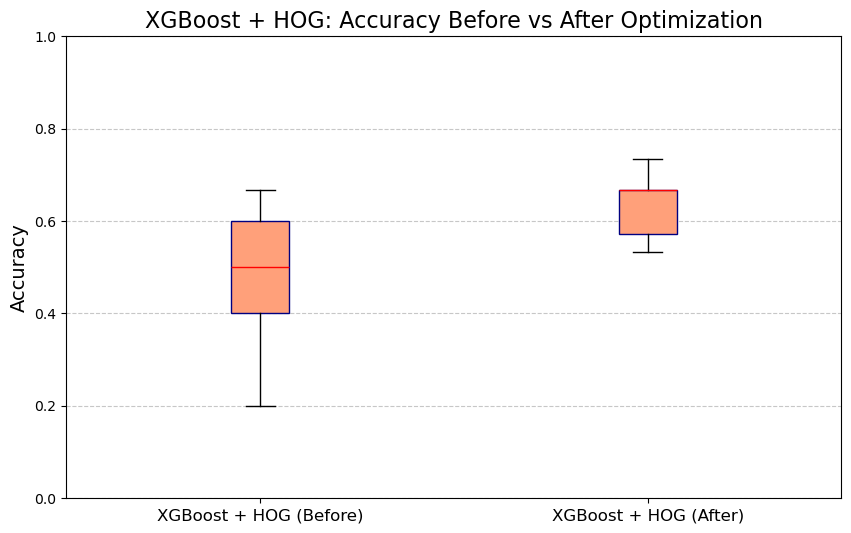

In [37]:
import matplotlib.pyplot as plt

accuracy_data = {
    "XGBoost + HOG (Before)": [0.6, 0.4, 0.2, 0.5, 0.6666666666666666],
    "XGBoost + HOG (After)": [0.7333333333333333, 0.5333333333333333, 0.6666666666666666, 0.6666666666666666, 0.5714285714285714],
}

plt.figure(figsize=(10, 6))

plt.boxplot(
    accuracy_data.values(),
    patch_artist=True,
    boxprops=dict(facecolor='lightsalmon', color='navy'),
    medianprops=dict(color='red', linewidth=1),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)

plt.xticks(range(1, len(accuracy_data) + 1), accuracy_data.keys(), fontsize=12)
plt.ylabel("Accuracy", fontsize=14)
plt.title("XGBoost + HOG: Accuracy Before vs After Optimization", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1)

plt.show()

## CatBoost

In [ ]:
import optuna
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from skimage.color import rgb2gray
from catboost import CatBoostClassifier

def extract_hog_features(image):
    if len(image.shape) == 3:
        gray = rgb2gray(image)
    else:
        gray = image
    return hog(gray, pixels_per_cell=(10,10), cells_per_block=(4,4))

X, y = [], []
for img in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(img))
    y.append(0)
for img in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(img))
    y.append(1)

X, y = np.array(X), np.array(y)

def objective(trial):

    params = {
        "iterations": trial.suggest_int("iterations", 100, 400),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "depth": trial.suggest_int("depth", 3, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-2, 10.0),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "random_strength": trial.suggest_float("random_strength", 0.1, 3.0),
        "border_count": trial.suggest_int("border_count", 32, 255)
    }

    clf = CatBoostClassifier(
        **params,
        verbose=False,
        loss_function='Logloss',
        random_seed=42
    )

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    acc_scores = []

    for train_idx, test_idx in skf.split(X, y):
        clf.fit(X[train_idx], y[train_idx])
        preds = clf.predict(X[test_idx])
        acc_scores.append(accuracy_score(y[test_idx], preds))

    return np.mean(acc_scores)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20, show_progress_bar=True)

print("\nBest CatBoost Hyperparameters:")
print(study.best_trial.params)
print(f"Best Accuracy: {study.best_value * 100:.2f}%")

# Optimization Results

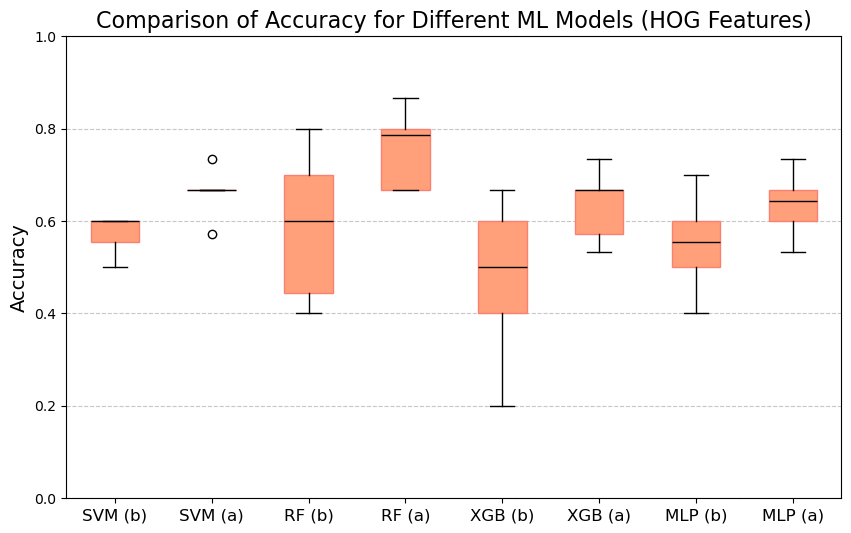

In [40]:
import matplotlib.pyplot as plt

accuracy_data = {
    "SVM (b)": [0.5, 0.6, 0.6, 0.6, 0.5555555555555556],
    "SVM (a)": [0.6666666666666666, 0.6666666666666666, 0.7333333333333333, 0.6666666666666666, 0.5714285714285714],
    "RF (b)": [0.7, 0.4, 0.8, 0.6, 0.4444444444444444],
    "RF (a)": [0.6666666666666666, 0.8, 0.8666666666666667, 0.6666666666666666, 0.7857142857142857],
    "XGB (b)": [0.6, 0.4, 0.2, 0.5, 0.6666666666666666],
    "XGB (a)": [0.7333333333333333, 0.5333333333333333, 0.6666666666666666, 0.6666666666666666, 0.5714285714285714],
    "MLP (b)": [0.5, 0.4, 0.7, 0.6, 0.5555555555555556],
    "MLP (a)": [0.6, 0.7333333333333333, 0.6666666666666666, 0.5333333333333333, 0.6428571428571429]
}

plt.figure(figsize=(10, 6))
plt.boxplot(accuracy_data.values(), patch_artist=True, 
            boxprops=dict(facecolor='lightsalmon', color='salmon'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'))

plt.xticks(range(1, len(accuracy_data) + 1), accuracy_data.keys(), fontsize=12)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Comparison of Accuracy for Different ML Models (HOG Features)", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1)

plt.show()

# Ensemble

In [ ]:
# for Ensemble

import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from skimage.color import rgb2gray

# Define a function to extract HOG features from images
def extract_hog_features(image):
    # Convert image to grayscale if it's not already
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    # Extract HOG features
    hog_features = hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))
    return hog_features

# Initialize empty lists for descriptors and labels
X = []
y = []

# Process images for NSEP
for cropped_image in cropped_images_AR_NSEP.values():
    # Extract HOG features from each image
    hog_features = extract_hog_features(cropped_image)
    X.append(hog_features)
    y.append(0)  # NSEP label

# Process images for SEP
for cropped_image in cropped_images_AR_SEP.values():
    # Extract HOG features from each image
    hog_features = extract_hog_features(cropped_image)
    X.append(hog_features)
    y.append(1)  # SEP label

# Convert lists to numpy arrays
X_AR_HOG = np.array(X)
y_AR_HOG = np.array(y)


In [ ]:
# corrected_fetch_cdas_example.py
import numpy as np
import pandas as pd
from cdasws import CdasWs
from datetime import datetime, timedelta

# create and reuse client
cdas = CdasWs()

def extract_event_timeseries(dataset, variable, start_time, end_time, steps=72, resample_minutes=5):
    """
    Fetches a variable from CDAWeb (cdas.get_data), builds a pandas Series (time-indexed),
    resamples to `resample_minutes`, interpolates missing values, then returns a fixed-length
    numpy vector of length `steps` using linear interpolation across the resampled series.
    """
    try:
        # cdas.get_data returns something like [times_list, {variable_name: values_list}]
        result = cdas.get_data(dataset, [variable], start_time, end_time)
    except Exception as e:
        raise RuntimeError(f"cdas.get_data failed for dataset={dataset}, var={variable}: {e}")

    # result is typically a list-like: result[0] -> times, result[1] -> dict of arrays
    times = result[0]
    data_dict = result[1]
    if variable not in data_dict:
        raise RuntimeError(f"Variable {variable} not found in cdas response keys: {list(data_dict.keys())}")

    flux = np.array(data_dict[variable], dtype=float)

    # make dataframe
    df = pd.DataFrame({"time": pd.to_datetime(times), "flux": flux})
    df = df.set_index("time").sort_index()

    # Resample to regular grid (e.g. 5 minute cadence). Change resample_minutes as needed.
    df_resampled = df.resample(f"{resample_minutes}T").mean()

    # Interpolate missing values (linear), then fill any remaining NaNs with small value
    df_resampled['flux'] = df_resampled['flux'].interpolate(method='time').fillna(method='bfill').fillna(method='ffill').fillna(0.0)

    # defensive: if still empty raise
    if df_resampled['flux'].isna().all() or len(df_resampled) == 0:
        raise RuntimeError("Resampled series is empty or all-NaN.")

    # map the resampled series into a fixed-length vector (linear interpolation across indices)
    vals = df_resampled['flux'].values
    orig_idx = np.arange(len(vals))
    target_idx = np.linspace(0, len(vals) - 1, steps)
    fixed_vector = np.interp(target_idx, orig_idx, vals)

    return fixed_vector

# Example usage:
if __name__ == "__main__":
    # set your SEP windows (start_time, end_time) in ISO format (Z at end)
    sep_windows = [
        ("2012-03-07T00:00:00Z", "2012-03-07T06:00:00Z"),  # example big SEP
        # add more (start, end) tuples here...
    ]

    dataset = "GOES13_EPAM_LEHT_5MIN"   # <- might need to adjust to the correct dataset name for your GOES data
    variable = "P8_PTC"                 # <- the name of the >100 MeV channel in that dataset; may differ

    sep_rows = []
    for start, end in sep_windows:
        try:
            vec = extract_event_timeseries(dataset, variable, start, end, steps=72, resample_minutes=5)
            sep_rows.append(vec)
            print(f"Fetched and processed: {start} -> {end}")
        except Exception as e:
            print(f"Skipped {start} -> {end}: {e}")

    SEP_df = pd.DataFrame(sep_rows)
    SEP_df.to_csv("SEP_data_100MeV_Uni.csv", index=False)
    print("Saved SEP_data_100MeV_Uni.csv shape=", SEP_df.shape)


Skipped 2012-03-07T00:00:00Z -> 2012-03-07T06:00:00Z: argument of type 'NoneType' is not iterable
Saved SEP_data_100MeV_Uni.csv shape= (0, 0)
